# DOMAIN: Semiconductor manufacturing process

#### CONTEXT:
    A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.
    
#### DATA DESCRIPTION: sensor-data.csv : (1567, 592)
    The data consists of 1567 examples each with 591 features. The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.
    
#### PROJECT OBJECTIVE: 
    We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.
    

In [2]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
# To split the dataset into train and test dataset
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt      
%matplotlib inline 
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import imblearn as imb

#### Import and explore the data.

In [3]:
#Importing dataset
SMPDfRaw = pd.read_csv("./signal-data.csv")
SMPDfRaw

Time        0        1          2          3       4  \
0     2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5         6       7       8  ...       581     582     583     584  \
0     100.0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   
1     100.0  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   
2     100.0   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   
3     100.0  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   
4     100.0  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045   
...     ...       ...     ...     ...  ...       ...     ...     ...     ...   
1562  100.0   82.2467  0.1248  1.3424  ...  203.1720  0.4988  0.0143  0.0039   
1563  100.0   98.4689  0.1205  1.4333  ...       NaN  0.4975  0.0131  0.0036   
1564  100.0   99.4122  0.1208     NaN  ...   43.5231  0.4987  0.0153  0.0041   
1565  100.0   98.7978  0.1213  1.4622  ...   93.4941  0.5004  0.0178  0.0038   
1566  100.0   85.1011  0.1235     NaN  ...  137.7844  0.4987  0.0181  0.0040   

          585     586     587     588       589  Pass/Fail  
0      2.3630     NaN     NaN     NaN       NaN         -1  
1      4.4447  0.0096  0.0201  0.0060  208.2045         -1  
2      3.1745  0.0584  0.0484  0.0148   82.8602          1  
3      2.0544  0.0202  0.0149  0.0044   73.8432         -1  
4     99.3032  0.0202  0.0149  0.0044   73.8432         -1  
...       ...     ...     ...     ...       ...        ...  
1562   2.8669  0.0068  0.0138  0.0047  203.1720         -1  
1563   2.6238  0.0068  0.0138  0.0047  203.1720         -1  
1564   3.0590  0.0197  0.0086  0.0025   43.5231         -1  
1565   3.5662  0.0262  0.0245  0.0075   93.4941         -1  
1566   3.6275  0.0117  0.0162  0.0045  137.7844         -1  

[1567 rows x 592 columns]

In [4]:
list(SMPDfRaw.dtypes)

[dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),

    First column is  (Python) objects data type.
    Last column is Integer data type.
    Rest of columns are of float data type.

In [5]:
SMPDfRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


    Checking null value in the available dataset

#### Data cleansing
- Missing value treatment.
- Drop attribute/s if required using relevant functional knowledge.
- Make all relevant modifications on the data using both functional/logical reasoning/assumptions

###### Missing value treatment.

In [6]:
nullValueCount = list(SMPDfRaw.isnull().sum())
nullValueCount.sort(reverse=True)

In [7]:
#checking only null values who's count is more than 100. This can be changed according to the need.
nullValueCountDf = pd.Series(SMPDfRaw.isnull().sum(),name="CountValues").to_frame()
nullValueCountDf[nullValueCountDf['CountValues'] > 100].sort_values(by=['CountValues'],ascending=False)

CountValues
292         1429
157         1429
158         1429
293         1429
85          1341
358         1341
220         1341
492         1341
518         1018
384         1018
383         1018
382         1018
517         1018
245         1018
246         1018
244         1018
111         1018
110         1018
109         1018
516         1018
579          949
578          949
580          949
581          949
72           794
346          794
73           794
345          794
112          715
247          715
385          715
519          715
563          273
564          273
569          273
568          273
567          273
566          273
562          273
565          273
546          260
547          260
549          260
550          260
557          260
548          260
555          260
554          260
553          260
552          260
551          260
556          260

In [8]:
nullValueCountOnTargetColumn = pd.Series(SMPDfRaw['Pass/Fail'].isnull().sum(),name="CountValues").to_frame('Pass/Fail')
nullValueCountOnTargetColumn

Pass/Fail
0          0

    There are no null available in the 'Pass/Fail' column (target).
    
    Checking percent of missing values in below cell. This is to understand data better.

In [9]:
for i in (list(SMPDfRaw.iloc[:,:-1])):
    print(str(i))
    n_miss = SMPDfRaw[[str(i)]].isnull().sum()
    perc = n_miss / SMPDfRaw.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

Time
> Time, Missing: 0 (0.0%)
0
> 0, Missing: 6 (0.4%)
1
> 1, Missing: 7 (0.4%)
2
> 2, Missing: 14 (0.9%)
3
> 3, Missing: 14 (0.9%)
4
> 4, Missing: 14 (0.9%)
5
> 5, Missing: 14 (0.9%)
6
> 6, Missing: 14 (0.9%)
7
> 7, Missing: 9 (0.6%)
8
> 8, Missing: 2 (0.1%)
9
> 9, Missing: 2 (0.1%)
10
> 10, Missing: 2 (0.1%)
11
> 11, Missing: 2 (0.1%)
12
> 12, Missing: 2 (0.1%)
13
> 13, Missing: 3 (0.2%)
14
> 14, Missing: 3 (0.2%)
15
> 15, Missing: 3 (0.2%)
16
> 16, Missing: 3 (0.2%)
17
> 17, Missing: 3 (0.2%)
18
> 18, Missing: 3 (0.2%)
19
> 19, Missing: 10 (0.6%)
20
> 20, Missing: 0 (0.0%)
21
> 21, Missing: 2 (0.1%)
22
> 22, Missing: 2 (0.1%)
23
> 23, Missing: 2 (0.1%)
24
> 24, Missing: 2 (0.1%)
25
> 25, Missing: 2 (0.1%)
26
> 26, Missing: 2 (0.1%)
27
> 27, Missing: 2 (0.1%)
28
> 28, Missing: 2 (0.1%)
29
> 29, Missing: 2 (0.1%)
30
> 30, Missing: 2 (0.1%)
31
> 31, Missing: 2 (0.1%)
32
> 32, Missing: 1 (0.1%)
33
> 33, Missing: 1 (0.1%)
34
> 34, Missing: 1 (0.1%)
35
> 35, Missing: 1 (0.1%)
36
> 36, Mi

> 314, Missing: 24 (1.5%)
315
> 315, Missing: 1 (0.1%)
316
> 316, Missing: 1 (0.1%)
317
> 317, Missing: 1 (0.1%)
318
> 318, Missing: 1 (0.1%)
319
> 319, Missing: 1 (0.1%)
320
> 320, Missing: 1 (0.1%)
321
> 321, Missing: 1 (0.1%)
322
> 322, Missing: 1 (0.1%)
323
> 323, Missing: 1 (0.1%)
324
> 324, Missing: 1 (0.1%)
325
> 325, Missing: 1 (0.1%)
326
> 326, Missing: 4 (0.3%)
327
> 327, Missing: 4 (0.3%)
328
> 328, Missing: 4 (0.3%)
329
> 329, Missing: 4 (0.3%)
330
> 330, Missing: 4 (0.3%)
331
> 331, Missing: 4 (0.3%)
332
> 332, Missing: 7 (0.4%)
333
> 333, Missing: 6 (0.4%)
334
> 334, Missing: 6 (0.4%)
335
> 335, Missing: 6 (0.4%)
336
> 336, Missing: 7 (0.4%)
337
> 337, Missing: 7 (0.4%)
338
> 338, Missing: 7 (0.4%)
339
> 339, Missing: 6 (0.4%)
340
> 340, Missing: 6 (0.4%)
341
> 341, Missing: 6 (0.4%)
342
> 342, Missing: 6 (0.4%)
343
> 343, Missing: 6 (0.4%)
344
> 344, Missing: 6 (0.4%)
345
> 345, Missing: 794 (50.7%)
346
> 346, Missing: 794 (50.7%)
347
> 347, Missing: 6 (0.4%)
348
> 348, 

    Imputing the dataset with 0 as fill value.

In [10]:
#imputing the dataset - it is better to impute the data to 0 ins
from sklearn.impute import SimpleImputer
missingvalues = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0) #'median')
missingvalues = missingvalues.fit(SMPDfRaw.iloc[:,1:])
SMPDfRaw.iloc[:,1:] = missingvalues.transform(SMPDfRaw.iloc[:,1:])

In [11]:
for i in (list(SMPDfRaw.iloc[:,:-1])):
    print(str(i))
    n_miss = SMPDfRaw[[str(i)]].isnull().sum()
    perc = n_miss / SMPDfRaw.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

Time
> Time, Missing: 0 (0.0%)
0
> 0, Missing: 0 (0.0%)
1
> 1, Missing: 0 (0.0%)
2
> 2, Missing: 0 (0.0%)
3
> 3, Missing: 0 (0.0%)
4
> 4, Missing: 0 (0.0%)
5
> 5, Missing: 0 (0.0%)
6
> 6, Missing: 0 (0.0%)
7
> 7, Missing: 0 (0.0%)
8
> 8, Missing: 0 (0.0%)
9
> 9, Missing: 0 (0.0%)
10
> 10, Missing: 0 (0.0%)
11
> 11, Missing: 0 (0.0%)
12
> 12, Missing: 0 (0.0%)
13
> 13, Missing: 0 (0.0%)
14
> 14, Missing: 0 (0.0%)
15
> 15, Missing: 0 (0.0%)
16
> 16, Missing: 0 (0.0%)
17
> 17, Missing: 0 (0.0%)
18
> 18, Missing: 0 (0.0%)
19
> 19, Missing: 0 (0.0%)
20
> 20, Missing: 0 (0.0%)
21
> 21, Missing: 0 (0.0%)
22
> 22, Missing: 0 (0.0%)
23
> 23, Missing: 0 (0.0%)
24
> 24, Missing: 0 (0.0%)
25
> 25, Missing: 0 (0.0%)
26
> 26, Missing: 0 (0.0%)
27
> 27, Missing: 0 (0.0%)
28
> 28, Missing: 0 (0.0%)
29
> 29, Missing: 0 (0.0%)
30
> 30, Missing: 0 (0.0%)
31
> 31, Missing: 0 (0.0%)
32
> 32, Missing: 0 (0.0%)
33
> 33, Missing: 0 (0.0%)
34
> 34, Missing: 0 (0.0%)
35
> 35, Missing: 0 (0.0%)
36
> 36, Missing:

> 370, Missing: 0 (0.0%)
371
> 371, Missing: 0 (0.0%)
372
> 372, Missing: 0 (0.0%)
373
> 373, Missing: 0 (0.0%)
374
> 374, Missing: 0 (0.0%)
375
> 375, Missing: 0 (0.0%)
376
> 376, Missing: 0 (0.0%)
377
> 377, Missing: 0 (0.0%)
378
> 378, Missing: 0 (0.0%)
379
> 379, Missing: 0 (0.0%)
380
> 380, Missing: 0 (0.0%)
381
> 381, Missing: 0 (0.0%)
382
> 382, Missing: 0 (0.0%)
383
> 383, Missing: 0 (0.0%)
384
> 384, Missing: 0 (0.0%)
385
> 385, Missing: 0 (0.0%)
386
> 386, Missing: 0 (0.0%)
387
> 387, Missing: 0 (0.0%)
388
> 388, Missing: 0 (0.0%)
389
> 389, Missing: 0 (0.0%)
390
> 390, Missing: 0 (0.0%)
391
> 391, Missing: 0 (0.0%)
392
> 392, Missing: 0 (0.0%)
393
> 393, Missing: 0 (0.0%)
394
> 394, Missing: 0 (0.0%)
395
> 395, Missing: 0 (0.0%)
396
> 396, Missing: 0 (0.0%)
397
> 397, Missing: 0 (0.0%)
398
> 398, Missing: 0 (0.0%)
399
> 399, Missing: 0 (0.0%)
400
> 400, Missing: 0 (0.0%)
401
> 401, Missing: 0 (0.0%)
402
> 402, Missing: 0 (0.0%)
403
> 403, Missing: 0 (0.0%)
404
> 404, Missing

In [12]:
for i in (list(SMPDfRaw.iloc[:,:-1])):
    n_unique_elem = SMPDfRaw[[str(i)]].nunique()
    if(int(n_unique_elem) == 1):
        print('> %s, Unique: %d' % (i, n_unique_elem))

> 13, Unique: 1
> 52, Unique: 1
> 97, Unique: 1
> 141, Unique: 1
> 149, Unique: 1
> 178, Unique: 1
> 179, Unique: 1
> 186, Unique: 1
> 189, Unique: 1
> 190, Unique: 1
> 191, Unique: 1
> 192, Unique: 1
> 193, Unique: 1
> 194, Unique: 1
> 226, Unique: 1
> 229, Unique: 1
> 230, Unique: 1
> 231, Unique: 1
> 232, Unique: 1
> 233, Unique: 1
> 234, Unique: 1
> 235, Unique: 1
> 236, Unique: 1
> 237, Unique: 1
> 240, Unique: 1
> 241, Unique: 1
> 242, Unique: 1
> 243, Unique: 1
> 256, Unique: 1
> 257, Unique: 1
> 258, Unique: 1
> 259, Unique: 1
> 260, Unique: 1
> 261, Unique: 1
> 262, Unique: 1
> 263, Unique: 1
> 264, Unique: 1
> 265, Unique: 1
> 266, Unique: 1
> 276, Unique: 1
> 284, Unique: 1
> 313, Unique: 1
> 314, Unique: 1
> 315, Unique: 1
> 322, Unique: 1
> 325, Unique: 1
> 326, Unique: 1
> 327, Unique: 1
> 328, Unique: 1
> 329, Unique: 1
> 330, Unique: 1
> 364, Unique: 1
> 369, Unique: 1
> 370, Unique: 1
> 371, Unique: 1
> 372, Unique: 1
> 373, Unique: 1
> 374, Unique: 1
> 375, Unique: 1


    Lets check the correlation and if 2 variables are highly correlated then we can plan to drop those variables.

In [13]:
SMPDfRaw.corr()

0         1         2         3         4         5  \
0          1.000000 -0.047782  0.007590  0.009448 -0.000915  0.008706   
1         -0.047782  1.000000 -0.030448  0.006021  0.002192 -0.030127   
2          0.007590 -0.030448  1.000000  0.323782  0.020438  0.990089   
3          0.009448  0.006021  0.323782  1.000000 -0.054015  0.286397   
4         -0.000915  0.002192  0.020438 -0.054015  1.000000  0.007041   
...             ...       ...       ...       ...       ...       ...   
586        0.044745 -0.009219  0.015733  0.038755 -0.043693  0.019435   
587        0.005233  0.039479 -0.007090 -0.038371 -0.030930 -0.003077   
588        0.003918  0.040500 -0.009122 -0.033648 -0.026046 -0.004919   
589        0.021489  0.044464 -0.030434 -0.084449  0.050741 -0.026117   
Pass/Fail  0.006149 -0.019672  0.024929 -0.016341 -0.013577  0.025315   

                  6         7         8         9  ...       581       582  \
0          0.006129  0.010738 -0.050979  0.009959  ... -0.033622  0.010503   
1         -0.031616 -0.025086  0.027609  0.003704  ...  0.043107 -0.017392   
2          0.818770  0.747230  0.002600 -0.045731  ...  0.038416 -0.010627   
3         -0.119180  0.279646 -0.108217  0.051567  ...  0.000922  0.009788   
4         -0.034736 -0.475861 -0.020082  0.053859  ...  0.107783  0.012778   
...             ...       ...       ...       ...  ...       ...       ...   
586       -0.005877  0.051943  0.017642  0.032423  ... -0.206109 -0.008240   
587        0.016362 -0.006335  0.027655  0.057856  ...  0.227096  0.018981   
588        0.013832 -0.014288  0.033729  0.059321  ...  0.216292  0.019083   
589        0.002246 -0.067263 -0.016895  0.004106  ...  0.431632  0.028502   
Pass/Fail  0.030075  0.023590  0.028376 -0.031209  ...  0.003478  0.018736   

                583       584       585       586       587       588  \
0          0.019840  0.017889  0.019522  0.044745  0.005233  0.003918   
1          0.003809  0.004409  0.003821 -0.009219  0.039479  0.040500   
2         -0.004771 -0.003030 -0.004263  0.015733 -0.007090 -0.009122   
3          0.022593  0.022361  0.023288  0.038755 -0.038371 -0.033648   
4         -0.001323 -0.001605 -0.001636 -0.043693 -0.030930 -0.026046   
...             ...       ...       ...       ...       ...       ...   
586        0.002391  0.001602  0.002872  1.000000  0.169634  0.165942   
587       -0.001809 -0.001696 -0.002122  0.169634  1.000000  0.974332   
588       -0.001445 -0.001182 -0.001746  0.165942  0.974332  1.000000   
589       -0.002453 -0.002750 -0.003266 -0.484741  0.391503  0.389898   
Pass/Fail  0.006131  0.005593  0.005179  0.004448  0.035670  0.031447   

                589  Pass/Fail  
0          0.021489   0.006149  
1          0.044464  -0.019672  
2         -0.030434   0.024929  
3         -0.084449  -0.016341  
4          0.050741  -0.013577  
...             ...        ...  
586       -0.484741   0.004448  
587        0.391503   0.035670  
588        0.389898   0.031447  
589        1.000000  -0.002472  
Pass/Fail -0.002472   1.000000  

[591 rows x 591 columns]

    The correlation matrix can be used to drop unwanted columns

In [14]:
cor = SMPDfRaw.corr()
numOfRows,numOfCol = cor.shape

In [15]:
print(numOfCol,numOfRows)

591 591


In [16]:
#to cross check the column which are planning to be dropped, it is better to eye ball dataset and see if we have carried out the task properly
import os
if(os.path.isfile("corrDF.csv")):
    os.remove("corrDF.csv") 
    cor.to_csv("corrDF.csv")

In [17]:
SMPDfRawCorr_99 = SMPDfRaw.copy()
SMPDfRawCorr_97 = SMPDfRaw.copy()
SMPDfRawCorr_95 = SMPDfRaw.copy()
SMPDfRawCorr_90 = SMPDfRaw.copy()
SMPDfRawCorr_85 = SMPDfRaw.copy()

In [18]:
def findcorr(inputDf, threshold):
    identifiedCorrCol = set() # to avoid removal of required column
    corMatrix = inputDf.corr()
    for i in range(len(corMatrix.columns)):
        for j in range(i):
            if (corMatrix.iloc[i, j] >= threshold) and (corMatrix.columns[j] not in identifiedCorrCol):
                colname = corMatrix.columns[i] # getting the name of column
                identifiedCorrCol.add(colname)
                if colname in inputDf.columns:
                    del inputDf[colname] # deleting the column from the dataset

    return inputDf

In [19]:
droppedColumnDF_99 =  findcorr(SMPDfRawCorr_99,0.99)
droppedColumnDF_97 =  findcorr(SMPDfRawCorr_97,0.97)
droppedColumnDF_95 =  findcorr(SMPDfRawCorr_95,0.95)
droppedColumnDF_90 =  findcorr(SMPDfRawCorr_90,0.90)
droppedColumnDF_85 =  findcorr(SMPDfRawCorr_85,0.85)

In [20]:
print(droppedColumnDF_99.shape)
print(droppedColumnDF_97.shape)
print(droppedColumnDF_95.shape)
print(droppedColumnDF_90.shape)
print(droppedColumnDF_85.shape)

(1567, 474)
(1567, 418)
(1567, 388)
(1567, 369)
(1567, 351)


    The above dataframe will be used to determine right number of column to be dropped in further steps.

In [21]:
SMPDfRaw.shape

(1567, 592)

In [22]:
droppedColumnDF_99.corr()

0         1         2         3         4         6  \
0          1.000000 -0.047782  0.007590  0.009448 -0.000915  0.006129   
1         -0.047782  1.000000 -0.030448  0.006021  0.002192 -0.031616   
2          0.007590 -0.030448  1.000000  0.323782  0.020438  0.818770   
3          0.009448  0.006021  0.323782  1.000000 -0.054015 -0.119180   
4         -0.000915  0.002192  0.020438 -0.054015  1.000000 -0.034736   
...             ...       ...       ...       ...       ...       ...   
586        0.044745 -0.009219  0.015733  0.038755 -0.043693 -0.005877   
587        0.005233  0.039479 -0.007090 -0.038371 -0.030930  0.016362   
588        0.003918  0.040500 -0.009122 -0.033648 -0.026046  0.013832   
589        0.021489  0.044464 -0.030434 -0.084449  0.050741  0.002246   
Pass/Fail  0.006149 -0.019672  0.024929 -0.016341 -0.013577  0.030075   

                  7         8         9        10  ...       578       579  \
0          0.010738 -0.050979  0.009959 -0.010253  ... -0.041694 -0.039881   
1         -0.025086  0.027609  0.003704  0.028889  ...  0.013738  0.039350   
2          0.747230  0.002600 -0.045731  0.004713  ...  0.043303  0.040090   
3          0.279646 -0.108217  0.051567  0.046281  ...  0.072474  0.033122   
4         -0.475861 -0.020082  0.053859 -0.006505  ...  0.008852  0.022099   
...             ...       ...       ...       ...  ...       ...       ...   
586        0.051943  0.017642  0.032423  0.000758  ...  0.349499  0.095755   
587       -0.006335  0.027655  0.057856  0.047377  ...  0.124023  0.433660   
588       -0.014288  0.033729  0.059321  0.046459  ...  0.124173  0.420256   
589       -0.067263 -0.016895  0.004106  0.008651  ... -0.170810  0.125819   
Pass/Fail  0.023590  0.028376 -0.031209  0.033645  ...  0.022373  0.032448   

                581       582       583       586       587       588  \
0         -0.033622  0.010503  0.019840  0.044745  0.005233  0.003918   
1          0.043107 -0.017392  0.003809 -0.009219  0.039479  0.040500   
2          0.038416 -0.010627 -0.004771  0.015733 -0.007090 -0.009122   
3          0.000922  0.009788  0.022593  0.038755 -0.038371 -0.033648   
4          0.107783  0.012778 -0.001323 -0.043693 -0.030930 -0.026046   
...             ...       ...       ...       ...       ...       ...   
586       -0.206109 -0.008240  0.002391  1.000000  0.169634  0.165942   
587        0.227096  0.018981 -0.001809  0.169634  1.000000  0.974332   
588        0.216292  0.019083 -0.001445  0.165942  0.974332  1.000000   
589        0.431632  0.028502 -0.002453 -0.484741  0.391503  0.389898   
Pass/Fail  0.003478  0.018736  0.006131  0.004448  0.035670  0.031447   

                589  Pass/Fail  
0          0.021489   0.006149  
1          0.044464  -0.019672  
2         -0.030434   0.024929  
3         -0.084449  -0.016341  
4          0.050741  -0.013577  
...             ...        ...  
586       -0.484741   0.004448  
587        0.391503   0.035670  
588        0.389898   0.031447  
589        1.000000  -0.002472  
Pass/Fail -0.002472   1.000000  

[473 rows x 473 columns]

In [23]:
SMPDfRaw.corr()

0         1         2         3         4         5  \
0          1.000000 -0.047782  0.007590  0.009448 -0.000915  0.008706   
1         -0.047782  1.000000 -0.030448  0.006021  0.002192 -0.030127   
2          0.007590 -0.030448  1.000000  0.323782  0.020438  0.990089   
3          0.009448  0.006021  0.323782  1.000000 -0.054015  0.286397   
4         -0.000915  0.002192  0.020438 -0.054015  1.000000  0.007041   
...             ...       ...       ...       ...       ...       ...   
586        0.044745 -0.009219  0.015733  0.038755 -0.043693  0.019435   
587        0.005233  0.039479 -0.007090 -0.038371 -0.030930 -0.003077   
588        0.003918  0.040500 -0.009122 -0.033648 -0.026046 -0.004919   
589        0.021489  0.044464 -0.030434 -0.084449  0.050741 -0.026117   
Pass/Fail  0.006149 -0.019672  0.024929 -0.016341 -0.013577  0.025315   

                  6         7         8         9  ...       581       582  \
0          0.006129  0.010738 -0.050979  0.009959  ... -0.033622  0.010503   
1         -0.031616 -0.025086  0.027609  0.003704  ...  0.043107 -0.017392   
2          0.818770  0.747230  0.002600 -0.045731  ...  0.038416 -0.010627   
3         -0.119180  0.279646 -0.108217  0.051567  ...  0.000922  0.009788   
4         -0.034736 -0.475861 -0.020082  0.053859  ...  0.107783  0.012778   
...             ...       ...       ...       ...  ...       ...       ...   
586       -0.005877  0.051943  0.017642  0.032423  ... -0.206109 -0.008240   
587        0.016362 -0.006335  0.027655  0.057856  ...  0.227096  0.018981   
588        0.013832 -0.014288  0.033729  0.059321  ...  0.216292  0.019083   
589        0.002246 -0.067263 -0.016895  0.004106  ...  0.431632  0.028502   
Pass/Fail  0.030075  0.023590  0.028376 -0.031209  ...  0.003478  0.018736   

                583       584       585       586       587       588  \
0          0.019840  0.017889  0.019522  0.044745  0.005233  0.003918   
1          0.003809  0.004409  0.003821 -0.009219  0.039479  0.040500   
2         -0.004771 -0.003030 -0.004263  0.015733 -0.007090 -0.009122   
3          0.022593  0.022361  0.023288  0.038755 -0.038371 -0.033648   
4         -0.001323 -0.001605 -0.001636 -0.043693 -0.030930 -0.026046   
...             ...       ...       ...       ...       ...       ...   
586        0.002391  0.001602  0.002872  1.000000  0.169634  0.165942   
587       -0.001809 -0.001696 -0.002122  0.169634  1.000000  0.974332   
588       -0.001445 -0.001182 -0.001746  0.165942  0.974332  1.000000   
589       -0.002453 -0.002750 -0.003266 -0.484741  0.391503  0.389898   
Pass/Fail  0.006131  0.005593  0.005179  0.004448  0.035670  0.031447   

                589  Pass/Fail  
0          0.021489   0.006149  
1          0.044464  -0.019672  
2         -0.030434   0.024929  
3         -0.084449  -0.016341  
4          0.050741  -0.013577  
...             ...        ...  
586       -0.484741   0.004448  
587        0.391503   0.035670  
588        0.389898   0.031447  
589        1.000000  -0.002472  
Pass/Fail -0.002472   1.000000  

[591 rows x 591 columns]

    Lets check the correlation by plotting graphs

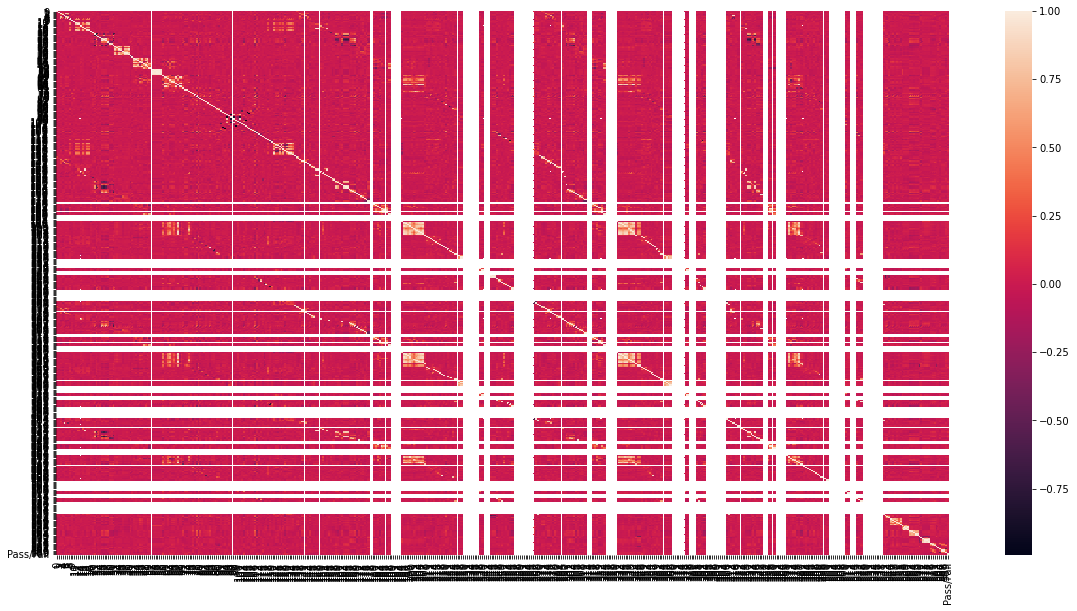

In [24]:
corr = droppedColumnDF_99.corr()

fig, ax = plt.subplots(figsize=(20,10))
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

In [25]:
SMPDfRaw.shape

(1567, 592)

### Data analysis & visualisation:
- Perform detailed relevant statistical analysis on the data.
- Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [26]:
#Checking Outliers in the columns provided in the dataset.
outlierData = SMPDfRaw
listofcolumns = list(outlierData)
for indexOfList in  listofcolumns[1:-1]:    
    quant25 = np.percentile(outlierData[str(indexOfList)],25)
    quant75 = np.percentile(outlierData[indexOfList],75)
    Threshold=(quant75-quant25)*1.5
    lower=quant25-Threshold
    upper=quant75+Threshold
    Outliers=[i for i in outlierData[indexOfList] if i < lower or i > upper]
    if(len(Outliers) > 0):
        print('{} Total Number of outliers in {} : {}'.format('\033[1m',indexOfList,len(Outliers)))

 Total Number of outliers in 0 : 55
 Total Number of outliers in 1 : 91
 Total Number of outliers in 2 : 39
 Total Number of outliers in 3 : 65
 Total Number of outliers in 4 : 62
 Total Number of outliers in 5 : 14
 Total Number of outliers in 6 : 108
 Total Number of outliers in 7 : 21
 Total Number of outliers in 8 : 8
 Total Number of outliers in 9 : 26
 Total Number of outliers in 10 : 30
 Total Number of outliers in 11 : 9
 Total Number of outliers in 12 : 14
 Total Number of outliers in 14 : 14
 Total Number of outliers in 15 : 10
 Total Number of outliers in 16 : 37
 Total Number of outliers in 17 : 18
 Total Number of outliers in 18 : 15
 Total Number of outliers in 19 : 56
 Total Number of outliers in 20 : 29
 Total Number of outliers in 21 : 37
 Total Number of outliers in 22 : 55
 Total Number of outliers in 23 : 195
 Total Number of outliers in 24 : 122
 Total Number of outliers in 25 : 41
 Total Number of outliers in 26 : 41
 Total Number of outliers in 27 : 26
 Total Num

 Total Number of outliers in 238 : 27
 Total Number of outliers in 239 : 30
 Total Number of outliers in 244 : 83
 Total Number of outliers in 245 : 87
 Total Number of outliers in 246 : 6
 Total Number of outliers in 247 : 141
 Total Number of outliers in 248 : 60
 Total Number of outliers in 249 : 22
 Total Number of outliers in 250 : 35
 Total Number of outliers in 251 : 201
 Total Number of outliers in 252 : 7
 Total Number of outliers in 253 : 67
 Total Number of outliers in 254 : 4
 Total Number of outliers in 255 : 5
 Total Number of outliers in 269 : 41
 Total Number of outliers in 270 : 48
 Total Number of outliers in 271 : 1
 Total Number of outliers in 272 : 2
 Total Number of outliers in 273 : 107
 Total Number of outliers in 274 : 90
 Total Number of outliers in 275 : 49
 Total Number of outliers in 277 : 64
 Total Number of outliers in 278 : 58
 Total Number of outliers in 279 : 114
 Total Number of outliers in 280 : 42
 Total Number of outliers in 281 : 91
 Total Number 

 Total Number of outliers in 541 : 41
 Total Number of outliers in 542 : 2
 Total Number of outliers in 543 : 149
 Total Number of outliers in 544 : 241
 Total Number of outliers in 545 : 206
 Total Number of outliers in 546 : 20
 Total Number of outliers in 547 : 267
 Total Number of outliers in 548 : 262
 Total Number of outliers in 549 : 66
 Total Number of outliers in 550 : 268
 Total Number of outliers in 551 : 18
 Total Number of outliers in 552 : 59
 Total Number of outliers in 553 : 269
 Total Number of outliers in 554 : 36
 Total Number of outliers in 555 : 36
 Total Number of outliers in 556 : 269
 Total Number of outliers in 557 : 11
 Total Number of outliers in 558 : 131
 Total Number of outliers in 559 : 12
 Total Number of outliers in 560 : 85
 Total Number of outliers in 561 : 9
 Total Number of outliers in 562 : 279
 Total Number of outliers in 563 : 286
 Total Number of outliers in 564 : 42
 Total Number of outliers in 565 : 74
 Total Number of outliers in 566 : 46
 To

    Using ChiSquare we determine importance of the variable - if the variable if not important

In [27]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

statsImpData = SMPDfRaw
alpha=0.05
dropColumnsList=[]
identifiedImprtCol = list() 

def ChiSquareTestIndependence(colX,colY):
    X = droppedColumnDF_99[colX].astype(str)
    Y = droppedColumnDF_99[colY].astype(str)
    
    crossT = pd.crosstab(Y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(crossT.values)
    
    if p<alpha:
            identifiedImprtCol.append(colX)
            
for var in list(droppedColumnDF_99.iloc[:, 1:-1]):
    ChiSquareTestIndependence(colX=var,colY="Pass/Fail")
    
print(identifiedImprtCol)

['2', '3', '4', '6', '7', '11', '17', '19', '25', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '55', '56', '72', '73', '78', '84', '87', '89', '100', '103', '112', '114', '119', '122', '125', '126', '127', '128', '130', '132', '133', '134', '138', '139', '142', '147', '153', '155', '163', '164', '166', '168', '170', '171', '172', '173', '175', '176', '177', '195', '205', '210', '212', '213', '222', '247', '249', '251', '267', '268', '269', '273', '274', '277', '290', '305', '306', '307', '308', '310', '311', '331', '345', '346', '348', '354', '366', '377', '385', '393', '406', '407', '412', '413', '419', '442', '468', '483', '486', '487', '489', '511', '519', '521', '541', '551', '558', '559', '560', '561', '570', '571', '572', '573', '575', '577', '582', '583', '587', '588', '589']


    The above columns are of statistical improtance in the dataset provided. Since there are many column , only these can be used for further data analysis.

In [28]:
#below code will be used for segregating the column into list which can be used for ploting graphs for better understanding of data.
def divide_chunks(l, n):
    for i in range(0, len(l), n): 
        yield l[i:i + n]

n = 10
  
x = list(divide_chunks(identifiedImprtCol, n))
print (x)

[['2', '3', '4', '6', '7', '11', '17', '19', '25', '32'], ['33', '34', '35', '36', '37', '38', '39', '40', '41', '55'], ['56', '72', '73', '78', '84', '87', '89', '100', '103', '112'], ['114', '119', '122', '125', '126', '127', '128', '130', '132', '133'], ['134', '138', '139', '142', '147', '153', '155', '163', '164', '166'], ['168', '170', '171', '172', '173', '175', '176', '177', '195', '205'], ['210', '212', '213', '222', '247', '249', '251', '267', '268', '269'], ['273', '274', '277', '290', '305', '306', '307', '308', '310', '311'], ['331', '345', '346', '348', '354', '366', '377', '385', '393', '406'], ['407', '412', '413', '419', '442', '468', '483', '486', '487', '489'], ['511', '519', '521', '541', '551', '558', '559', '560', '561', '570'], ['571', '572', '573', '575', '577', '582', '583', '587', '588', '589']]


In [29]:
SMPDfRaw.shape

(1567, 592)

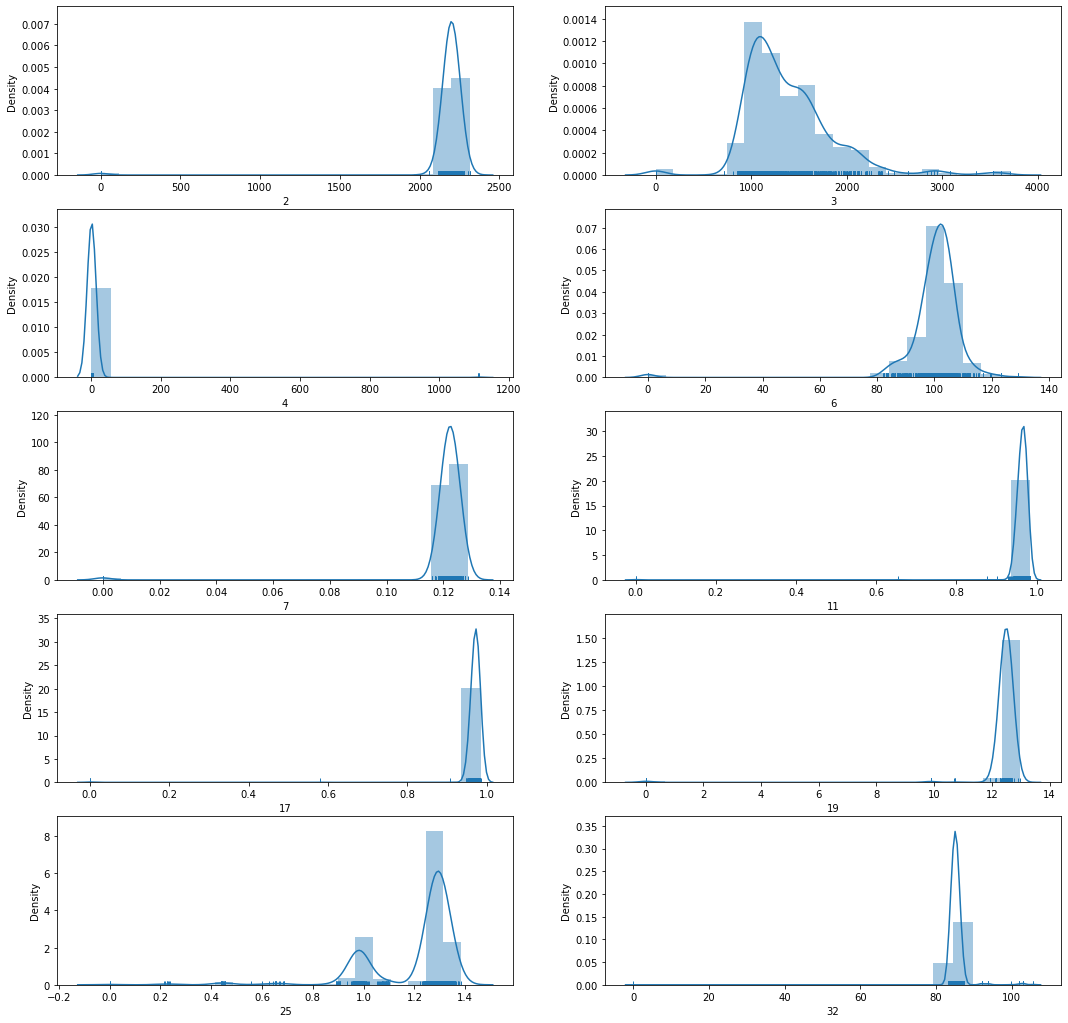

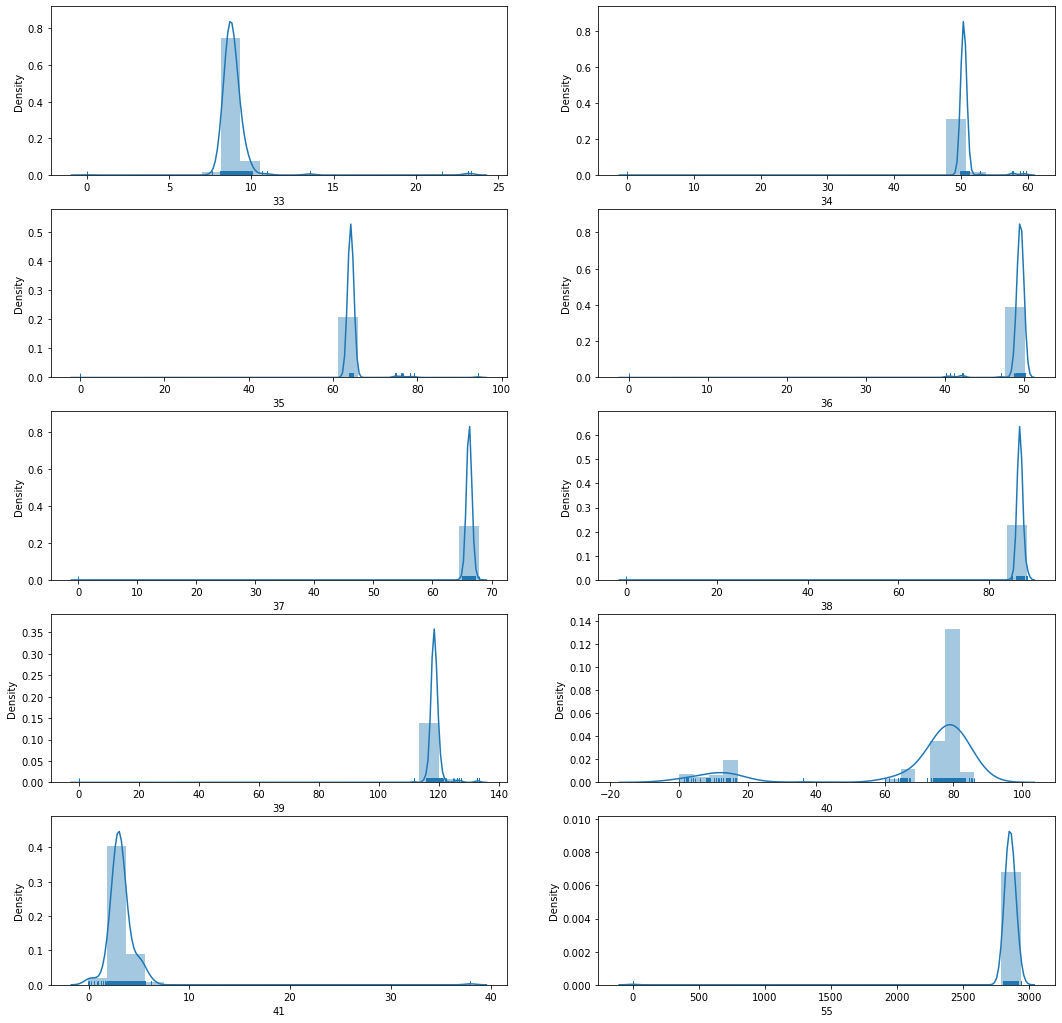

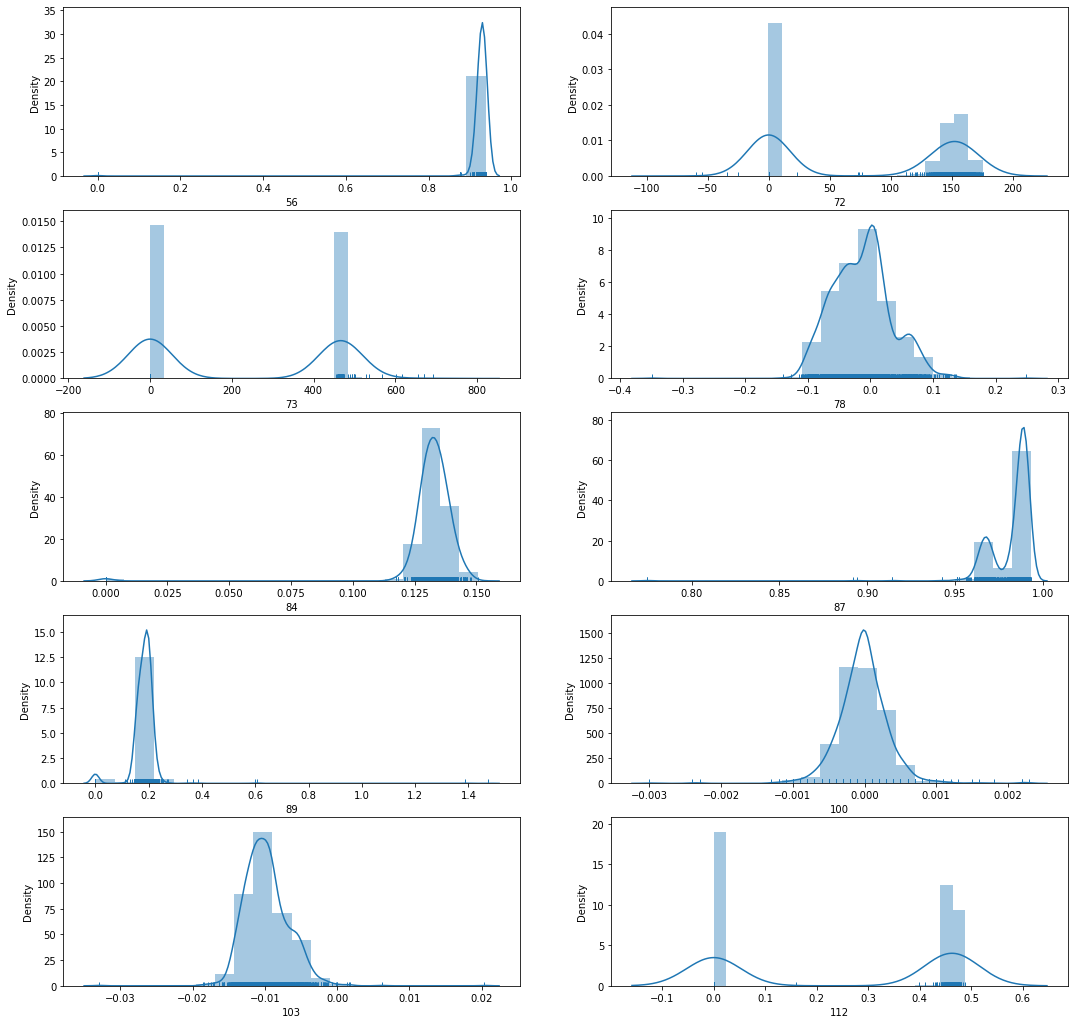

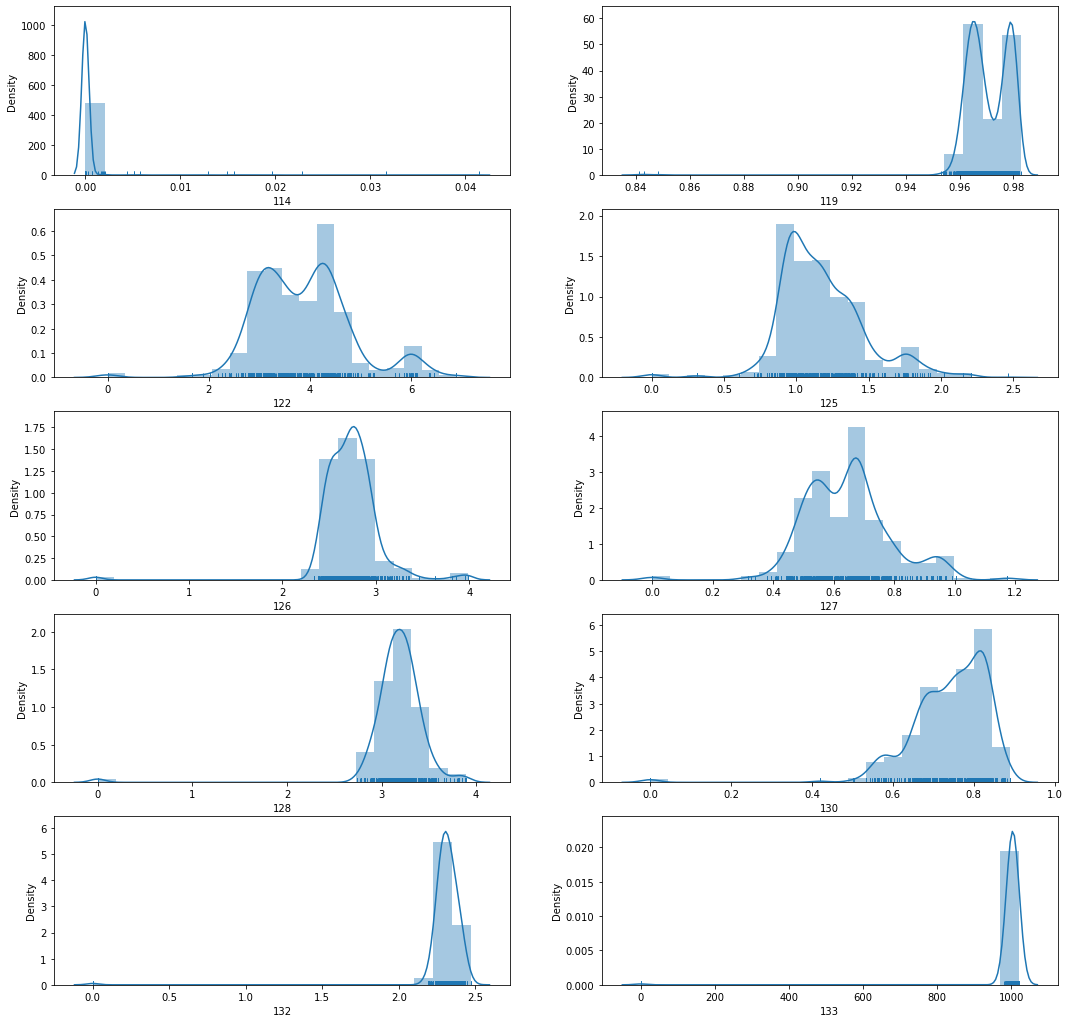

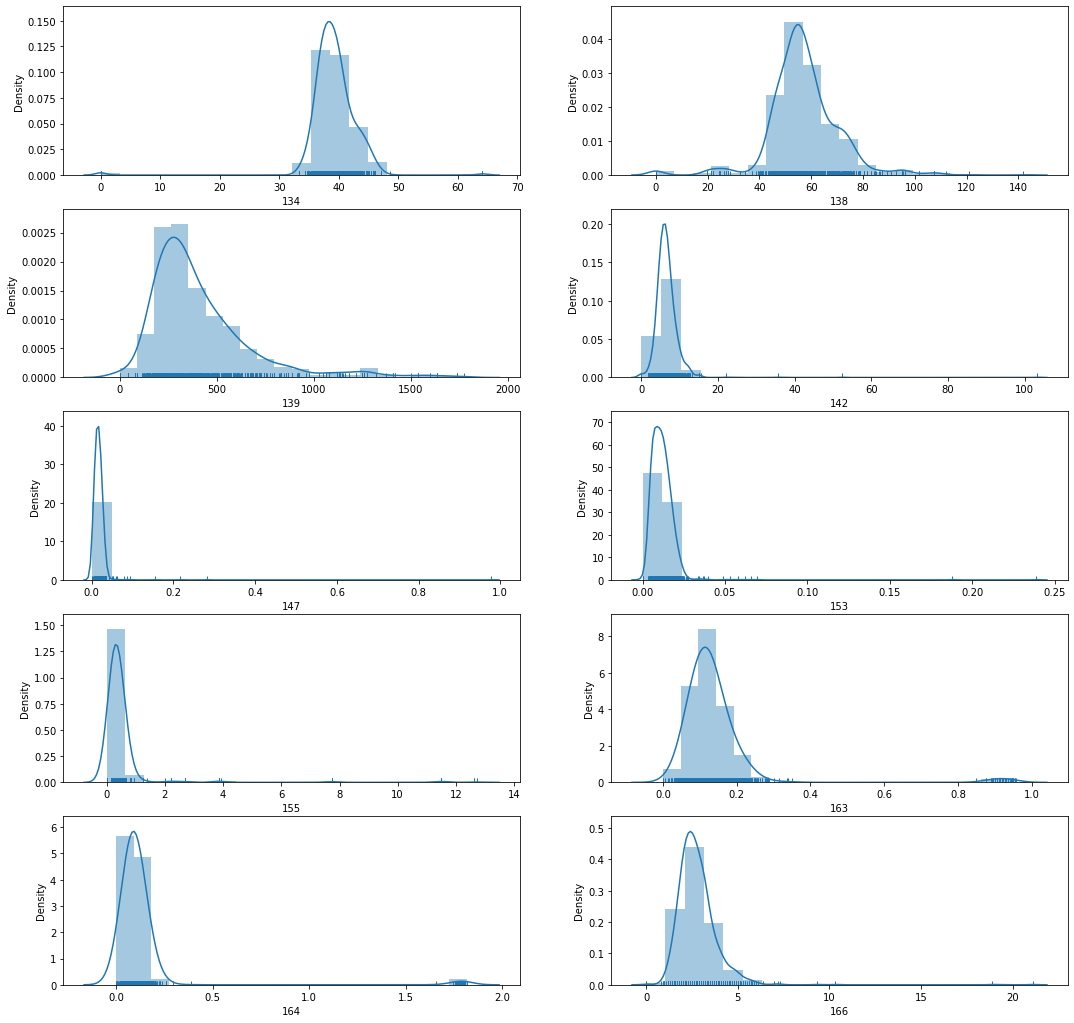

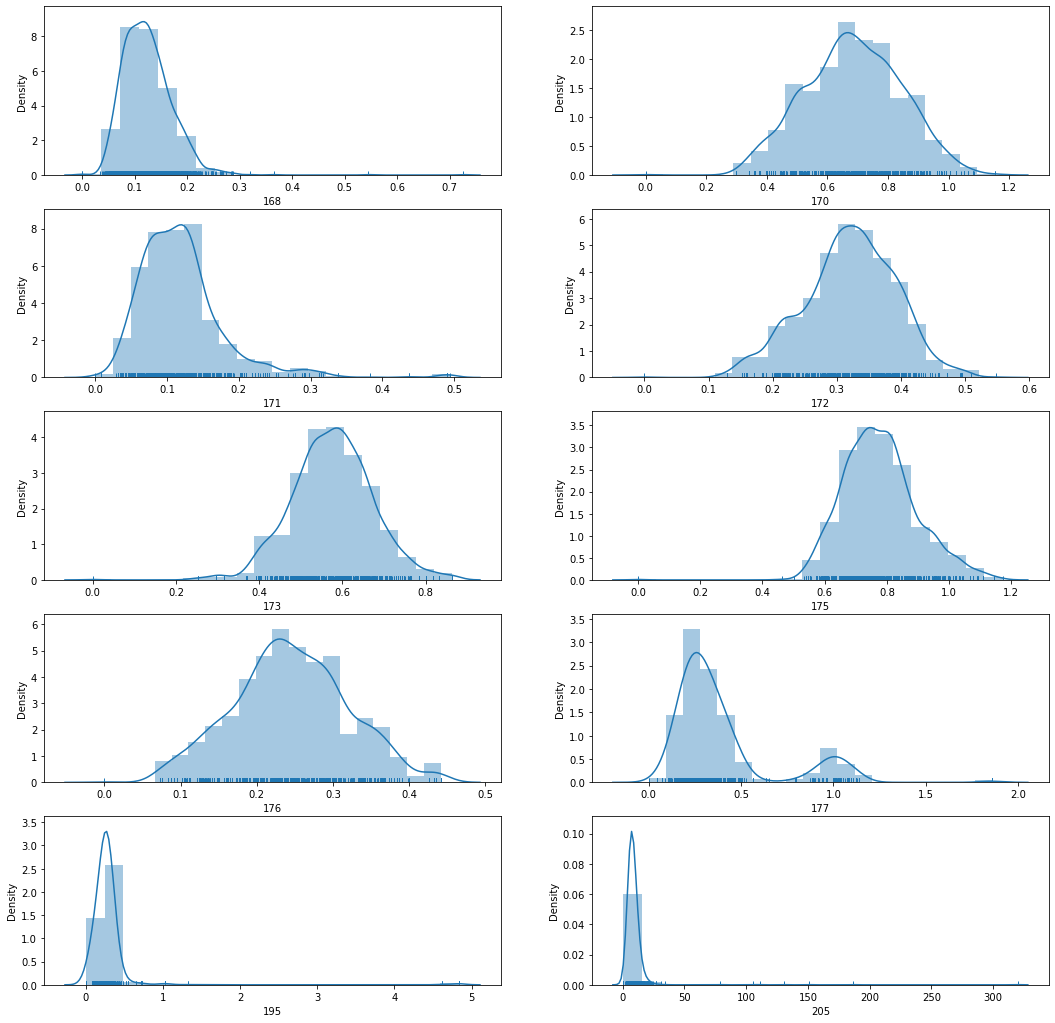

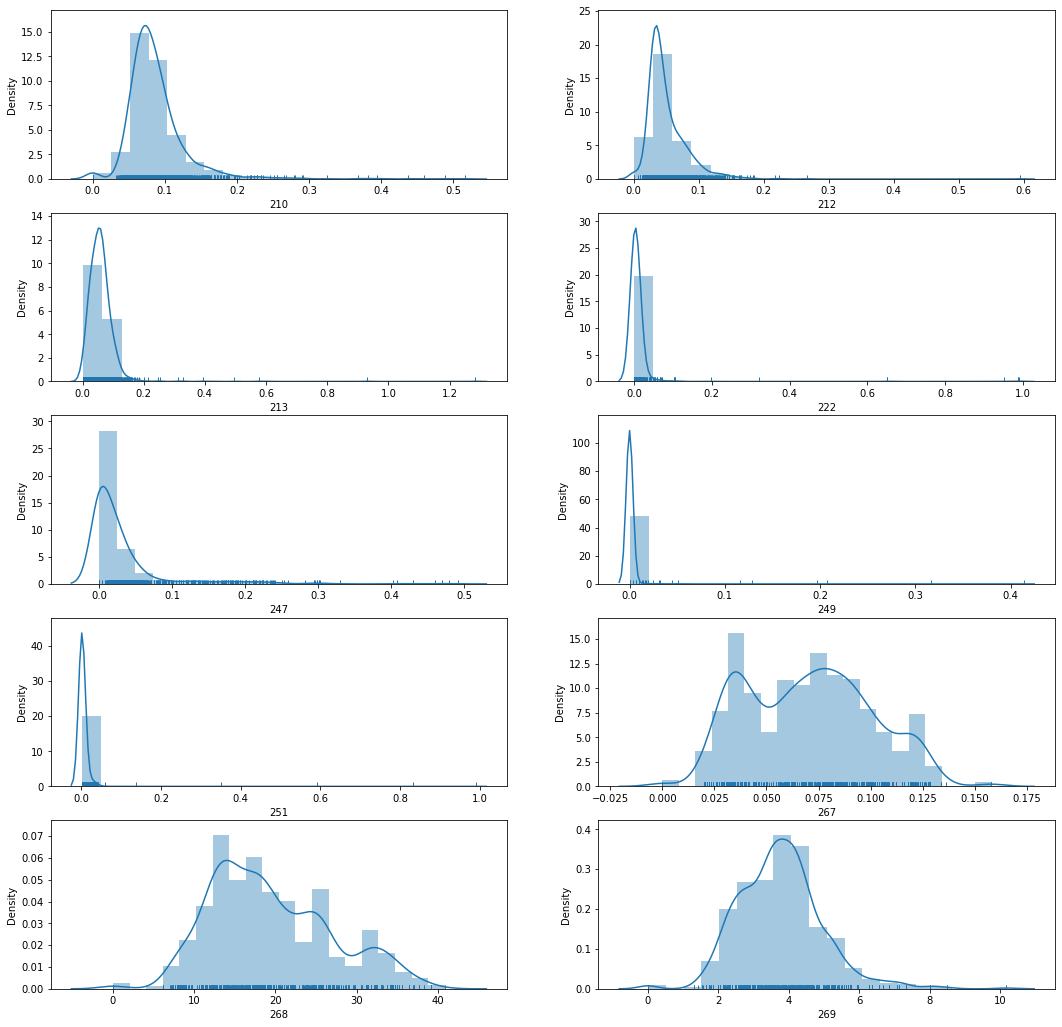

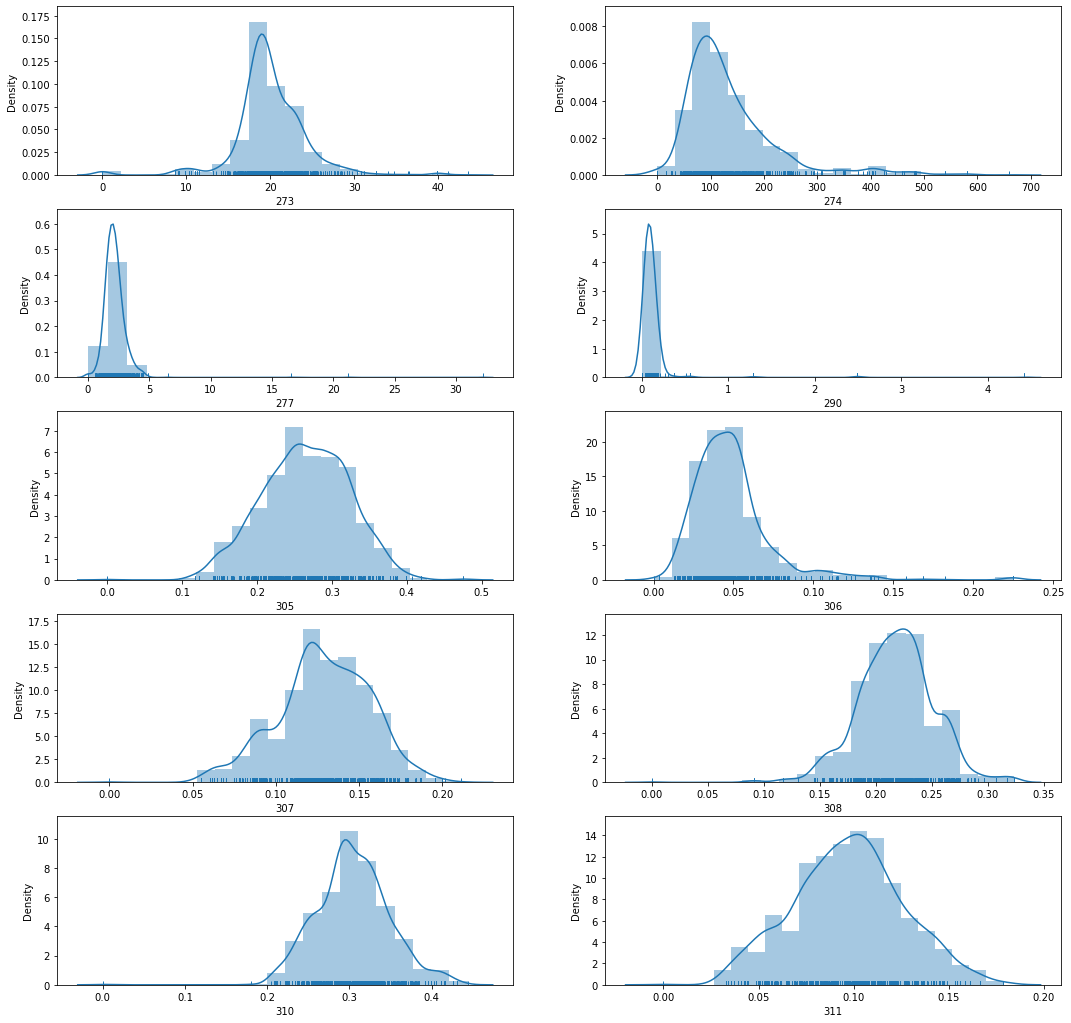

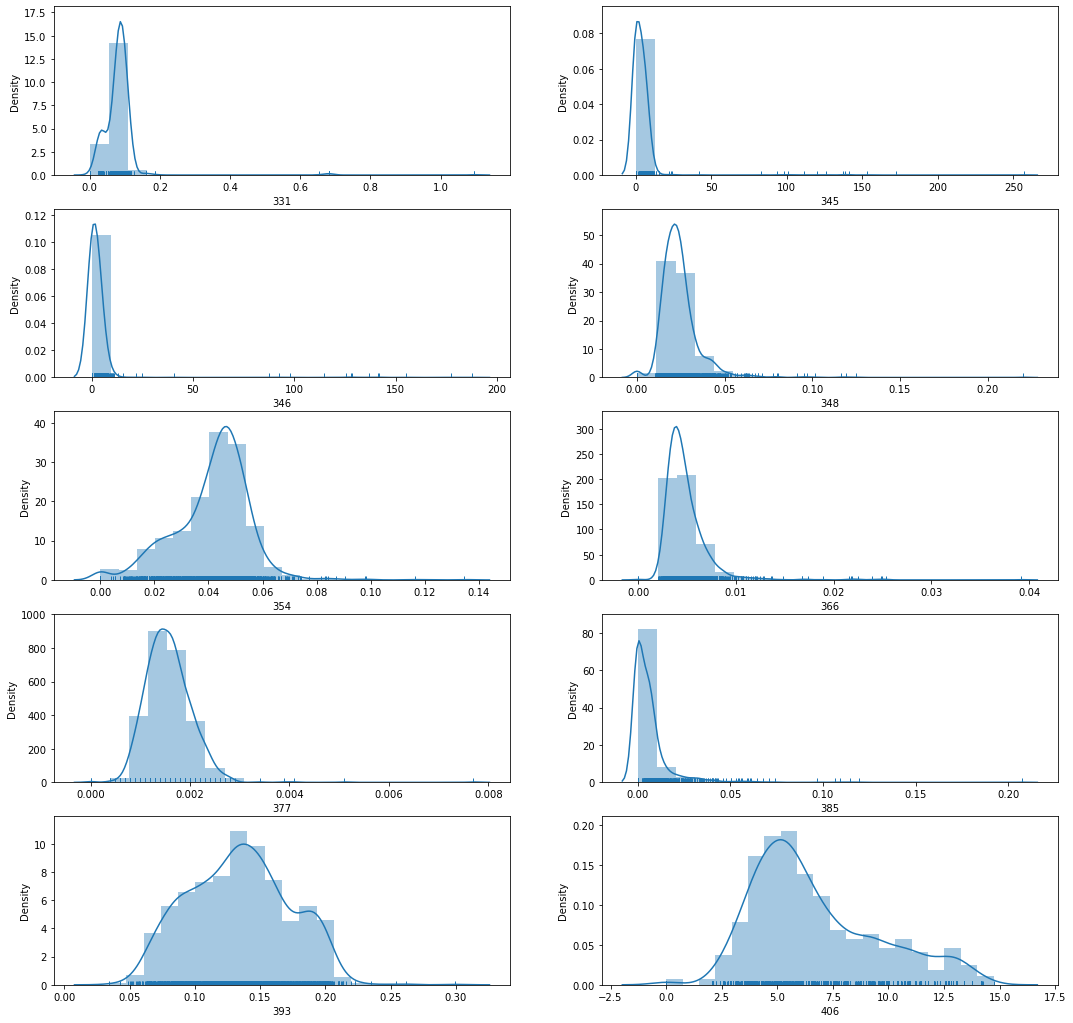

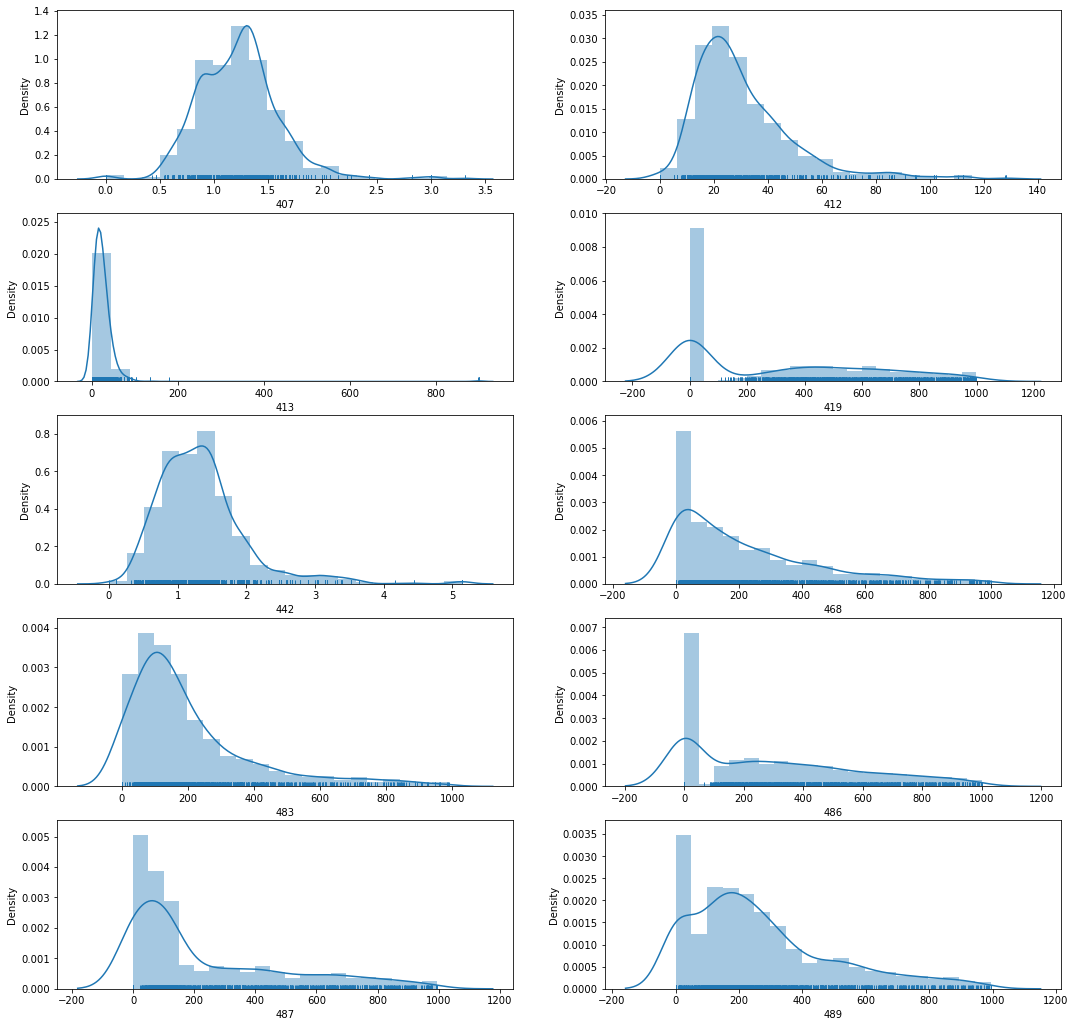

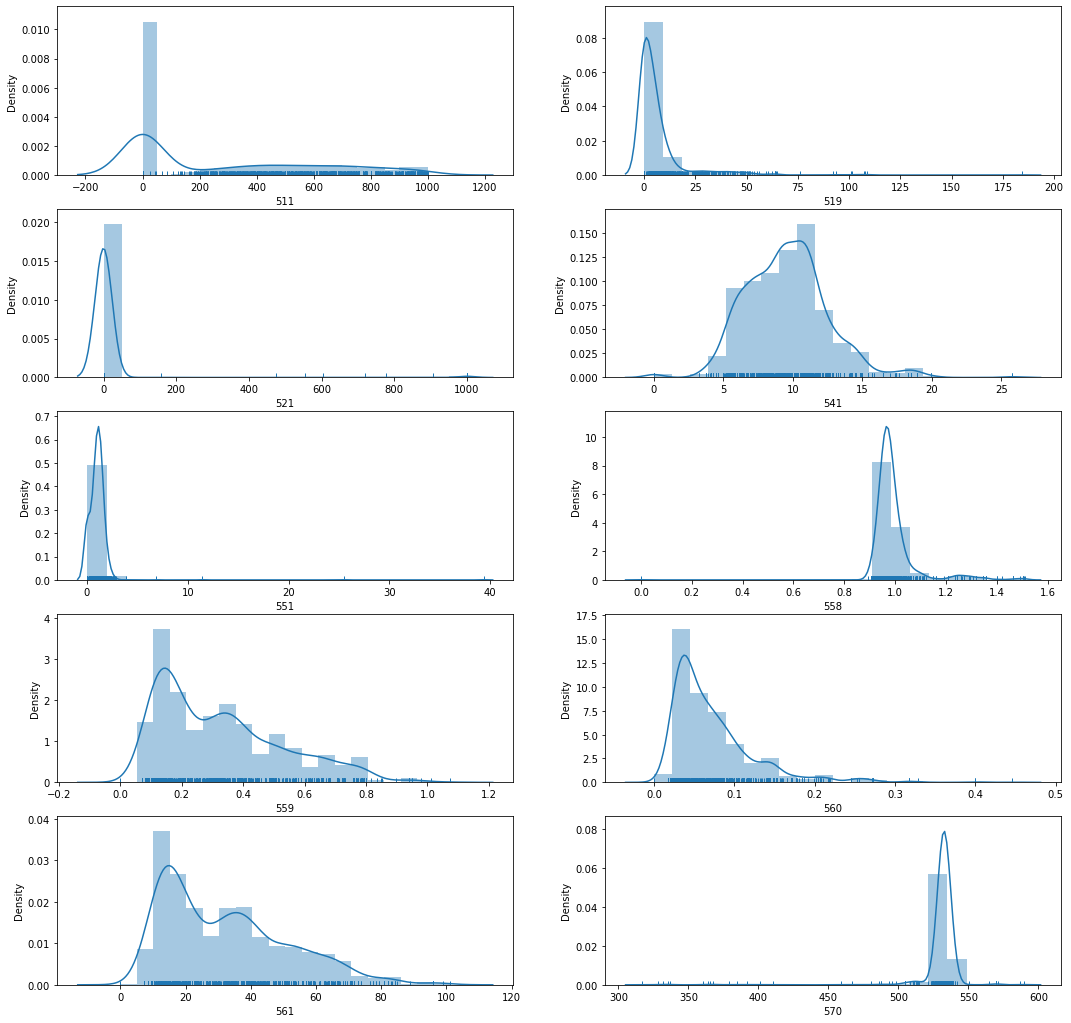

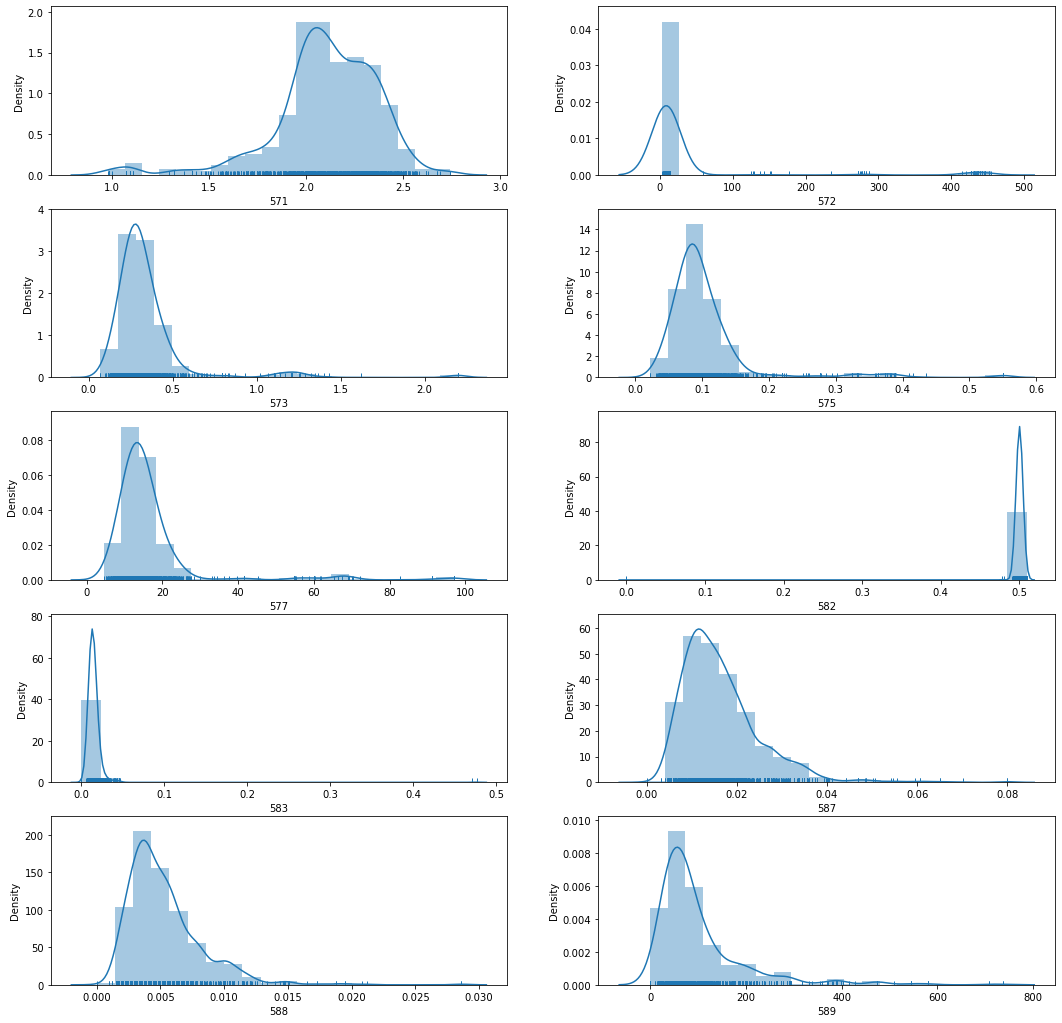

In [30]:
#ploting the graph for the columns which are statistically important.
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

distplotData = SMPDfRaw
for i in (x):
    lenImptrCol = len(i)/2
    fig, ax = plt.subplots(round(lenImptrCol) ,2, figsize=(18,18))
    listOfColumns = list(i)
    len_listOfColumns = len(i)
    index = 0
    
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            if(index < len_listOfColumns):
                ax[j][i] = sns.distplot(droppedColumnDF_99[listOfColumns[index]],bins=20,rug=True,ax = ax[j][i]);            
                index = index + 1 
    fig.show()

    After observing the distribution plot, most columns have normal distribution and few tail end column (like column 419 and later) have either right skewness or left skewness to the data. There are few column for which bimodality is observed. Since these data are machine generated, generally it is more reliable and can be directly used by the algorithm. There are very less chance that there will be flaw in the data collection.

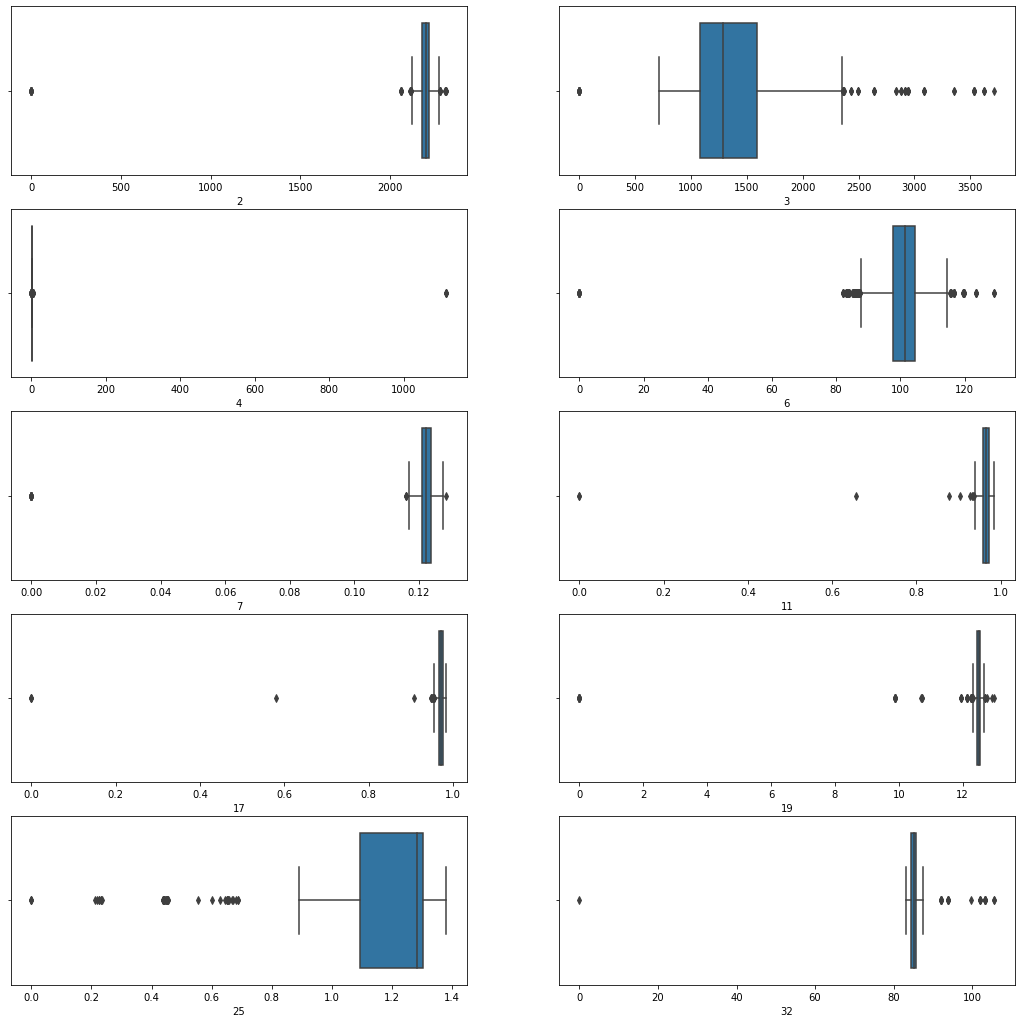

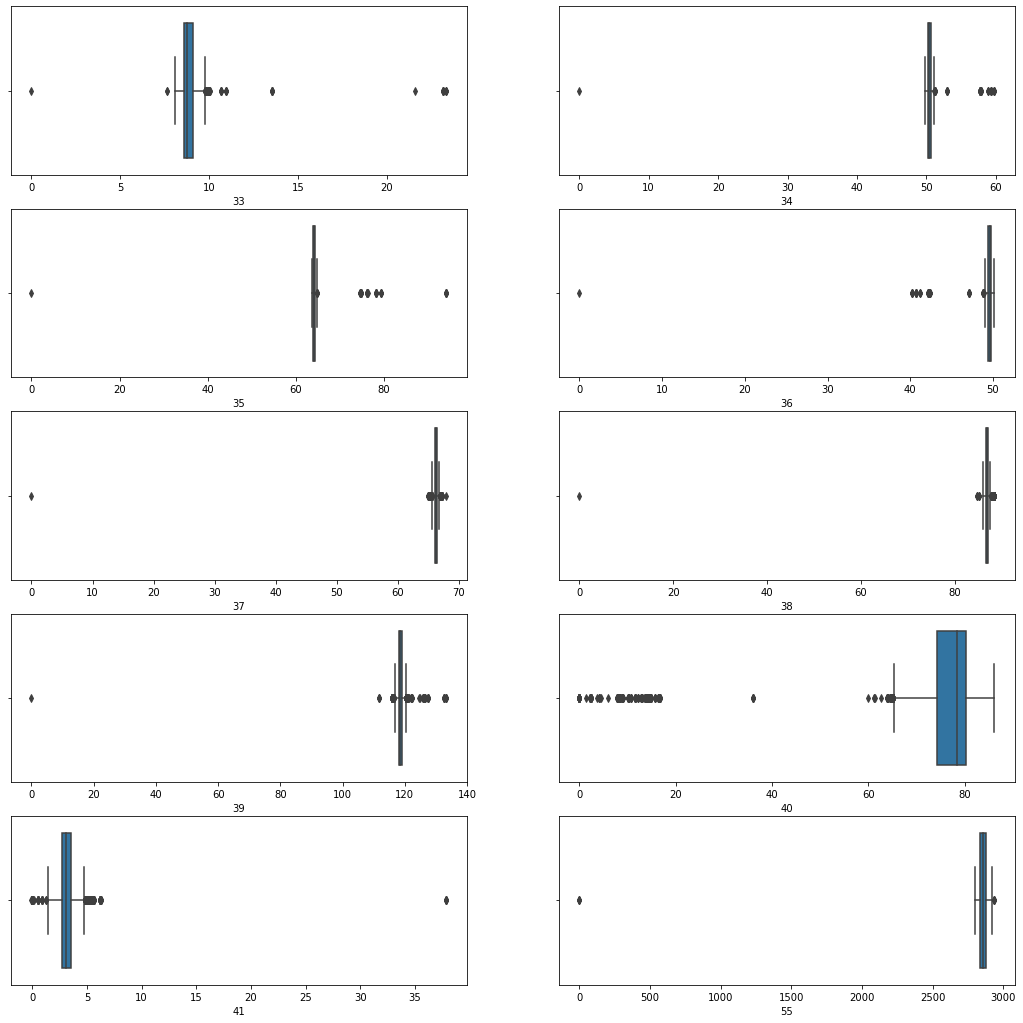

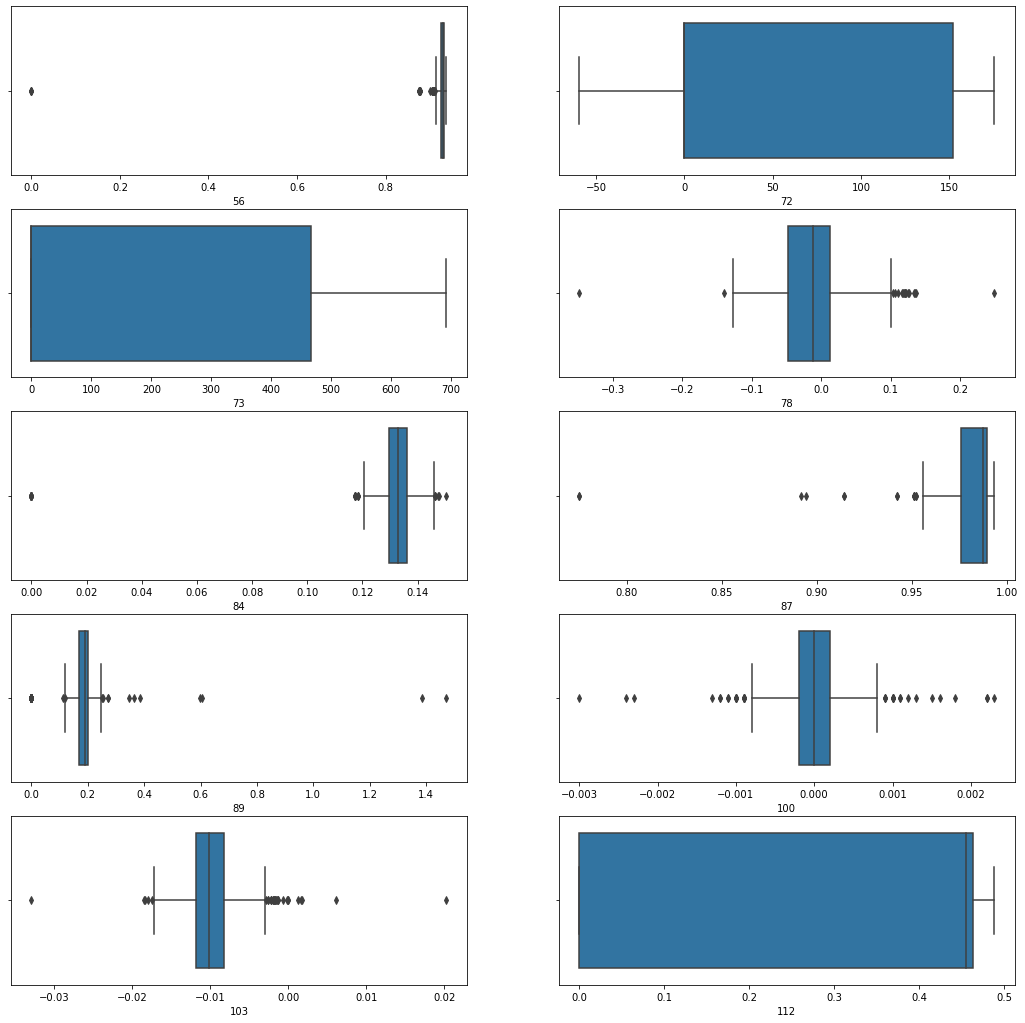

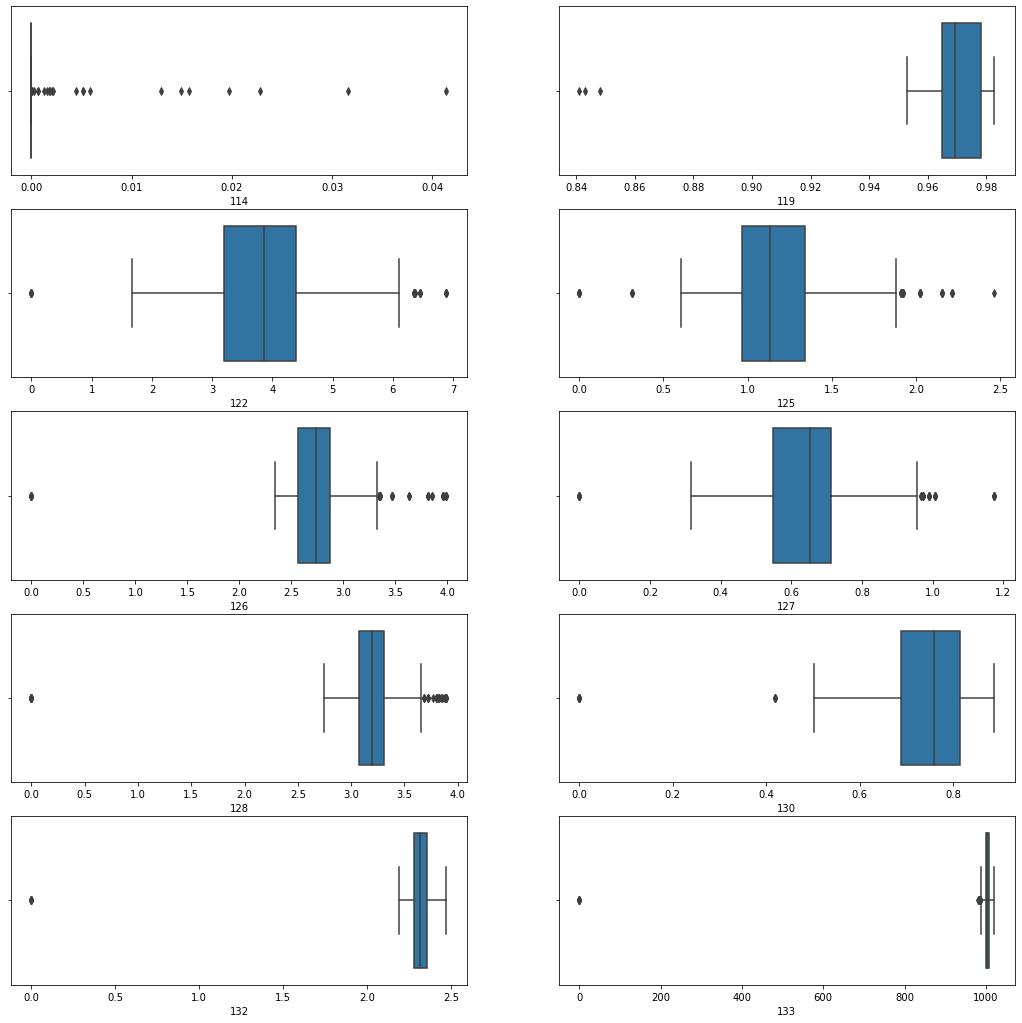

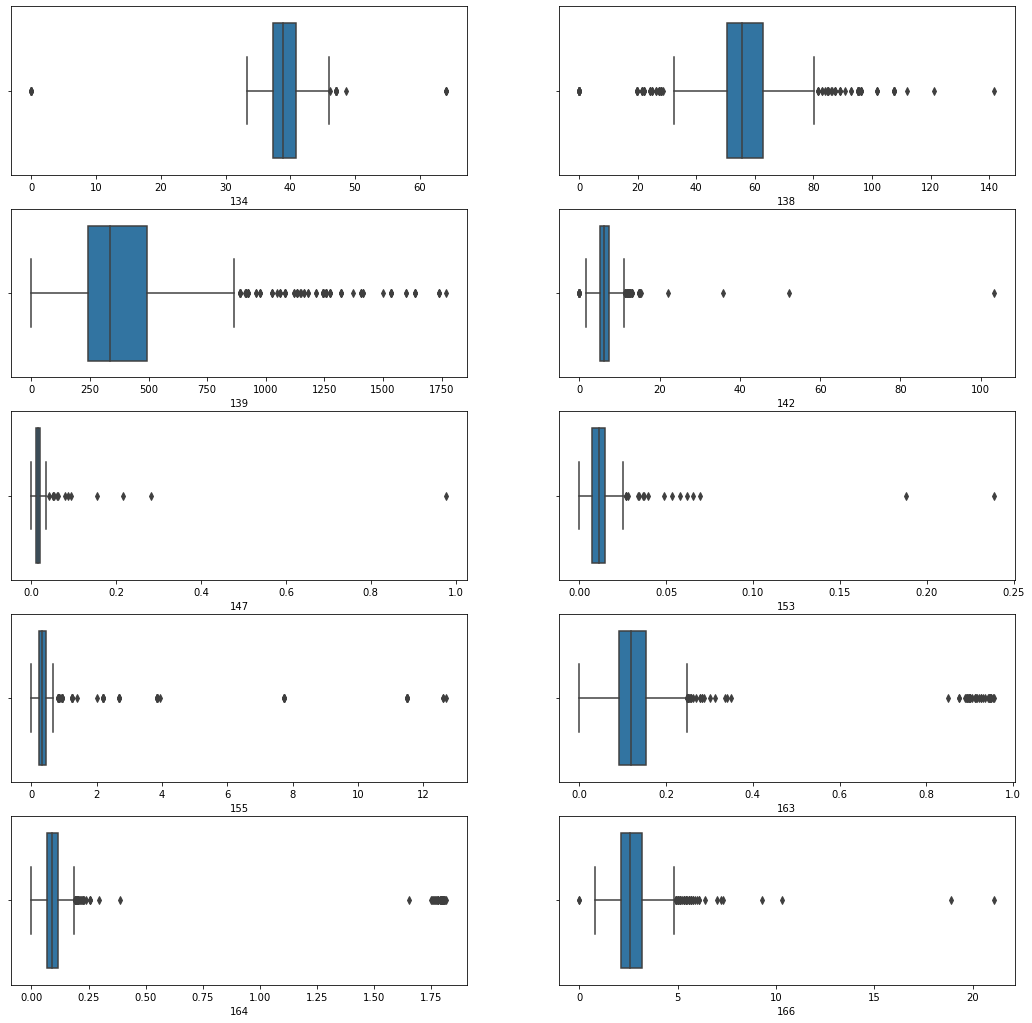

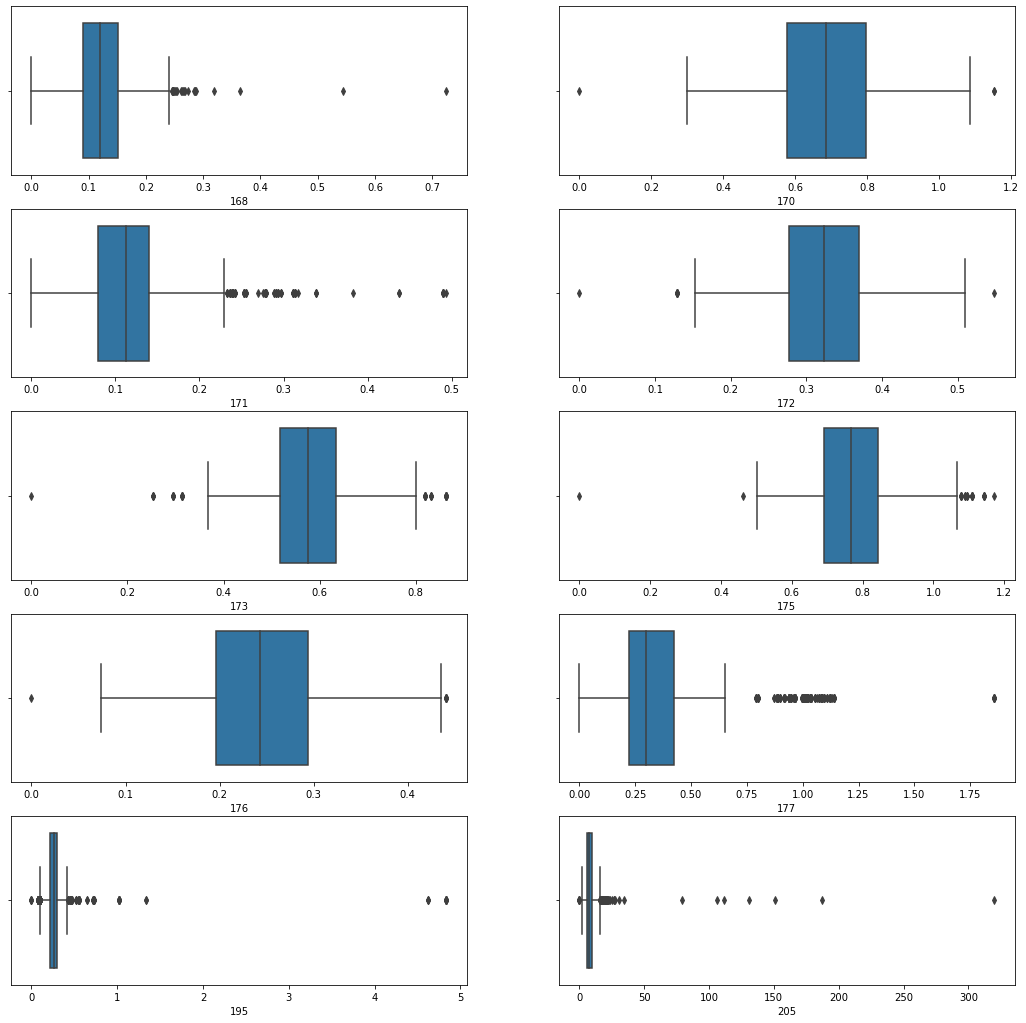

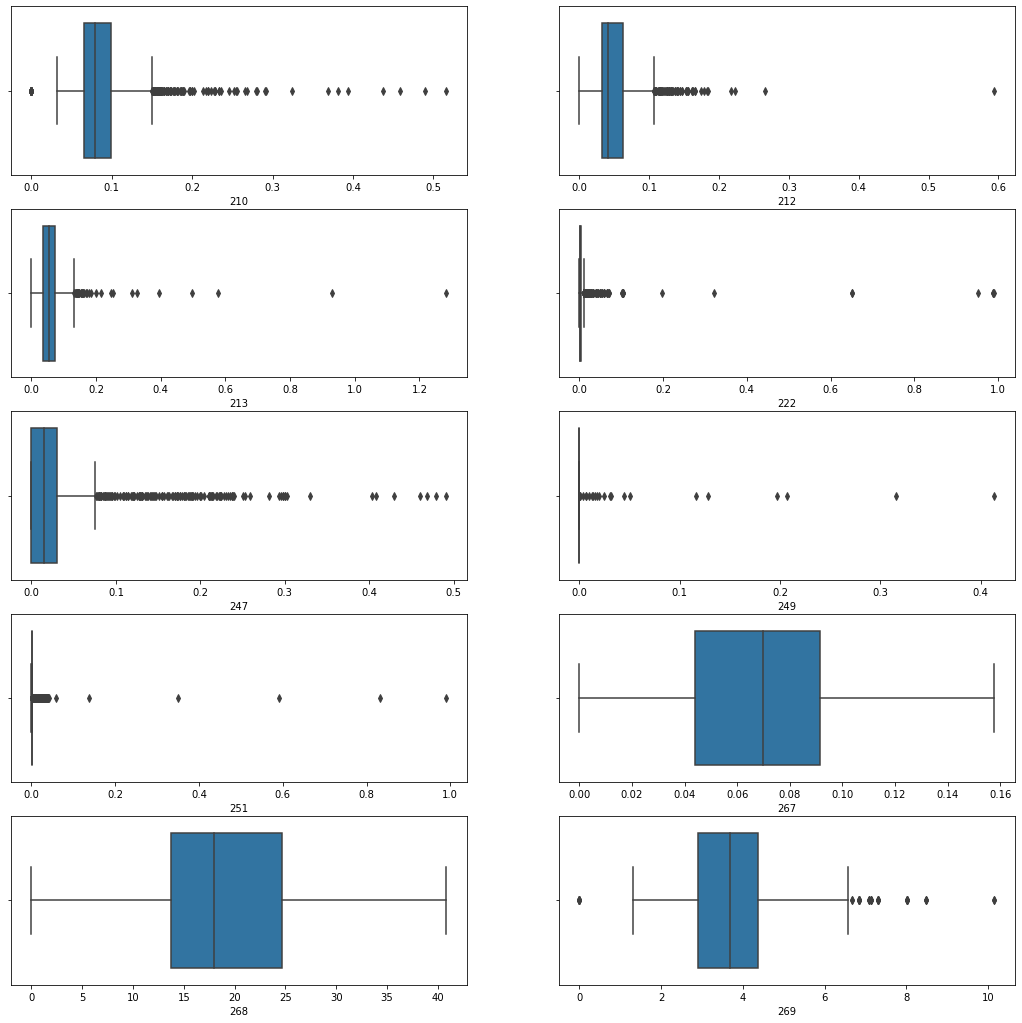

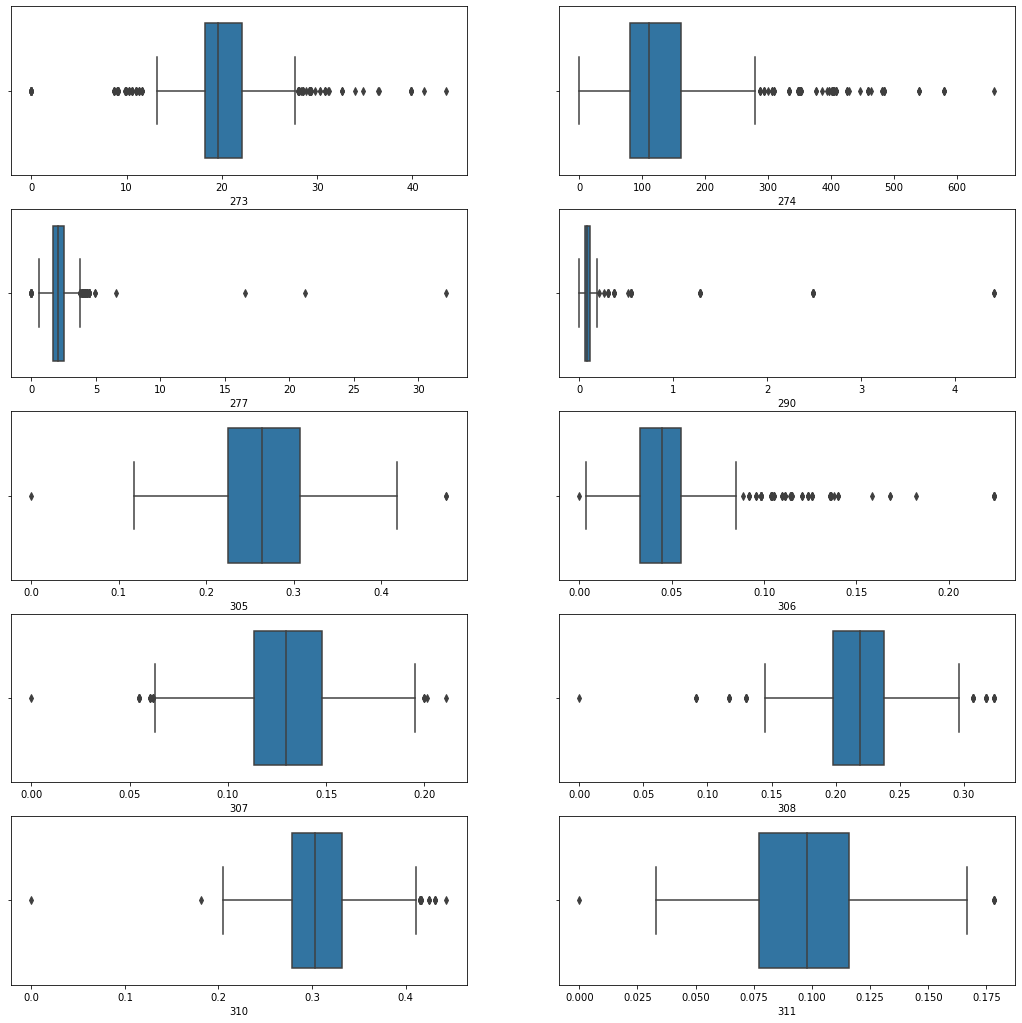

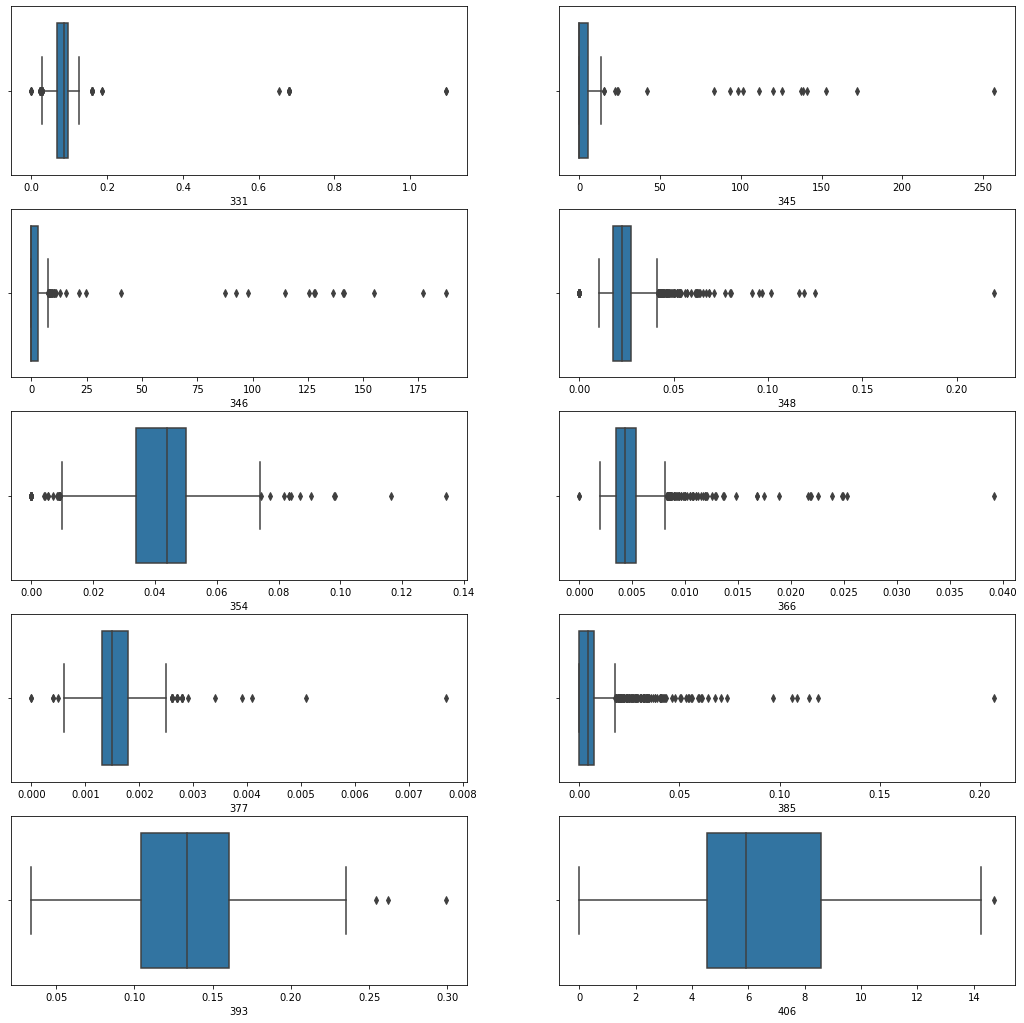

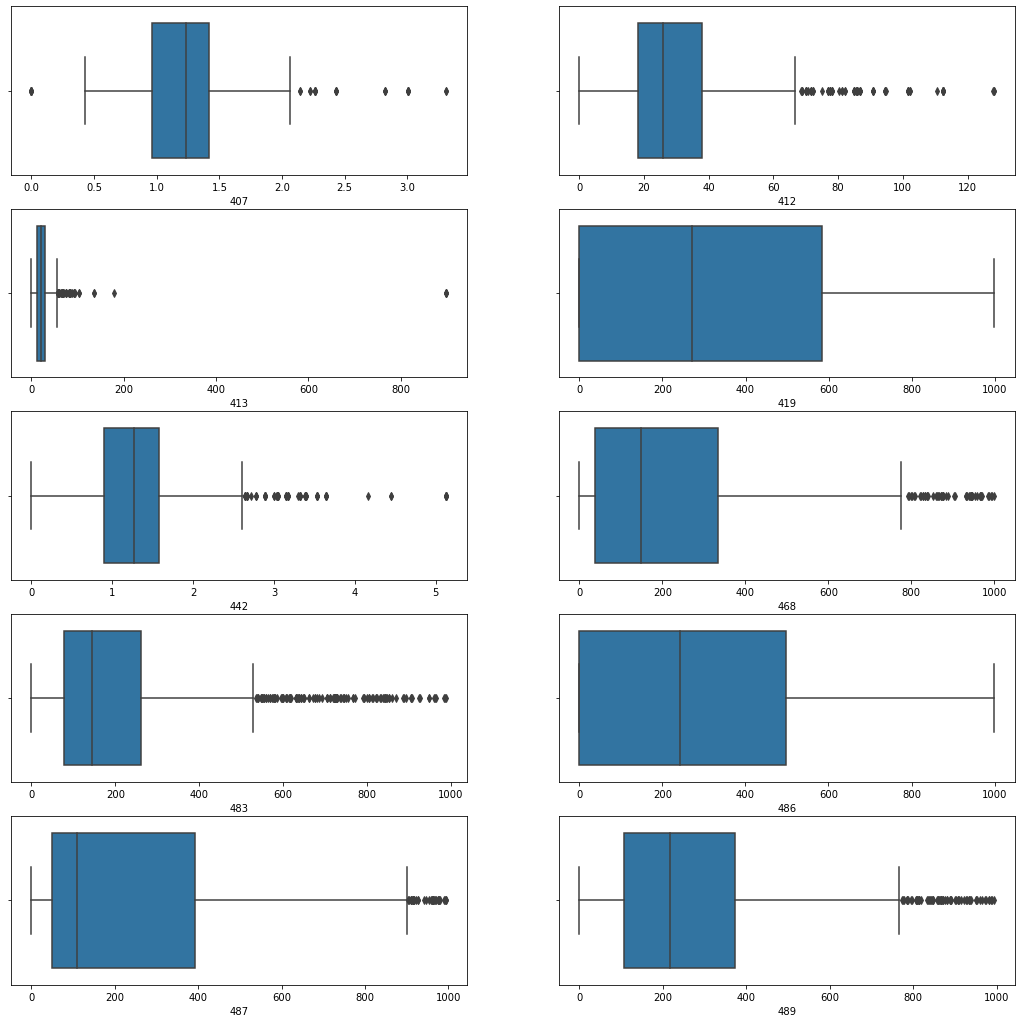

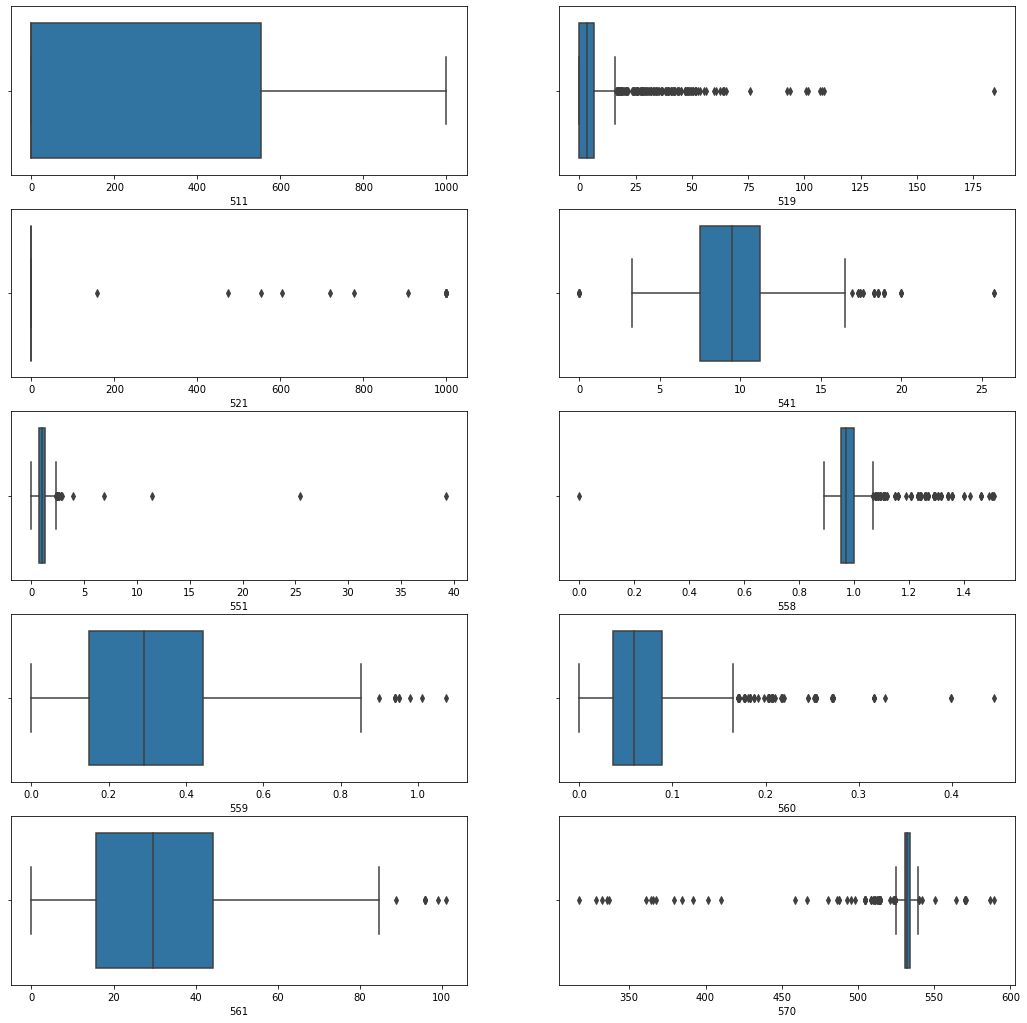

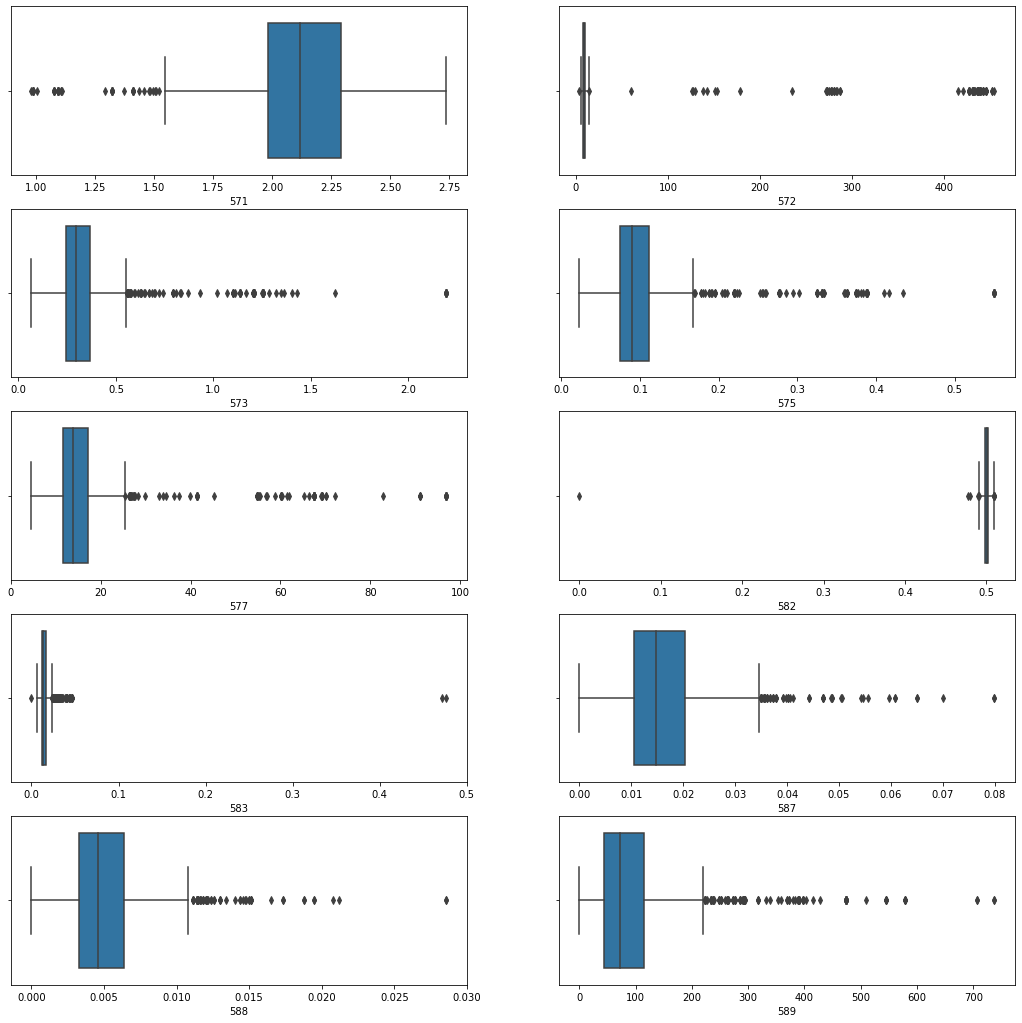

In [31]:
#ploting the graph for the columns which are statistically important.
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

boxplotData = SMPDfRaw

for i in (x):
    lenImptrCol = len(i)/2
    fig, ax = plt.subplots(round(lenImptrCol) ,2, figsize=(18,18))
    listOfColumns = list(i)
    len_listOfColumns = len(i)
    index = 0
    
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            if(index < len_listOfColumns):
                sns.boxplot(x=boxplotData[str(listOfColumns[index])],ax = ax[j][i]);            
                index = index + 1
    fig.show()

    boxplot on each column shows the data distribution, There are outliers observed in many plot. Since the data provided is a machine generated one, here we can plan not to treat the outliers. Sicne the problem provided is a binary classification, it is always better plot the graphs based on class for understanding overlapp of data.

In [32]:
n = 9
boxplotColumnList = list(divide_chunks(identifiedImprtCol, n))
print(boxplotColumnList)

[['2', '3', '4', '6', '7', '11', '17', '19', '25'], ['32', '33', '34', '35', '36', '37', '38', '39', '40'], ['41', '55', '56', '72', '73', '78', '84', '87', '89'], ['100', '103', '112', '114', '119', '122', '125', '126', '127'], ['128', '130', '132', '133', '134', '138', '139', '142', '147'], ['153', '155', '163', '164', '166', '168', '170', '171', '172'], ['173', '175', '176', '177', '195', '205', '210', '212', '213'], ['222', '247', '249', '251', '267', '268', '269', '273', '274'], ['277', '290', '305', '306', '307', '308', '310', '311', '331'], ['345', '346', '348', '354', '366', '377', '385', '393', '406'], ['407', '412', '413', '419', '442', '468', '483', '486', '487'], ['489', '511', '519', '521', '541', '551', '558', '559', '560'], ['561', '570', '571', '572', '573', '575', '577', '582', '583'], ['587', '588', '589']]


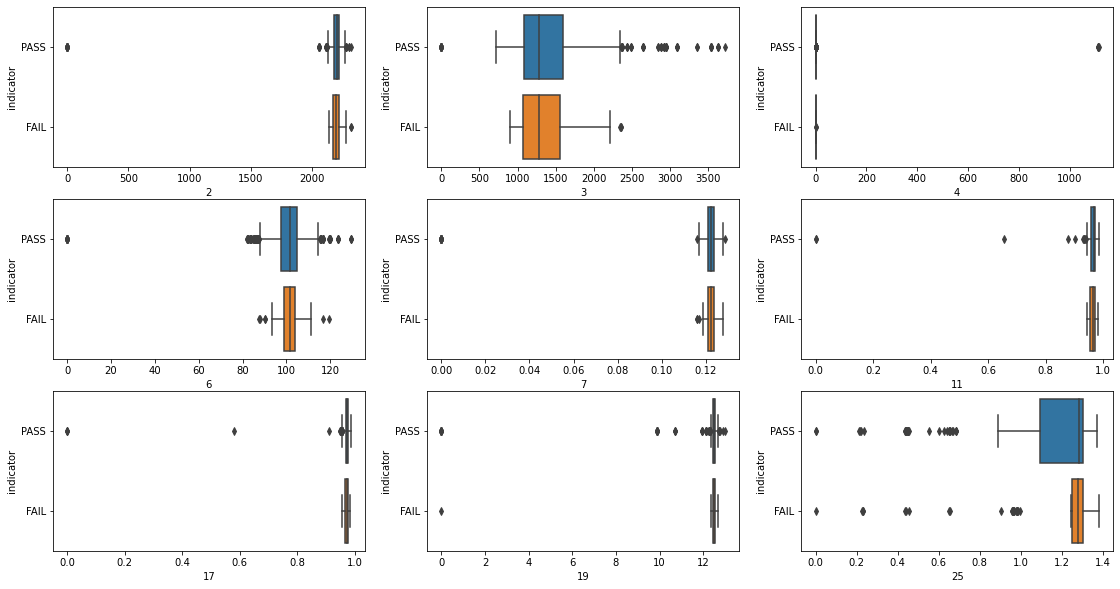

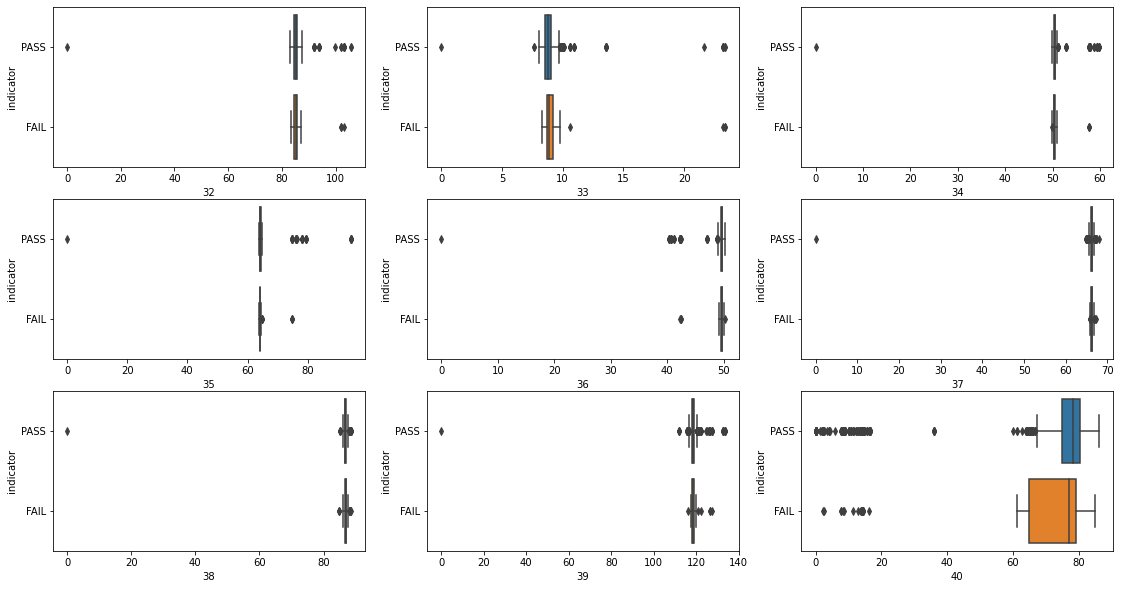

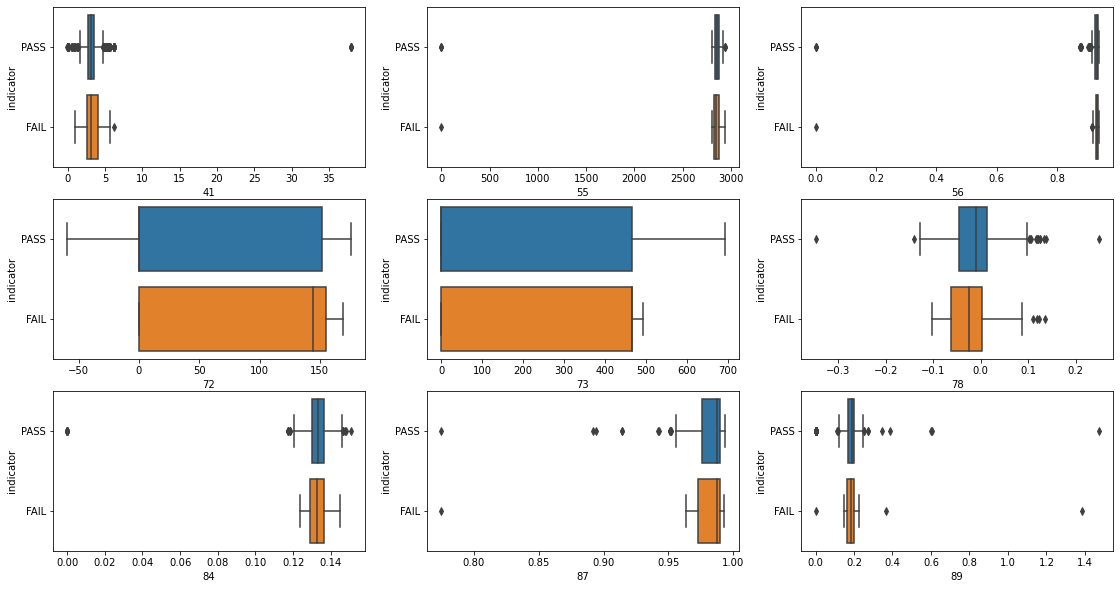

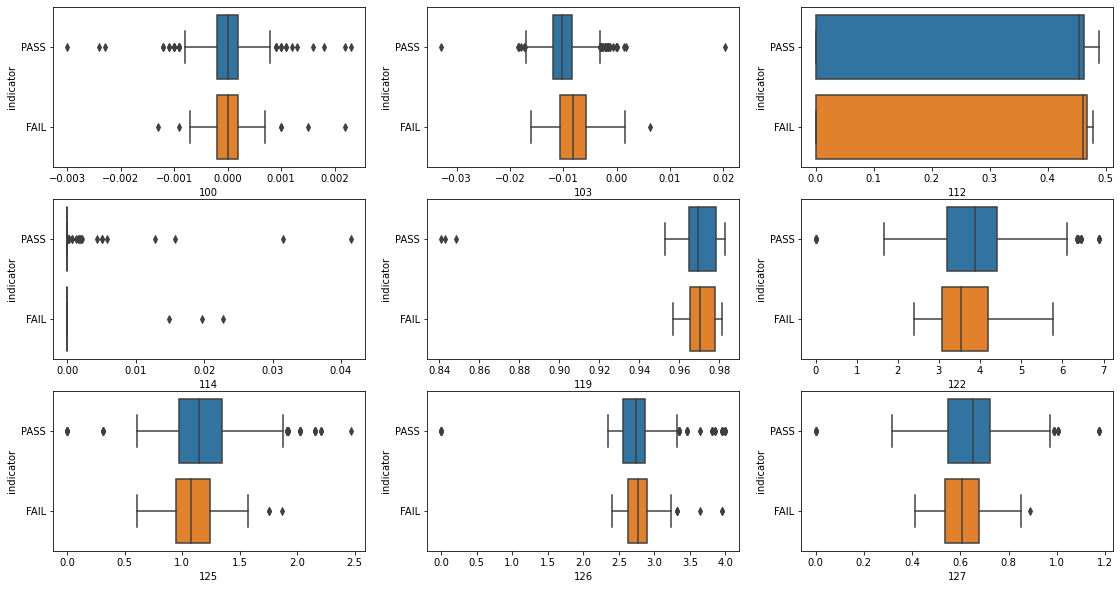

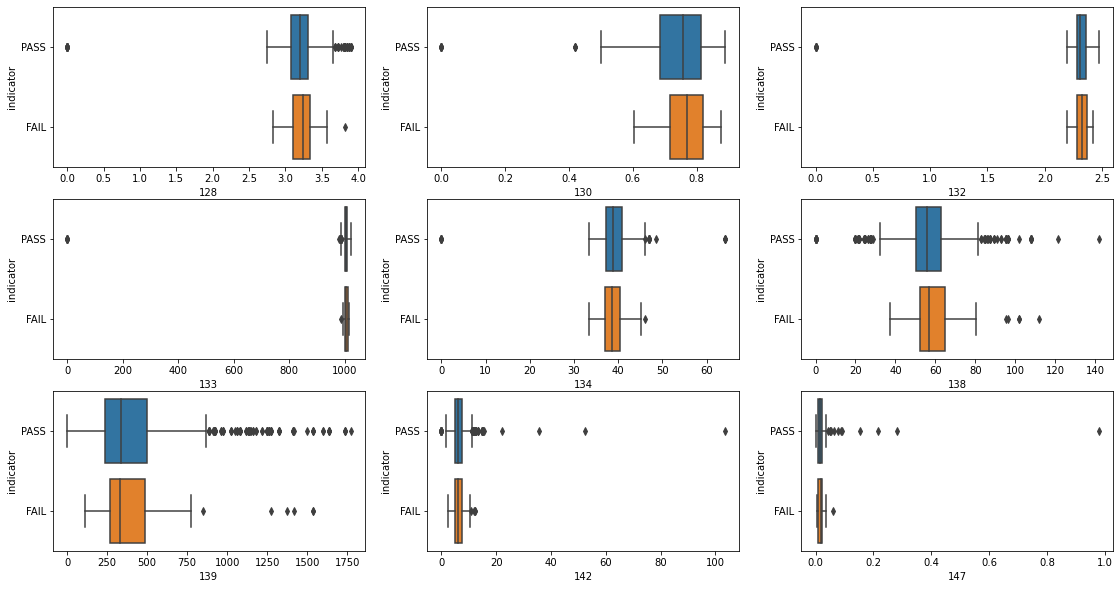

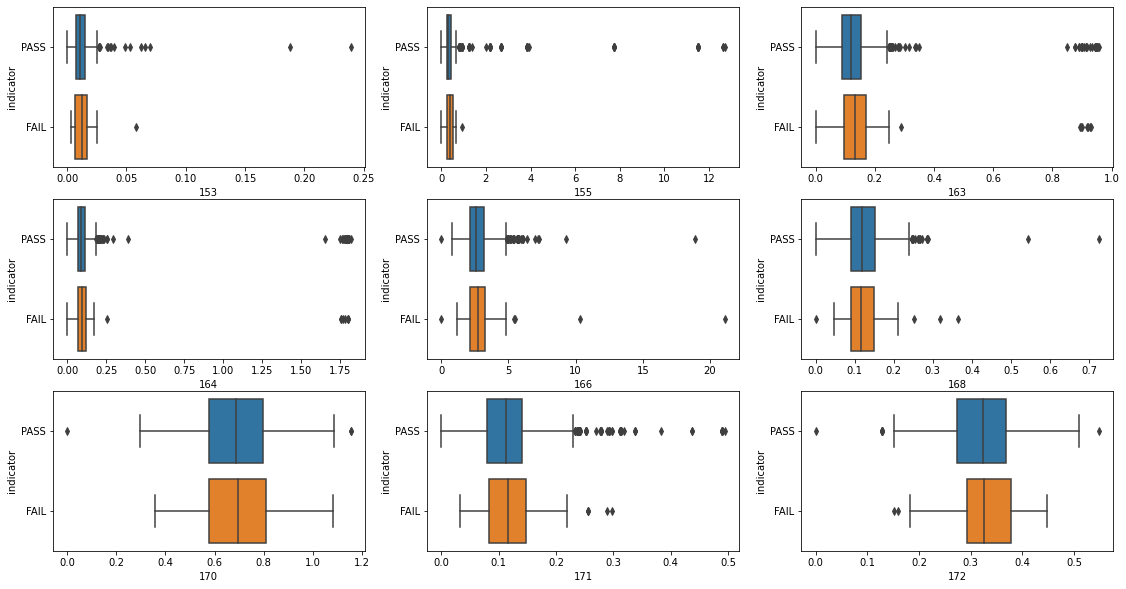

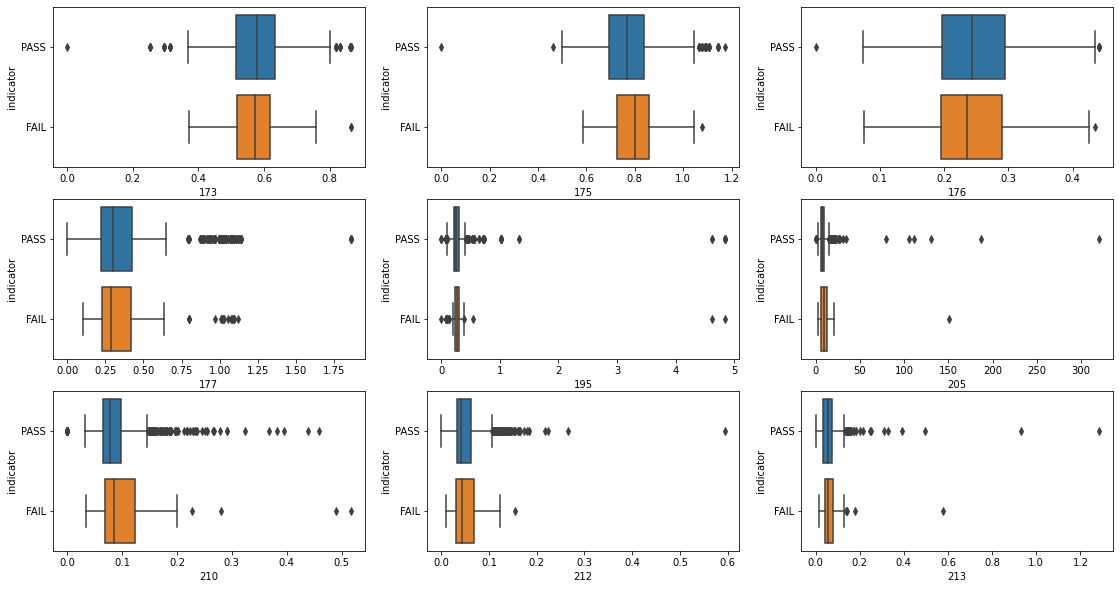

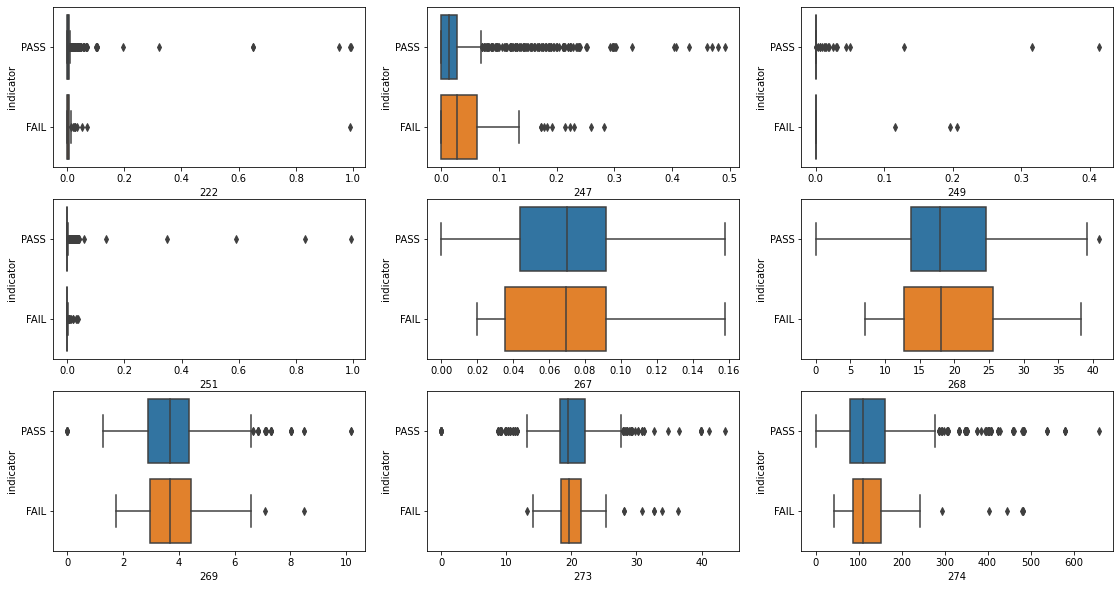

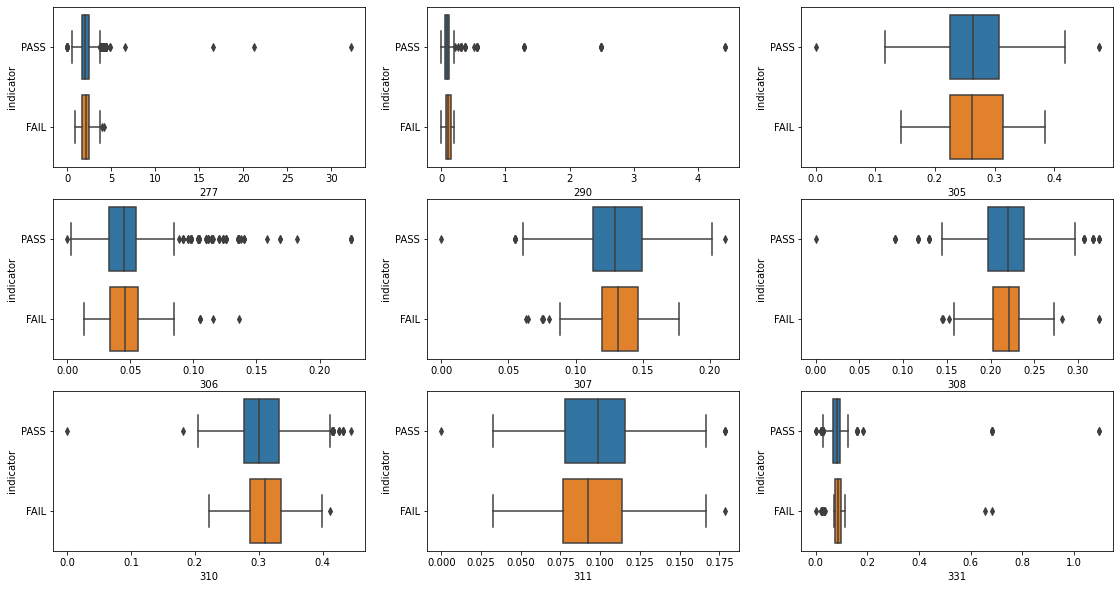

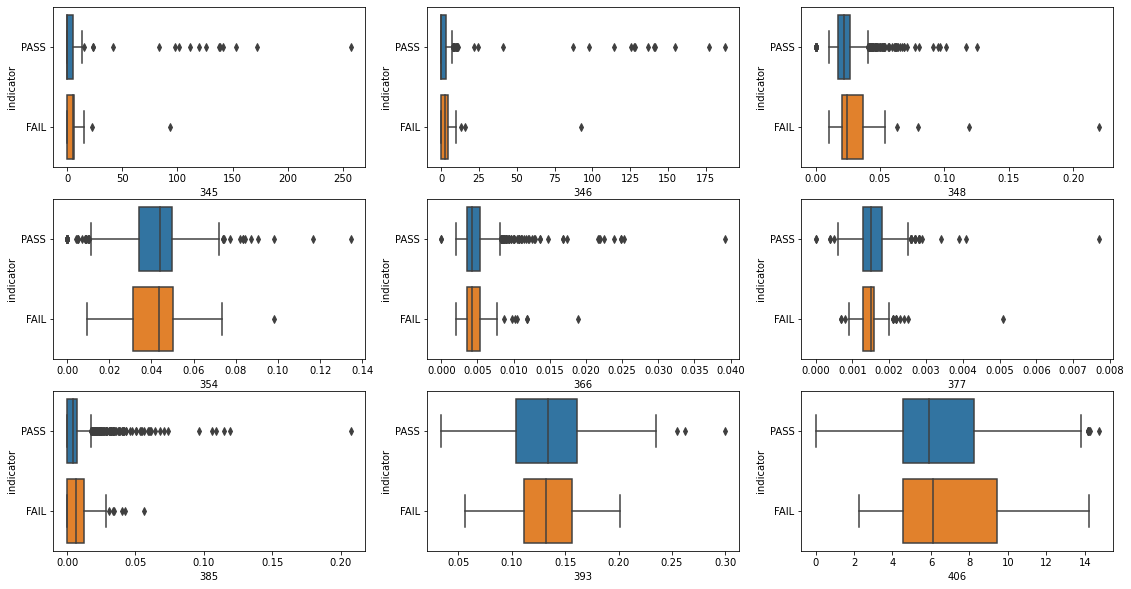

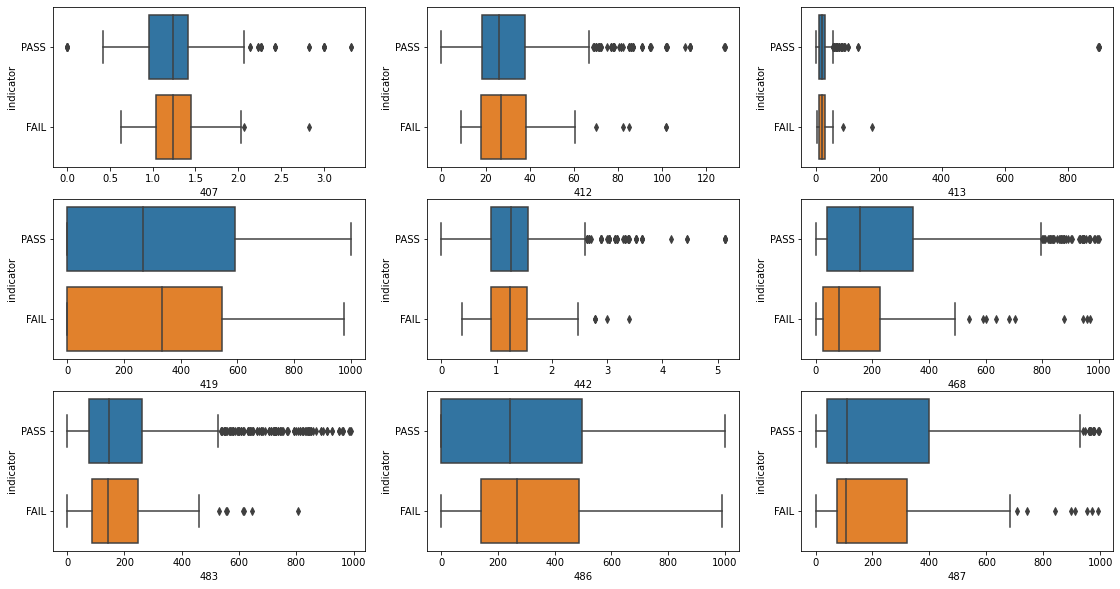

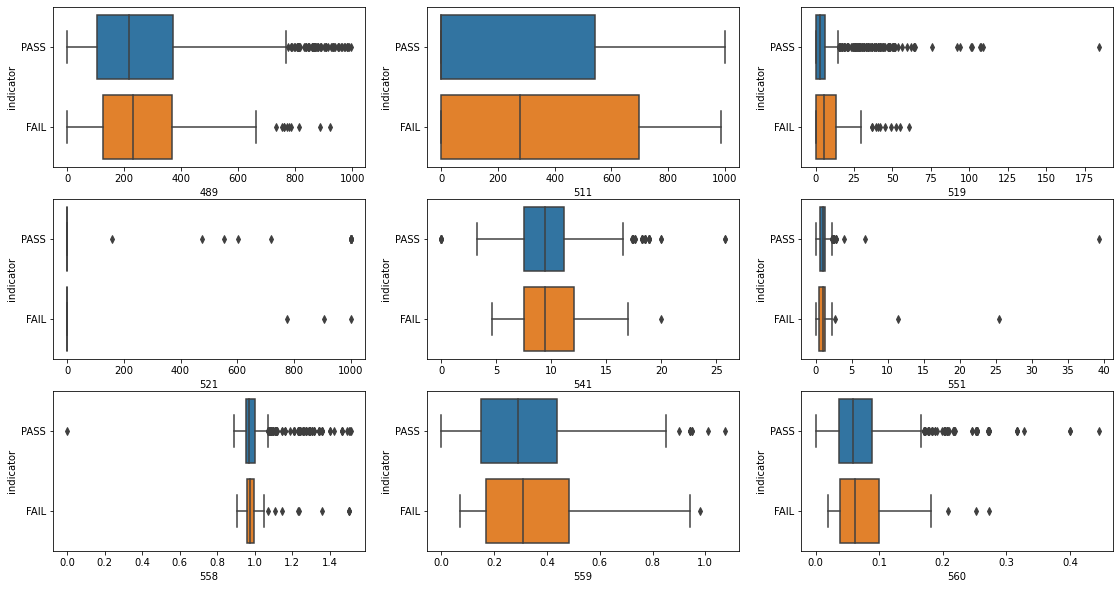

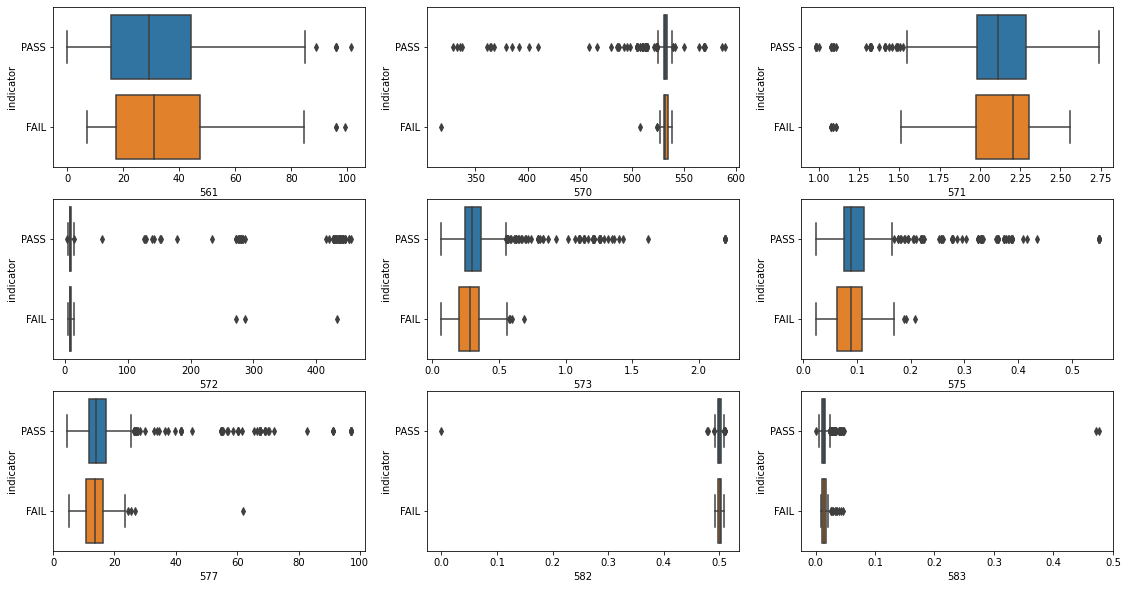

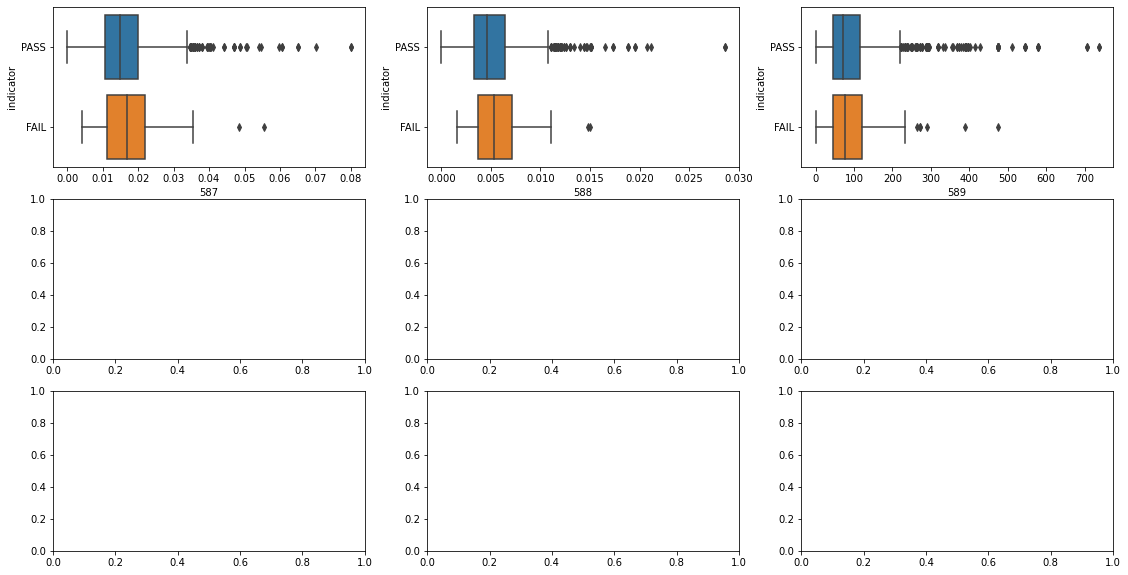

In [33]:
from matplotlib.pyplot import figure

boxplotData = SMPDfRaw

df1113 = pd.Series(np.where(boxplotData['Pass/Fail']==-1, 'PASS', 'FAIL')).to_frame('indicator')
frames = [boxplotData[identifiedImprtCol]  , df1113]
result = pd.concat(frames, axis=1)


for clList in boxplotColumnList:
    index = 0
    fig, axes = plt.subplots(3 ,3, figsize=(19,10))
    lastLoopF = 1
    for i in range(3):
        for j in range(3):
            if((clList[index]) != result.columns[-2]):
                sns.boxplot(data=result,x=str(clList[index]),y='indicator',ax = axes[i,j]); 
                index = index + 1
            elif((clList[index]) == result.columns[-2] and lastLoopF == 1):
                sns.boxplot(data=result,x=str(clList[index]),y='indicator',ax = axes[i,j]); 
                lastLoopF = 0

    In above box plots we can see difference in data distribution in the class. Although there are few overlaps, there are data points gives us hint about difference in classes. Here we need to oversample the data as the target class is having very less instance for fail class.

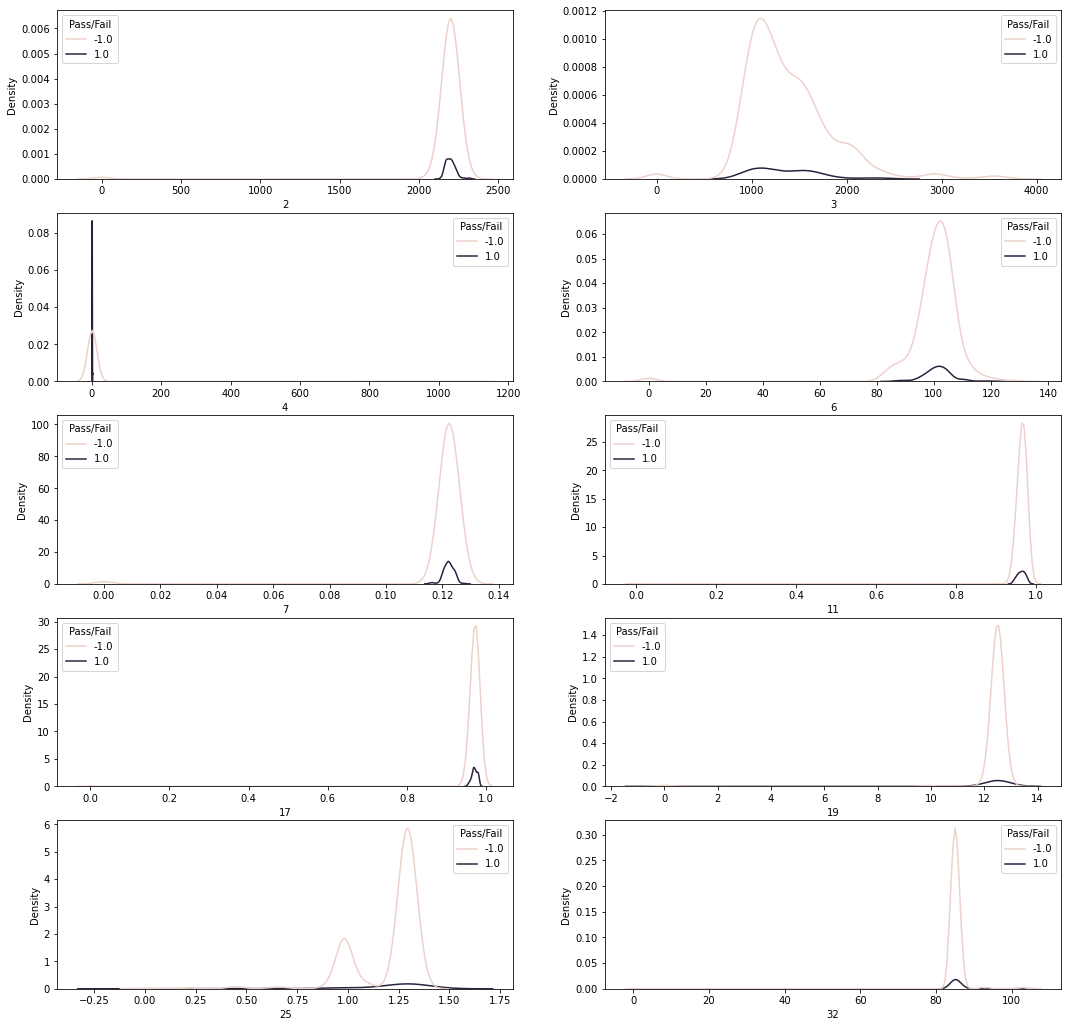

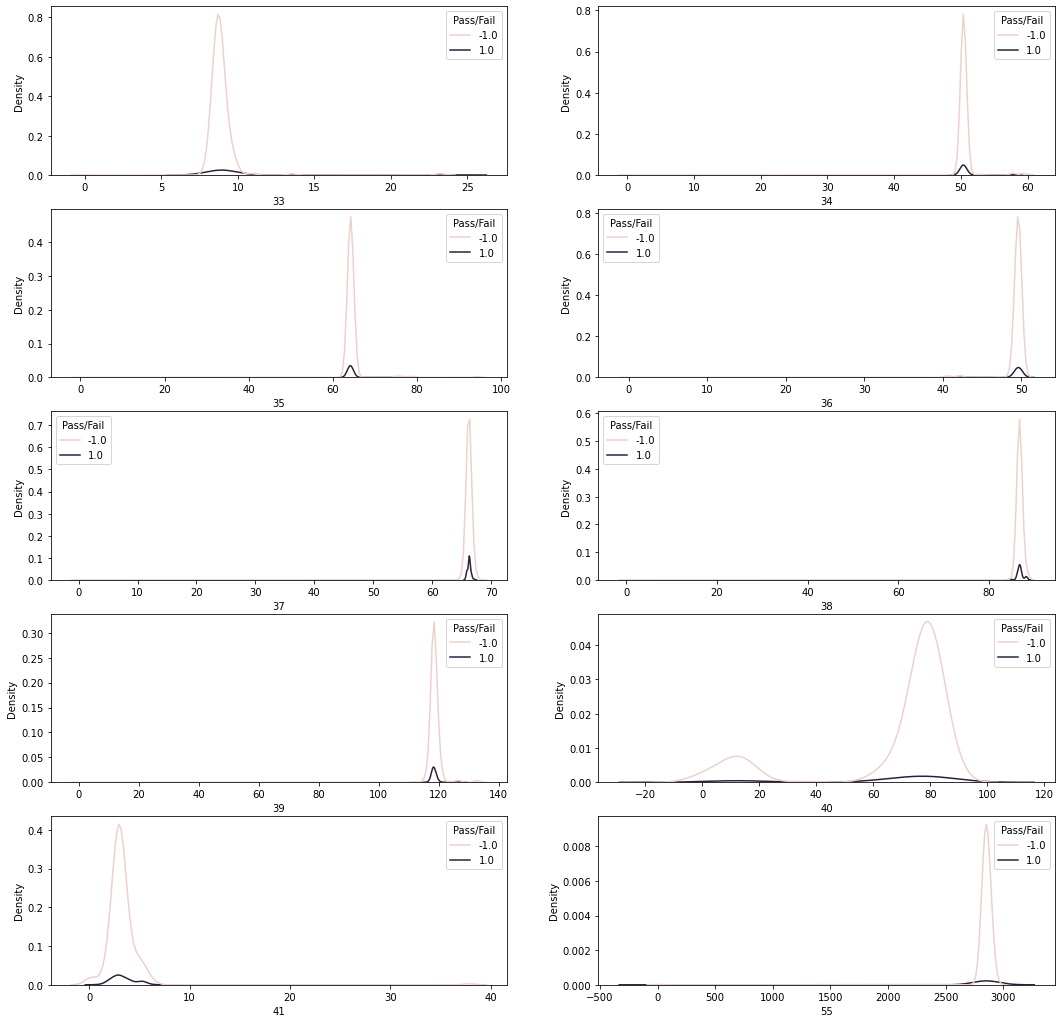

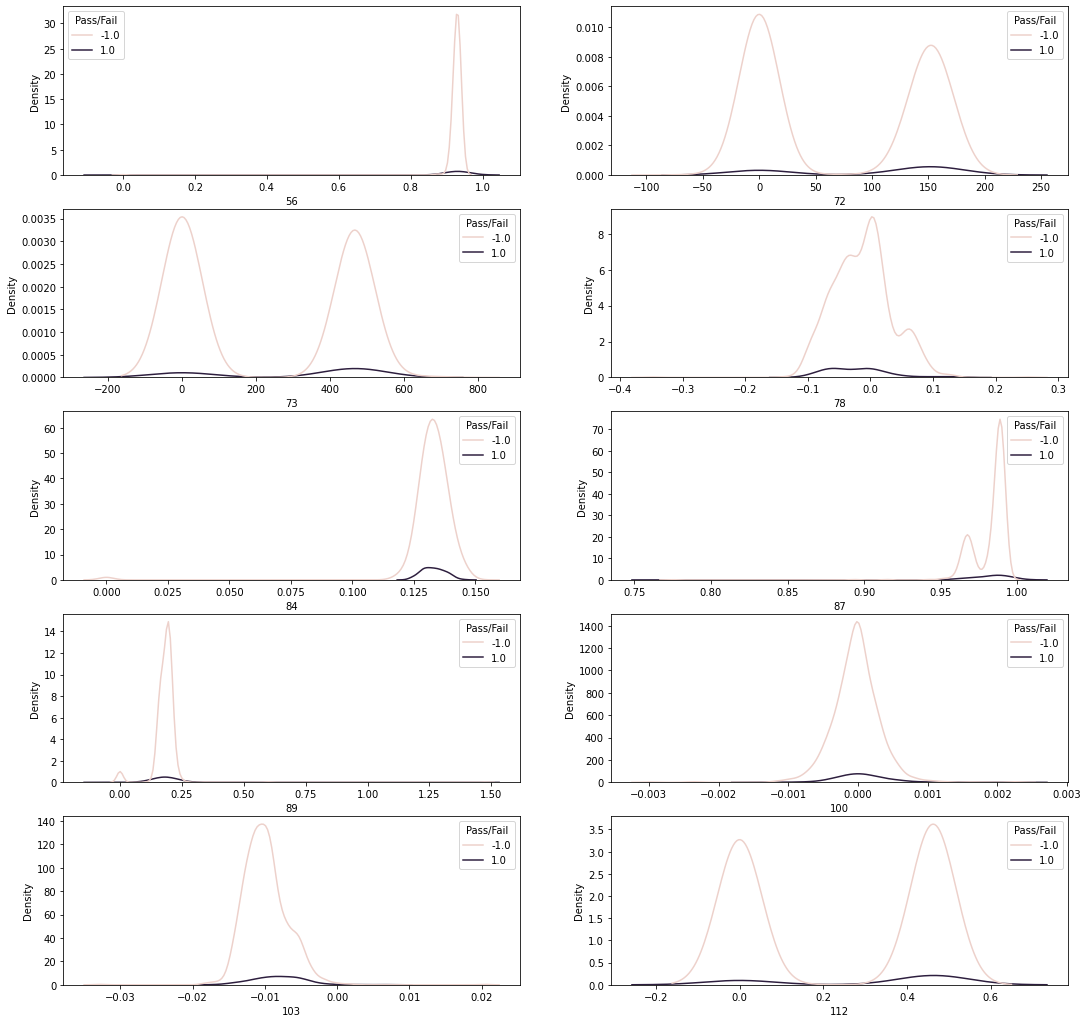

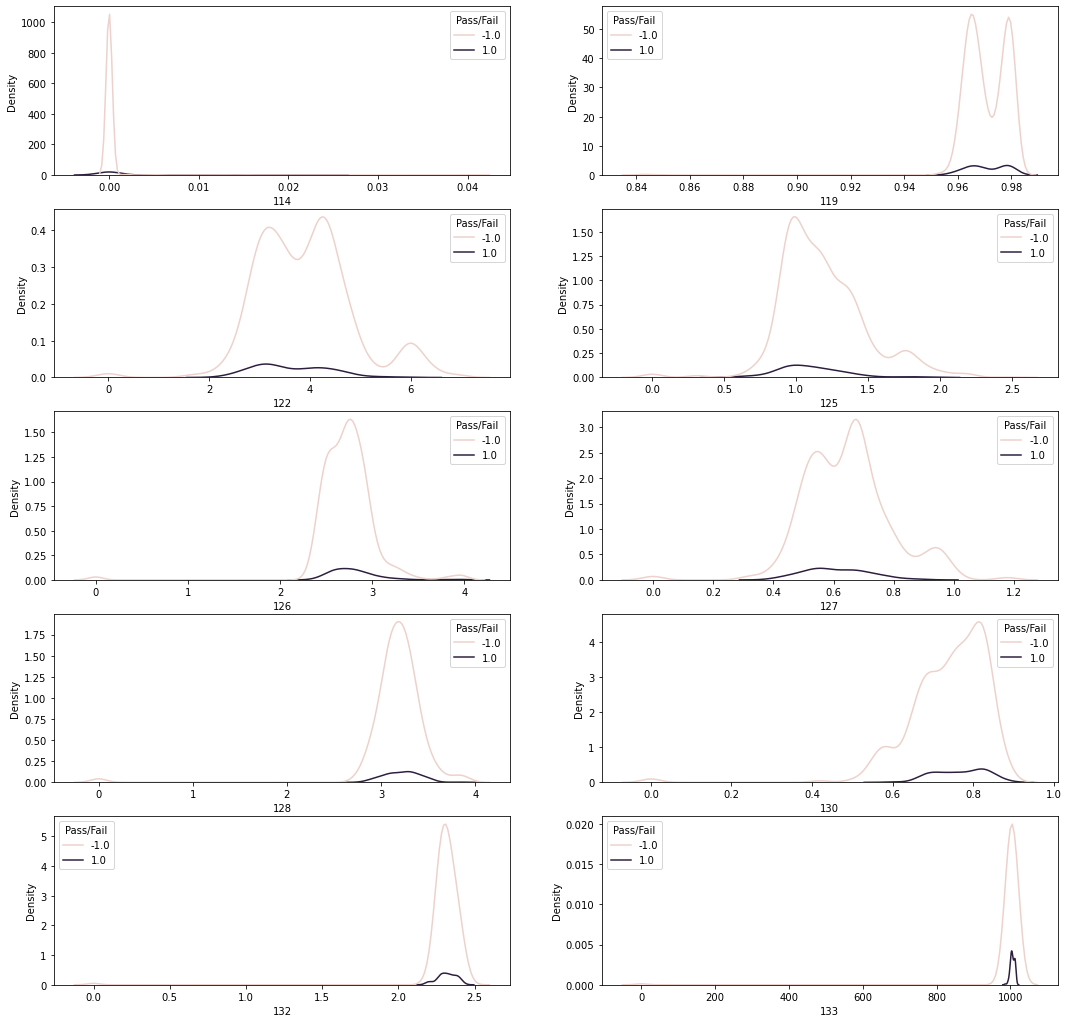

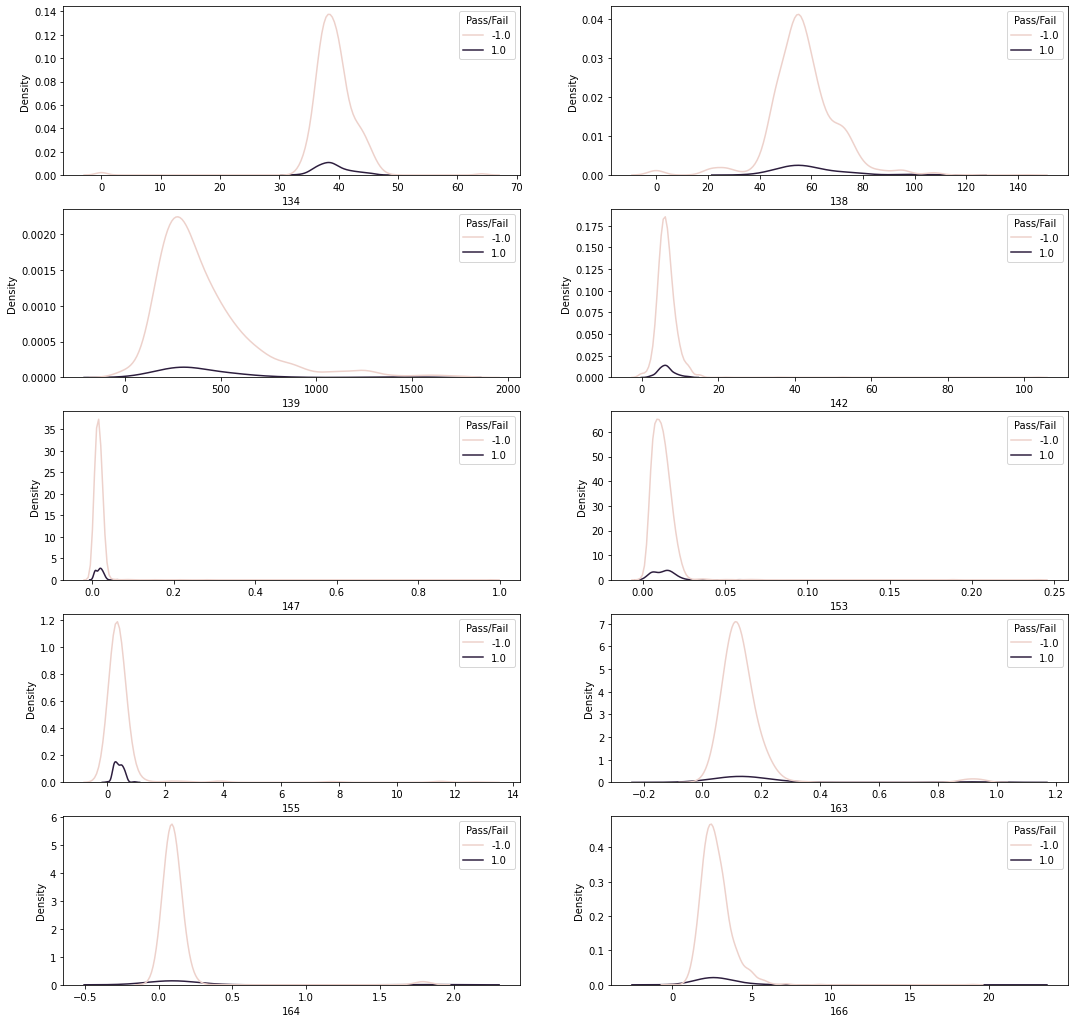

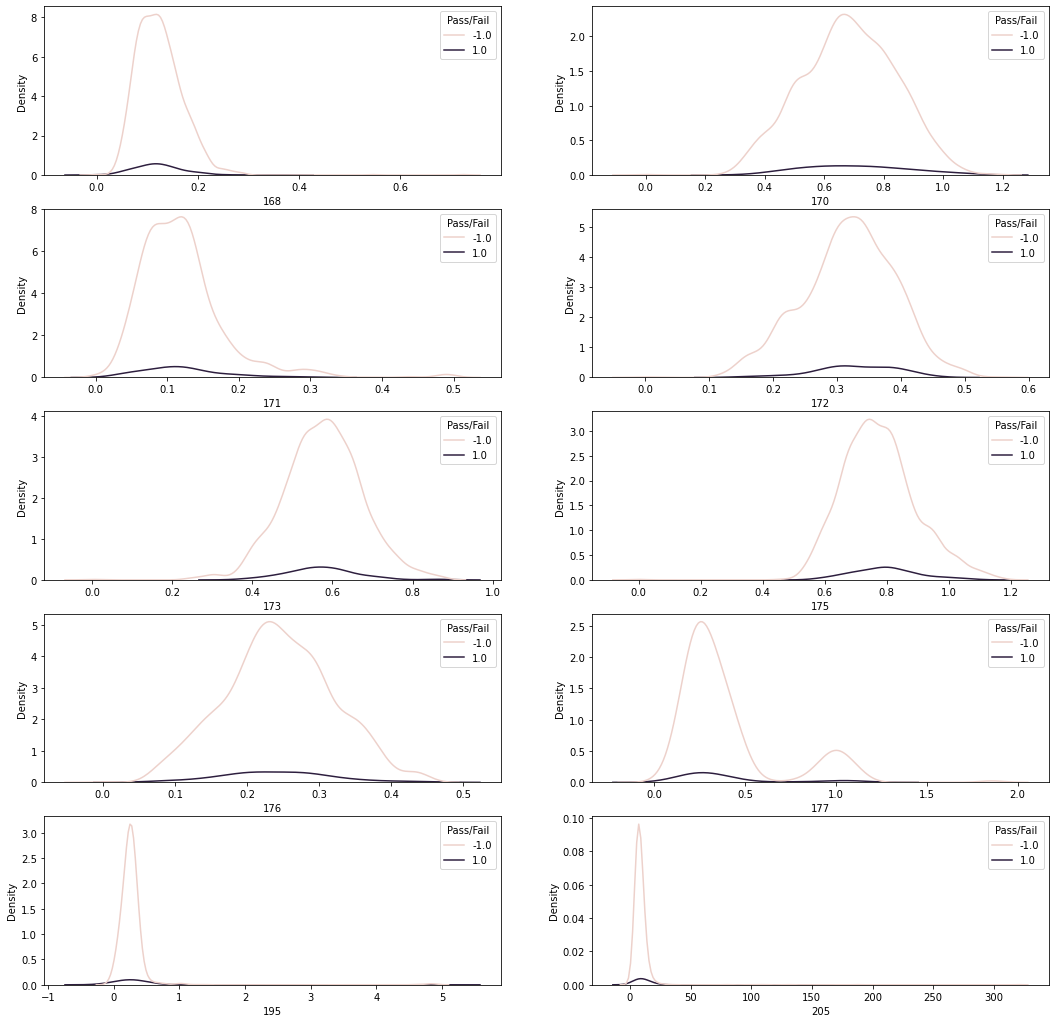

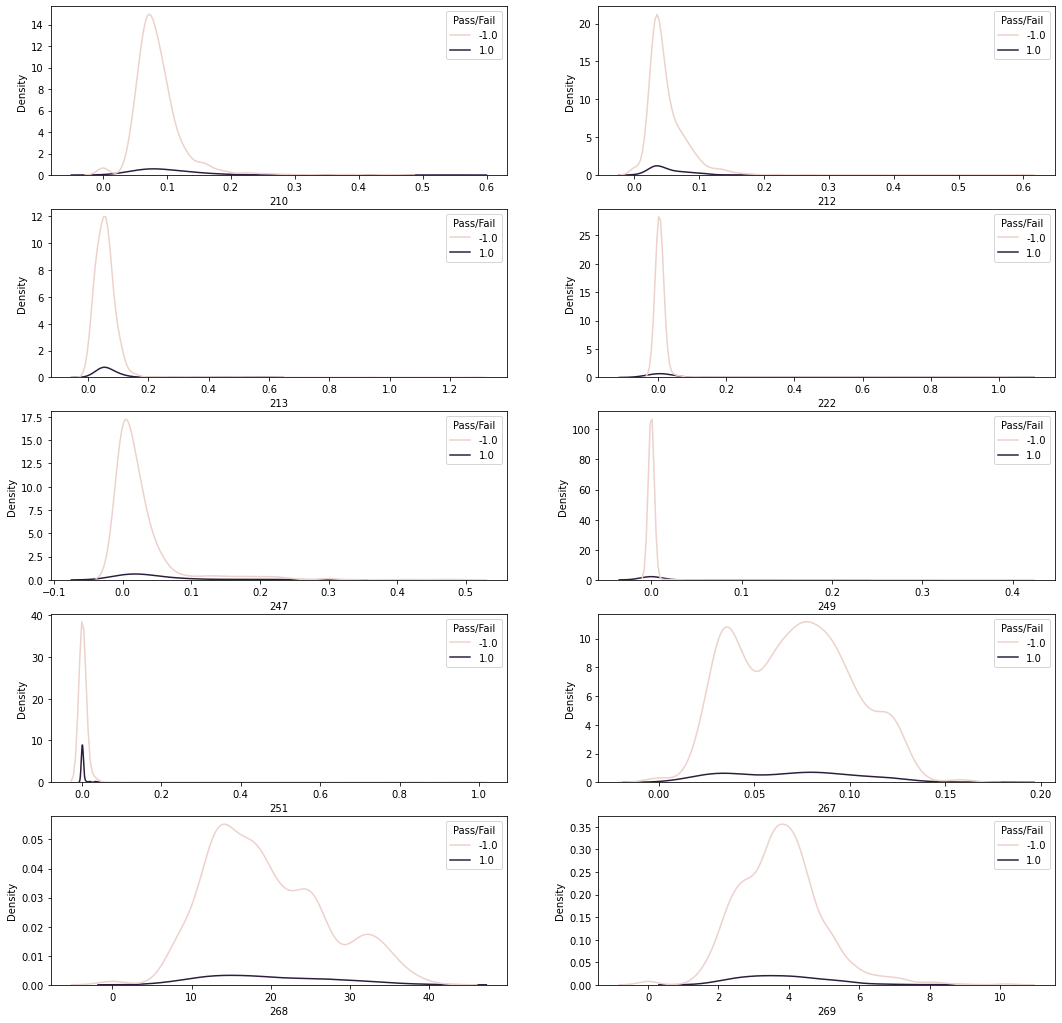

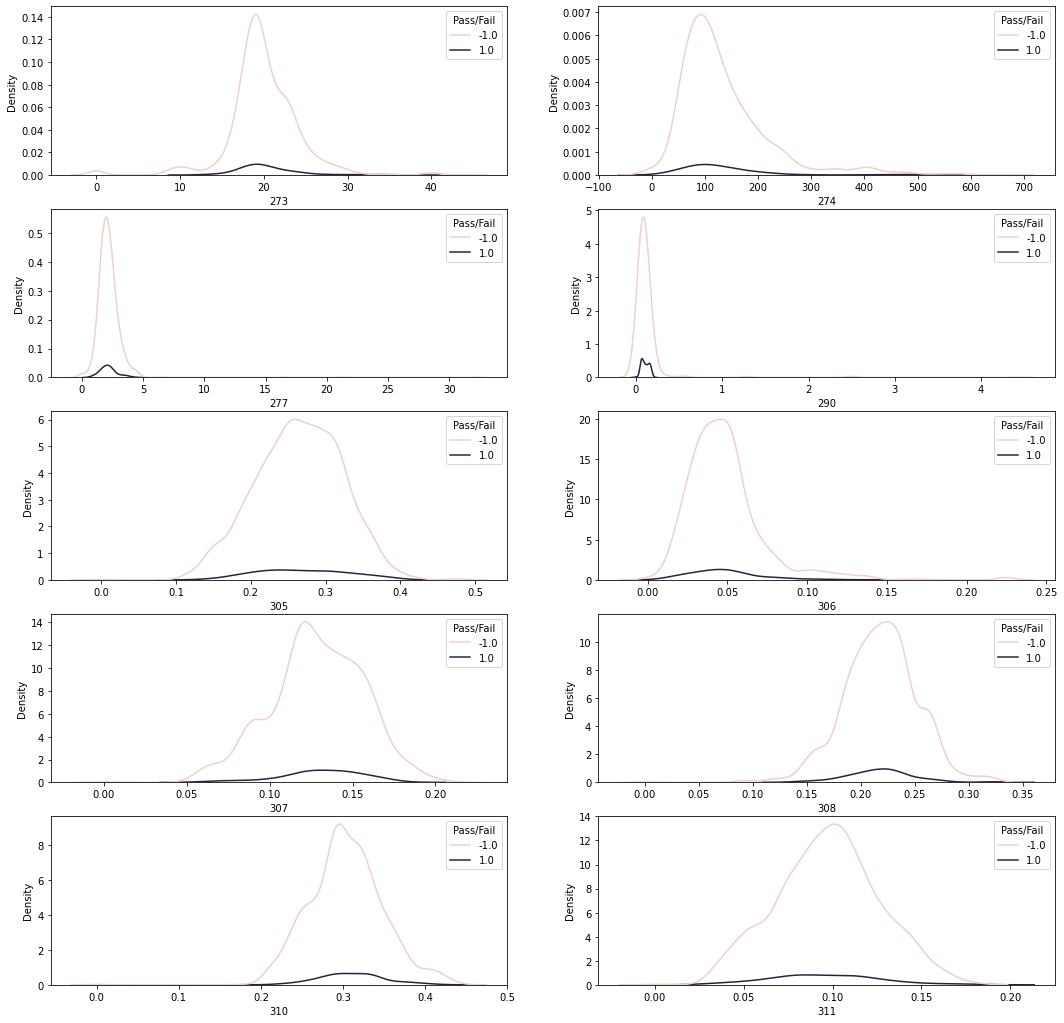

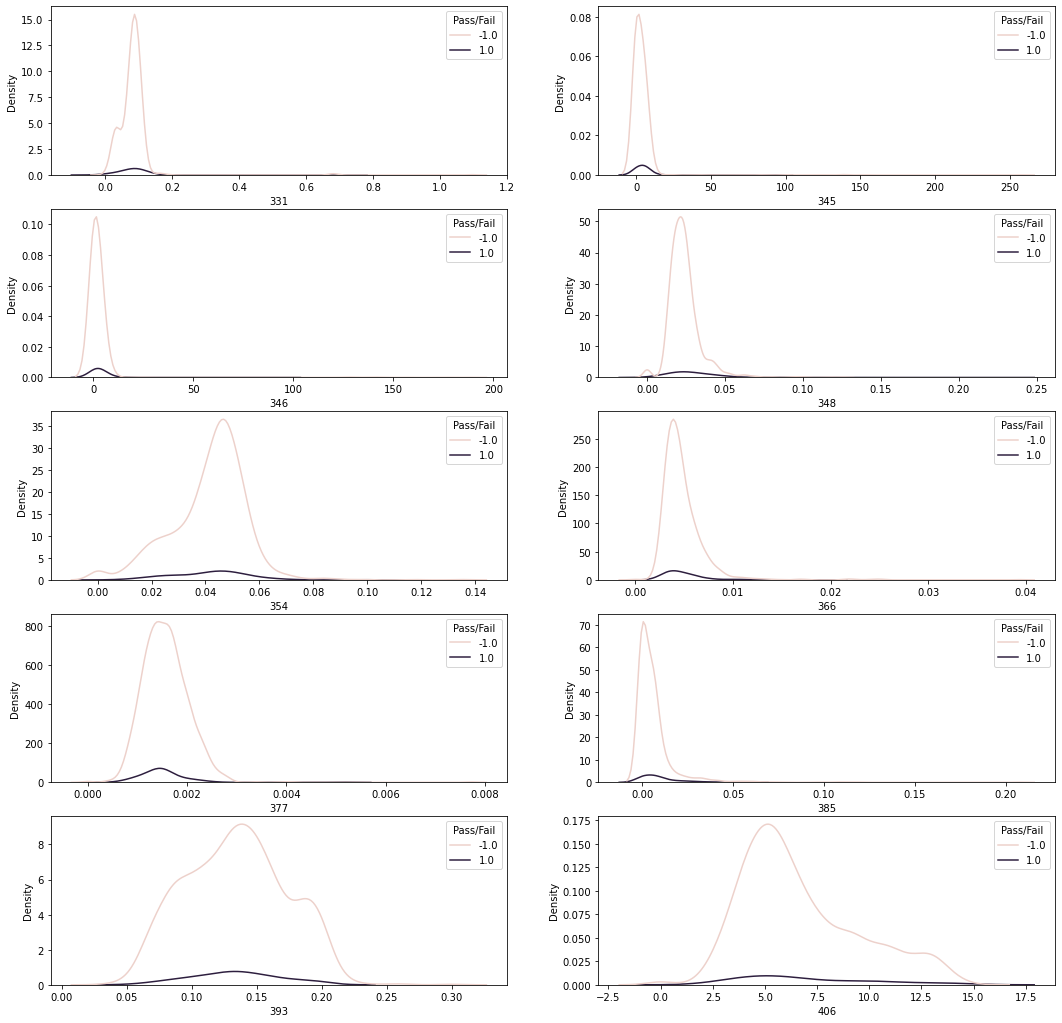

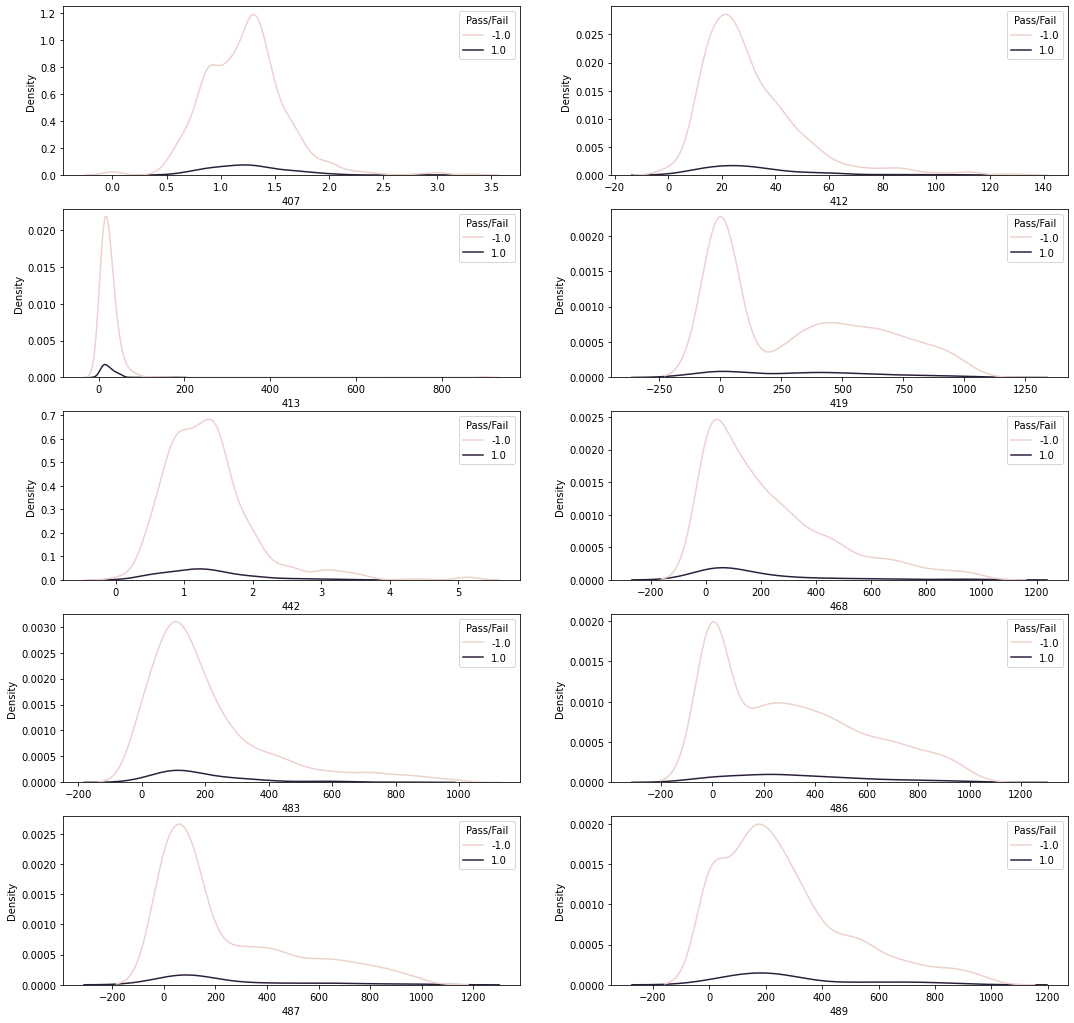

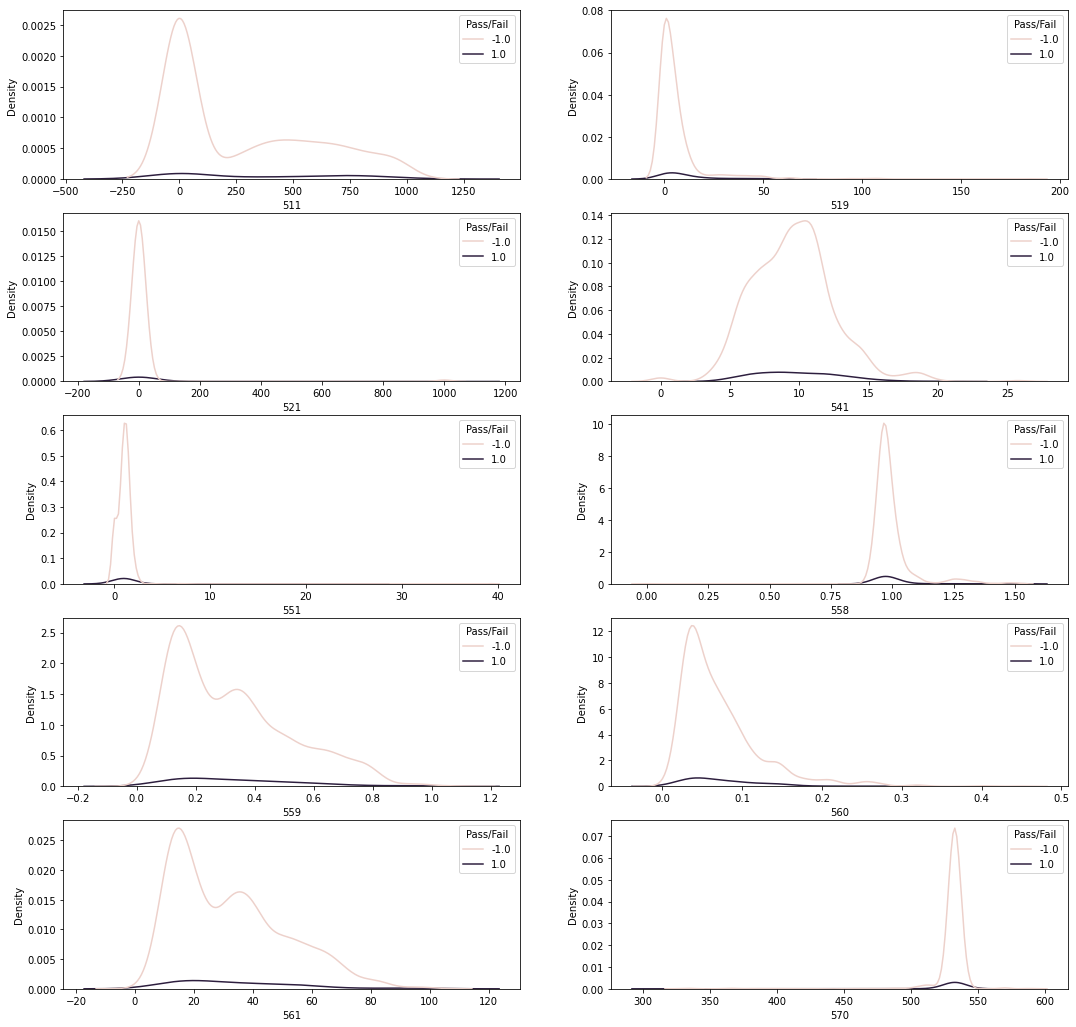

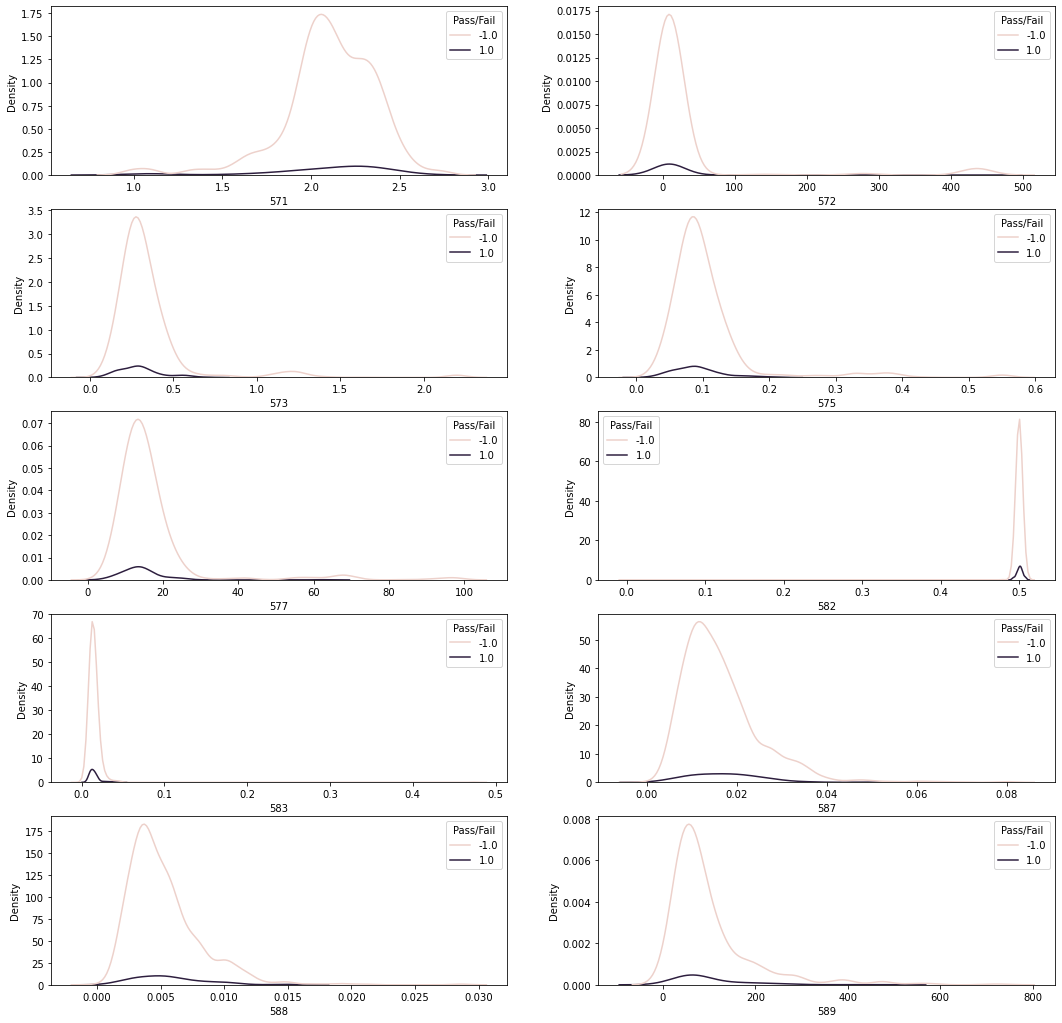

In [34]:
#ploting the graph for the columns which are statistically important.
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

boxplotData = SMPDfRaw
boxplotData
for i in (x):
    lenImptrCol = len(i)/2
    fig, ax = plt.subplots(round(lenImptrCol) ,2, figsize=(18,18))
    listOfColumns = list(i)
    len_listOfColumns = len(i)
    index = 0
    
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            if(index < len_listOfColumns):
                sns.kdeplot(data=boxplotData, x=str(listOfColumns[index]), hue="Pass/Fail",ax = ax[j][i])
#                 boxplot(x=boxplotData[str(listOfColumns[index])],ax = ax[j][i]);            
                index = index + 1
    fig.show()

     Target column –1 corresponds to a pass and 1 corresponds to a fail. Here we can clearly observe the data behaviour which helps us in the difference in class for a particular column. Usual observation is that fail cases are having difference mean and median than that of pass cases.

In [35]:
# #pair plot on all coloumn won't provide necessary understanding of data, Hence better to do it on subset of data.
# ppDf = SMPDfRaw[['2', '3', '4', '6', '7', '11', '17', '19', '25', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '55', '56', '72', '73', '78', '84', '87', '89', '100', '103', '112', '114', '119', '122', '125', '126', '127', '128', '130', '132', '133', '134', '138', '139', '142', '147', '153', '155', '163', '164', '166', '168', '170', '171', '172', '173', '175', '176', '177', '195', '205', '210', '212', '213', '222', '247', '249', '251', '267', '268', '269', '273', '274', '277', '290', '305', '306', '307', '308', '310', '311', '331', '345', '346', '348', '354', '366', '377', '385', '393', '406', '407', '412', '413', '419', '442', '468', '483', '486', '487', '489', '511', '519', '521', '541', '551', '558', '559', '560', '561', '570', '571', '572', '573', '575', '577', '582', '583', '587', '588', '589']]
# sns.pairplot(ppDf)
# pair plot was not giving proper visibility on the dataset.. So it is commented

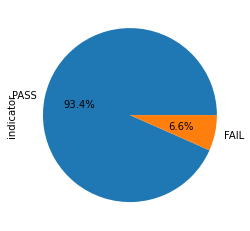

In [36]:
# result.columns
result['indicator'].value_counts().plot.pie(autopct="%.1f%%");

    The dataset provided is not balanced, there are less "Fail" cases.

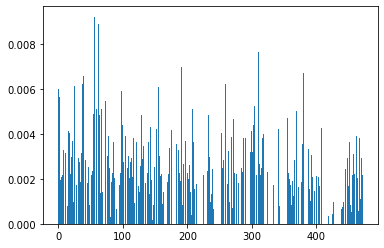

In [37]:
#Getting feature importance using RFC
from sklearn.ensemble import RandomForestClassifier
X = droppedColumnDF_99.iloc[:, 1:-1]
y = droppedColumnDF_99.iloc[:, -1]

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)#,stratify = y)
for i in X_train.columns[X_train.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
    X_train[i].fillna(X_train[i].mean(),inplace=True)
# define the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

     Most column in the dataset which is cleaned by dropping unnecessary column are important.

###### Data pre-processing:
    • Segregate predictors vs target attributes
    • Check for target balancing and fix it if found imbalanced.
    • Perform train-test split and standardise the data or vice versa if required.
    • Check if the train and test data have similar statistical characteristics when compared with original data.

In [38]:
SMPdf = SMPDfRaw
# SMPdf = droppedColumnDF_97
SMPdf.shape

(1567, 592)

    We will consider entire dataset for data preprocessing, later we can use other dataset with reduced column for some performance improvements.

###### Segregate predictors vs target attributes

In [39]:
X = SMPdf.iloc[:,:-1]
y = SMPdf.iloc[:,-1:]

In [40]:
print(X.shape)
print(y.shape)

(1567, 591)
(1567, 1)


###### Check for target balancing and fix it if found imbalanced.

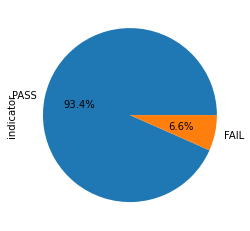

In [41]:
checkTargetImbalanceDf = pd.Series(np.where(SMPdf['Pass/Fail']==-1, 'PASS', 'FAIL')).to_frame('indicator')
checkTargetImbalanceDf['indicator'].value_counts().plot.pie(autopct="%.1f%%");

    The available dataset is imbalanced dataset where in "Fail" ( value as 1  in 'Pass/Fail' column) is having less percent of data.

**Apply Smote technique to balance dataset**

In [42]:
# Oversample with SMOTE and random undersample for imbalanced dataset
X = X.iloc[:,1:]
counter = Counter(y)
# define pipeline
over = SMOTE(sampling_strategy=0.15)
under = RandomUnderSampler(sampling_strategy=0.26)
steps = [('o', over), ('u', under)]
pipeline = imb.pipeline.Pipeline(steps=steps)
# transform the dataset
X_Smote, y_Smote = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print("Before applying SMOTE :: " , "\n", y['Pass/Fail'].value_counts(normalize=True))
print("After applying SMOTE :: " , "\n", y_Smote['Pass/Fail'].value_counts(normalize=True))

Before applying SMOTE ::  
 -1.0    0.933631
 1.0    0.066369
Name: Pass/Fail, dtype: float64
After applying SMOTE ::  
 -1.0    0.793591
 1.0    0.206409
Name: Pass/Fail, dtype: float64


    Below mentioned method is just for future use where in it will help for the question of implementing own sampling technique.

**Apply sampling technique to balance dataset**

In [43]:
df = X.join(y)

In [44]:
def determinePerOfLabel(ipDf):
    vl = ipDf['Pass/Fail'].value_counts(normalize=True)
    return (vl.at[1])

In [45]:
X_p_sample = X
y_p_sample = y

print("Before applying sampling :: " , "\n", y_p_sample['Pass/Fail'].value_counts(normalize=True))
while(determinePerOfLabel(y_p_sample) < float(0.20)):
    extra_samples = df[df['Pass/Fail'] == 1].sample(n = 70, random_state = 1)
    X_p_sample = pd.concat([X_p_sample, extra_samples.drop(columns='Pass/Fail')])
    dfextra_samples = extra_samples['Pass/Fail'].to_frame()
    y_p_sample = pd.concat([y_p_sample, dfextra_samples], axis=0)
#     print("Upsampling, Since sample space is uneven ", determinePerOfLabel())
print("After applying sampling :: " , "\n", y_p_sample['Pass/Fail'].value_counts(normalize=True))

Before applying sampling ::  
 -1.0    0.933631
 1.0    0.066369
Name: Pass/Fail, dtype: float64
After applying sampling ::  
 -1.0    0.792095
 1.0    0.207905
Name: Pass/Fail, dtype: float64


###### Perform train-test split and standardise the data or vice versa if required.

In [46]:
X_SMOTE_train, X_SMOTE_test, y_SMOTE_train, y_SMOTE_test = train_test_split(X_Smote,y_Smote, test_size = 0.3,stratify = y_Smote, random_state = 1)
X_SMOTE_train.shape, X_SMOTE_test.shape, y_SMOTE_train.shape, y_SMOTE_test.shape

((742, 590), (319, 590), (742, 1), (319, 1))

    Using standard scaler to standardise the data 

In [47]:
#standardizing SMOTE train dataset
import pandas as pd
data = X_SMOTE_train
col_names = data.columns
features = data[col_names]
colToApply = data.columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
        ('stdScaler', StandardScaler(), colToApply)
    ], remainder='passthrough')

X_SMOTE_train_S = pd.DataFrame(ct.fit_transform(features))

In [48]:
#standardizing SMOTE test dataset
import pandas as pd
data = X_SMOTE_test
col_names = data.columns
features = data[col_names]
colToApply = data.iloc[:,1:].columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
        ('stdScaler', StandardScaler(), colToApply)
    ], remainder='passthrough')

X_SMOTE_test_S = pd.DataFrame(ct.fit_transform(features))

In [49]:
#standardizing SMOTE train dataset
import pandas as pd
data = X
col_names = data.columns
features = data[col_names]
colToApply = data.columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
        ('stdScaler', StandardScaler(), colToApply)
    ], remainder='passthrough')

X_train_S = pd.DataFrame(ct.fit_transform(features))

###### Check if the train and test data have similar statistical characteristics when compared with original data 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,stratify = y, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1096, 590), (471, 590), (1096, 1), (471, 1))

In [51]:
X.shape

(1567, 590)

    Shape of the data are same and we can compare as mentioned below

In [52]:

from scipy import stats
def get_KS_dif_columns(train_df, test_df, show_plots=True, show_all=False, threshold=0.1):
    """Use KS to estimate columns where distributions differ a lot from each other"""

    # Find the columns where the distributions are very different
    diff_data = []
    for col in (train_df.columns):
        statistic, pvalue = stats.ks_2samp(
            train_df[col].values, 
            test_df[col].values
        )
        if pvalue <= 0.05 and np.abs(statistic) > threshold:
            diff_data.append({'feature': col, 'p': np.round(pvalue, 5), 'statistic': np.round(np.abs(statistic), 2)})

    return pd.DataFrame(diff_data)

# Get the columns which differ a lot between test and train
diff_df = get_KS_dif_columns(X_train, X)
diff_df

Empty DataFrame
Columns: []
Index: []

In [53]:

from scipy import stats
def get_KS_dif_columns(train_df, test_df, show_plots=True, show_all=False, threshold=0.1):
    """Use KS to estimate columns where distributions differ a lot from each other"""

    # Find the columns where the distributions are very different
    diff_data = []
    for col in (train_df.columns):
        statistic, pvalue = stats.ks_2samp(
            train_df[col].values, 
            test_df[col].values
        )
        if pvalue <= 0.05 and np.abs(statistic) > threshold:
            diff_data.append({'feature': col, 'p': np.round(pvalue, 5), 'statistic': np.round(np.abs(statistic), 2)})

    return pd.DataFrame(diff_data)

# Get the columns which differ a lot between test and train
diff_df = get_KS_dif_columns(X_test, X)
diff_df

Empty DataFrame
Columns: []
Index: []

    No significant difference found in the split dataset

In [54]:
import os
if(os.path.isfile("X_describe.csv")):
    os.remove("X_describe.csv") 
    X.describe().to_csv("X_describe.csv")

In [55]:
if(os.path.isfile("X_train_describe.csv")):
    os.remove("X_train_describe.csv") 
    X_train.describe().to_csv("X_train_describe.csv")

In [56]:
if(os.path.isfile("X_test_describe.csv")):
    os.remove("X_test_describe.csv") 
    X_test.describe().to_csv("X_test_describe.csv")

    Since it is very convinent to compare using CSV file, the above dataframe are stored in CSV and compared for any changes in the data. There is not significant change in the main dataset and test, train split dataset.

### Model training, testing and tuning 

##### Model training 

###### Pick up a supervised learning model and Train the model.

In [62]:
# SMPdf = SMPDfRaw
SMPdf = droppedColumnDF_97
SMPdf.shape

(1567, 418)

(1096, 417) (471, 417) (1096, 1) (471, 1)
Target variable distribution
 -1.0    0.933394
 1.0    0.066606
Name: Pass/Fail, dtype: float64
Train Accuracy: 0.933
Test Accuracy: 0.924
              precision    recall  f1-score   support

  class Pass       0.93      0.99      0.96       440
  class Fail       0.00      0.00      0.00        31

    accuracy                           0.92       471
   macro avg       0.47      0.49      0.48       471
weighted avg       0.87      0.92      0.90       471



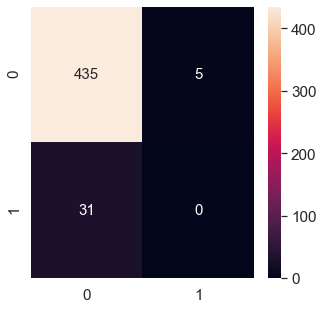

In [63]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = SMPdf.iloc[:,:-1]
y = SMPdf.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify = y, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("Target variable distribution\n" ,y_train['Pass/Fail'].value_counts(normalize=True))

X_train = X_train.iloc[:,1:]
y_train = y_train
X_tst = X_test.iloc[:,1:]
y_tst = y_test

pipe_lr = Pipeline([
#                     ('scl', StandardScaler()), 
#                     ('pca', PCA(n_components=300,svd_solver="full",random_state=1)), 
                    ('clf', LogisticRegression(random_state=1))]) 
pipe_lr.fit(X_train, y_train) 
print('Train Accuracy: %.3f' % pipe_lr.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_lr.score(X_tst, y_tst))

target_names = ['class Pass', 'class Fail']
y_true = y_test
y_pred = pipe_lr.predict(X_tst)
print(classification_report(y_true, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15}, fmt='g');

    When we run the LogisticRegression on the Raw data i.e, without applying PCA, standardization, without attribute removal. It is not providing right output. It is having very low recall and precision. 31 are actual fail but termed as pass which indicated some correction in the algorithm is required. There are no True positive cases which indicates that the algorithm is baised toward the pass class. We can apply target balancing and then compare the results.
    Here we observe that accuracy is pretty high but other metrics are showing low numbers.

###### Use cross validation techniques. 

In [64]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

X = SMPdf.iloc[:,:-1]
y = SMPdf.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify = y, random_state = 1)
X_CV = X_train.iloc[:,1:]
y_CV = y_train

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("Target variable distribution\n" ,y_CV['Pass/Fail'].value_counts(normalize=True))

# scaler = StandardScaler()
# scaler.fit(X_CV)
# X_CV = scaler.transform(X_CV)

num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = LogisticRegression(max_iter=100,solver = 'liblinear')
results = cross_val_score(model, X_CV, y_CV.values.ravel(), cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

(1096, 417) (471, 417) (1096, 1) (471, 1)
Target variable distribution
 -1.0    0.933394
 1.0    0.066606
Name: Pass/Fail, dtype: float64
[0.88181818 0.89090909 0.92727273 0.94545455 0.86363636 0.87272727
 0.88990826 0.88990826 0.94495413 0.90825688]
Accuracy: 90.148% (2.750%)


    Here we observe that accuracy of the model us around 90% with 3% deviation. So the model performance in production will be between 87-93. This can be improvised by applying few performance improvement techniques such as -  Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing 

In [66]:
# loocv to automatically evaluate the performance of a random forest classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from numpy import array

# create loocv procedure
cv = LeaveOneOut()
# create model
model =  LogisticRegression(max_iter=100,solver = 'liblinear')
# evaluate model
scores = cross_val_score(model, X_CV, y_CV, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.931 (0.254)


    Note : hyper-parameter tuning techniques will be applied once the target balancing is applied on data so we can get best parameters.

###### Use any other technique/method which can enhance the model performance

In [67]:
def applySmote(X,y,SMOTEsamplingPercent,UnderSamplingPercent,ifPrint=1):
    # Oversample with SMOTE and random undersample for imbalanced dataset
    counter = Counter(y)
    # define pipeline
    over = SMOTE(sampling_strategy=SMOTEsamplingPercent,random_state=1)
    under = RandomUnderSampler(sampling_strategy=UnderSamplingPercent,random_state=1)
    steps = [('o', over), ('u', under)]
    pipeline = imb.pipeline.Pipeline(steps=steps)
    # transform the dataset
    X_Smote, y_Smote = pipeline.fit_resample(X, y)
    # summarize the new class distribution
    counter = Counter(y)
    if(ifPrint):
        print("Before applying SMOTE :: " , "\n", y['Pass/Fail'].value_counts(normalize=True))
        print("After applying SMOTE :: " , "\n", y_Smote['Pass/Fail'].value_counts(normalize=True))
    return (X_Smote, y_Smote)

(885, 416) (380, 416) (885, 1) (380, 1)
Target variable distribution
 -1.0    0.769492
 1.0    0.230508
Name: Pass/Fail, dtype: float64
Train Accuracy: 0.985
Test Accuracy: 0.861
              precision    recall  f1-score   support

  class Pass       0.93      0.88      0.91       292
  class Fail       0.67      0.78      0.72        88

    accuracy                           0.86       380
   macro avg       0.80      0.83      0.81       380
weighted avg       0.87      0.86      0.86       380



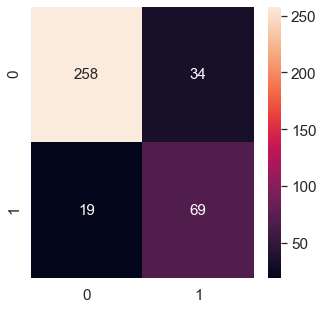

In [68]:
X = SMPdf.iloc[:,:-1]
y = SMPdf.iloc[:,-1:]

X = X.iloc[:,1:]
y = y

(X_SMOTE, y_SMOTE) = applySmote(X,y,0.20,0.30,0)
X_SMOTE = X_SMOTE
y_SMOTE = y_SMOTE

X_train, X_test, y_train, y_test = train_test_split(X_SMOTE,y_SMOTE, test_size = 0.3, stratify = y_SMOTE, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("Target variable distribution\n" ,y_train['Pass/Fail'].value_counts(normalize=True))

X_train = X_train.iloc[:,1:]
y_train = y_train
X_tst = X_test.iloc[:,1:]
y_tst = y_test

pipe_lr = Pipeline([
                    ('scl', StandardScaler()), 
                    ('pca', PCA(n_components=300,svd_solver="full",random_state=1)), 
                    ('clf', LogisticRegression(random_state=1,max_iter=10000))]) 
pipe_lr.fit(X_train, y_train.values.ravel()) 
print('Train Accuracy: %.3f' % pipe_lr.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_lr.score(X_tst, y_tst))

target_names = ['class Pass', 'class Fail']
y_true = y_tst
y_pred = pipe_lr.predict(X_tst)
print(classification_report(y_true, y_pred, target_names=target_names))

cm = confusion_matrix(y_tst, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15}, fmt='g');

    Here we observe that Accuracy, precision and recall improved by applying few other technique/method, this has resulted in improvement in the model performance. We shall apply other target balancing technique to further improve model performance and reduce Type 1 error. There are true positive cases observed which is good sign.

In [69]:
def overSampleDF(X,y,samplingPercent,ifPrint=1):
    ipdf = X.join(y)
    X_df = X
    y_df = y
    if(ifPrint):
        print("Before applying sampling :: " , "\n", y['Pass/Fail'].value_counts(normalize=True))
    while(determinePerOfLabel(y_df) < float(samplingPercent)):
        extra_samples = ipdf[ipdf['Pass/Fail'] == 1].sample(n = 70, random_state = 1)
        X_df = pd.concat([X_df, extra_samples.drop(columns='Pass/Fail')])
        dfextra_samples = extra_samples['Pass/Fail'].to_frame()
        y_df = pd.concat([y_df, dfextra_samples], axis=0)
    if(ifPrint):
        print("After applying sampling :: " , "\n", y_df['Pass/Fail'].value_counts(normalize=True))
    
    return(X_df,y_df)

Train Accuracy: 0.980
Test Accuracy: 0.915
              precision    recall  f1-score   support

  class Pass       0.97      0.91      0.94       440
  class Fail       0.78      0.93      0.85       157

    accuracy                           0.91       597
   macro avg       0.88      0.92      0.90       597
weighted avg       0.92      0.91      0.92       597



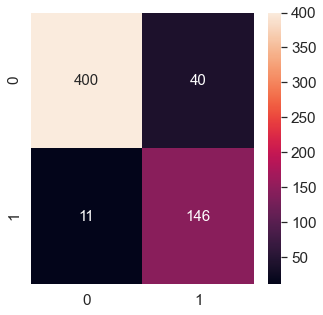

In [70]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = SMPdf.iloc[:,:-1]
y = SMPdf.iloc[:,-1:]

(X_p_sample, y_p_sample) = overSampleDF(X,y,0.25,0)
X_p_sample = X_p_sample
y_p_sample = y_p_sample

X_train, X_test, y_train, y_test = train_test_split(X_p_sample,y_p_sample, test_size = 0.3, stratify = y_p_sample, random_state = 1)

X_train = X_train.iloc[:,1:]
y_train = y_train
X_tst = X_test.iloc[:,1:]
y_tst = y_test

pipe_lr = Pipeline([
                    ('scl', StandardScaler()), 
                    ('pca', PCA(n_components=300,svd_solver="full",random_state=1)), 
                    ('clf', LogisticRegression(random_state=1,max_iter=10000))]) 
pipe_lr.fit(X_train, y_train.values.ravel()) 
print('Train Accuracy: %.3f' % pipe_lr.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_lr.score(X_tst, y_tst))

target_names = ['class Pass', 'class Fail']
y_true = y_tst
y_pred = pipe_lr.predict(X_tst)
print(classification_report(y_true, y_pred, target_names=target_names))

cm = confusion_matrix(y_tst, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15}, fmt='g');

    After applying custom method to change the population - the performance of the model has improved. Here we have use statistical method to upsample the data. Here we observe that the recall and precision has improved. Number of devices which are actually defective but which are predicted as pass has come down from previous iteration.

###### Apply hyper-parameter tuning techniques to get the best accuracy. 
    Suggestion: Use all possible hyper parameter combinations to extract the best accuracies

In [373]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
# max_iter = [100,200,500]
# multi_class = ['auto','ovr','multinomial']
                                           
model = LogisticRegression()

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

D:\anaconda\envs\gl\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best: 0.869202 using {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.828939 (0.035609) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.767594 (0.034103) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.813726 (0.032007) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.869202 (0.041221) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.828929 (0.036040) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.769312 (0.034156) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.812362 (0.033023) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.846200 (0.034252) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.828589 (0.036023) with: 

In [42]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1']
space['C'] =  [100, 10, 1.0, 0.1, 0.01]
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

D:\anaconda\envs\gl\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 15 is smaller than n_iter=500. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
D:\anaconda\envs\gl\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.88681055        nan        nan 0.89064748
        nan        nan 0.86642686        nan        nan 0.84292566
        nan        nan 0.79832134]
  category=UserWarning
D:\anaconda\envs\gl\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best Score: 0.8906474820143885
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}


(1292, 417) (555, 417) (1292, 1) (555, 1)
Train Accuracy: 0.994
Test Accuracy: 0.895
              precision    recall  f1-score   support

  class Pass       0.97      0.89      0.93       440
  class Fail       0.69      0.90      0.78       115

    accuracy                           0.90       555
   macro avg       0.83      0.90      0.86       555
weighted avg       0.91      0.90      0.90       555



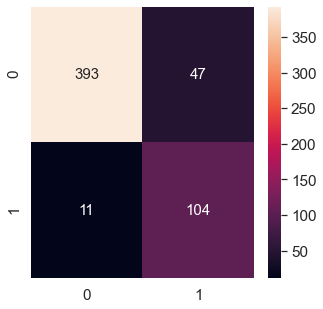

In [75]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 

# pipe_lr = Pipeline([('scl', StandardScaler()), 
#                     ('pca', PCA(n_components=4)), 
#                     ('clf', LogisticRegression(random_state=10,C= 100,penalty='l1',solver='liblinear',multi_class='ovr',max_iter=500))]) 
# pipe_lr.fit(X_train, y_train) 
# print('Test Accuracy: %.3f' % pipe_lr.score(X_train, y_train))
# print('Test Accuracy: %.3f' % pipe_lr.score(X_tst, y_tst))


X = SMPdf.iloc[:,:-1]
y = SMPdf.iloc[:,-1:]

(X_p_sample, y_p_sample) = overSampleDF(X,y,0.20,0)
X_p_sample = X_p_sample
y_p_sample = y_p_sample

X_train, X_test, y_train, y_test = train_test_split(X_p_sample,y_p_sample, test_size = 0.3, stratify = y_p_sample, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train = X_train.iloc[:,1:]
y_train = y_train
X_tst = X_test.iloc[:,1:]
y_tst = y_test

pipe_lr = Pipeline([
                    ('scl', StandardScaler()), 
                    ('pca', PCA(n_components=300,svd_solver="full",random_state=1)), 
                    ('clf', LogisticRegression(random_state=1,C= 5,penalty='l2',solver='liblinear',multi_class='ovr',max_iter=10000))]) 
pipe_lr.fit(X_train, y_train.values.ravel()) 
print('Train Accuracy: %.3f' % pipe_lr.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_lr.score(X_tst, y_tst))

target_names = ['class Pass', 'class Fail']
y_true = y_tst
y_pred = pipe_lr.predict(X_tst)
print(classification_report(y_true, y_pred, target_names=target_names))

cm = confusion_matrix(y_tst, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15}, fmt='g');

    Although we observe high accuracy and recall score, it is better to have a look into classification matrix.
    True Positives (TP): predicted true conversion rate 104
    True Negatives (TN): predicted false conversion rate 393
    False Positives (FP): 11 Falsely predict positive Type II error
    False Negatives (FN): 47 Falsely predict negative Type I error
    There are about 11 instance where the model has predicted wrong and has predicted as pass when actually it is a fail.

###### Apply the above steps for all possible models that you have learnt so far.
###### Display and compare all the models designed with their train and test accuracies.

    For normal dataset, which is not  oversampled

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input
    pipe_clf = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=300)), ('clf', model)]) 
    pipe_clf.fit(X_train, y_train.values.ravel()) 
    print(type(model).__name__ , ' Train Accuracy: %.3f' % pipe_clf.score(X_train, y_train))
    print(type(model).__name__ , ' Test Accuracy: %.3f' % pipe_clf.score(X_test, y_test), "\n")
    
    target_names = ['class Pass', 'class Fail']
    y_true = y_test
    y_pred = pipe_clf.predict(X_test)
    print(classification_report(y_true, y_pred, target_names=target_names))
    
    plt.figure()
    cm = confusion_matrix(y_test, y_pred)
    plt.rcParams['figure.figsize'] = (5, 5)
    plt.title(type(model).__name__)
    sns.set(style = 'dark', font_scale = 1.4)
    sns.heatmap(cm, annot = True, annot_kws = {"size": 15})
#     precision,recall,fscore,support=score(y_true,y_pred,average='macro')
    Sens = recall_score(y_true,y_pred, average='macro')
    Prec = precision_score(y_true,y_pred, average='macro')
    print(type(model).__name__ ,pipe_clf.score(X_train, y_train),pipe_clf.score(X_test, y_test),Sens,Prec)
    return pipe_clf.score(X_train, y_train),pipe_clf.score(X_test, y_test),Sens,Prec

(1096, 417) (471, 417) (1096, 1) (471, 1)
LogisticRegression  Train Accuracy: 0.983
LogisticRegression  Test Accuracy: 0.879 

              precision    recall  f1-score   support

  class Pass       0.94      0.93      0.94       440
  class Fail       0.09      0.10      0.10        31

    accuracy                           0.88       471
   macro avg       0.51      0.52      0.52       471
weighted avg       0.88      0.88      0.88       471

LogisticRegression 0.9826642335766423 0.8789808917197452 0.515432551319648 0.5149843394077449
DecisionTreeClassifier  Train Accuracy: 0.946
DecisionTreeClassifier  Test Accuracy: 0.904 

              precision    recall  f1-score   support

  class Pass       0.93      0.97      0.95       440
  class Fail       0.00      0.00      0.00        31

    accuracy                           0.90       471
   macro avg       0.47      0.48      0.47       471
weighted avg       0.87      0.90      0.89       471

DecisionTreeClassifier 0.9461678

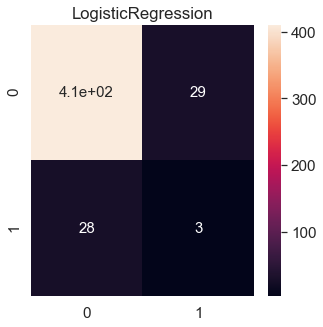

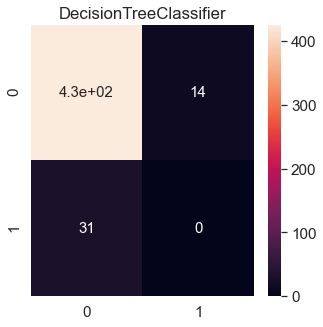

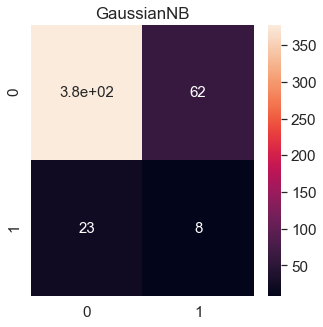

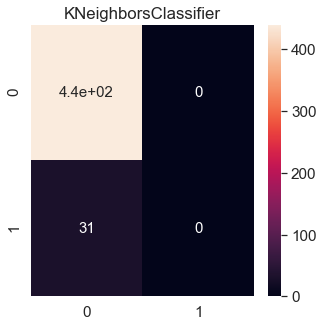

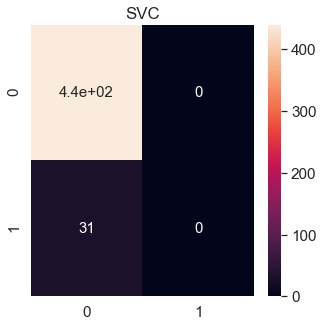

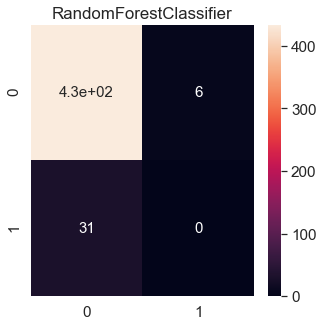

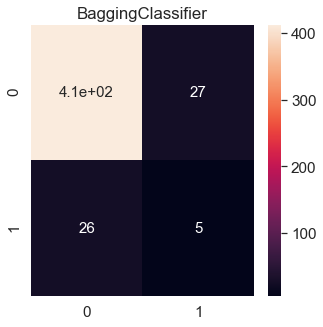

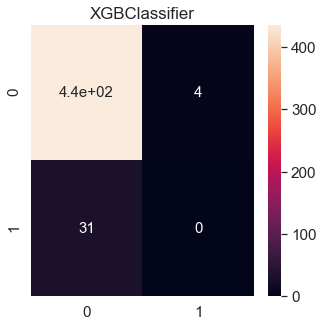

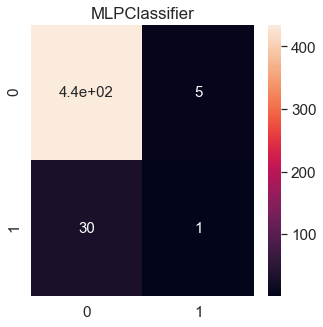

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
# import xgboost as xgb
from xgboost.sklearn import XGBClassifier

lr = LogisticRegression()        
dt = DecisionTreeClassifier(max_depth= 5)  
nbcl =  GaussianNB()
knncl =  KNeighborsClassifier()
svcl= SVC()
rfcl =  RandomForestClassifier(max_depth=5)
bgcl =  BaggingClassifier()
nncl = MLPClassifier()
xgb = XGBClassifier(random_state=1,max_depth=5)

X = SMPdf.iloc[:,:-1]
y = SMPdf.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify = y, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train = X_train.iloc[:,1:]
y_train = y_train
X_test = X_test.iloc[:,1:]
y_test = y_test


result = {}   # Create an empty dictionary to later use to store metrics of each of the models

# putting all 5 models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([lr, dt, nbcl, knncl, svcl, rfcl, bgcl, xgb, nncl], 
                        ['Logistic Regression', 
                         'Decision Tree',
                         'Naive Bayes',
                        'KNeighborsClassifier',
                        'SVC',
                        'RandomForestClassifier',
                        'BaggingClassifier',
                        'XGBClassifier',
                        'MLPClassifier'
                        
                        ]):
    result[name] = fit_n_print(model,X_train, X_test,y_train, y_test)  
    # store all the metrics in the result dict, with name as key

In [81]:
list(np.array(list(result.values()))[:,:])

result1 = pd.DataFrame(np.array(list(result.values()))[:,:],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['Train Accuracy', 'Test Accuracy', 'Recall', 'Precision'],
                      index= result.keys())   # use the model names as index
result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1 

Train Accuracy  Test Accuracy    Recall  Precision
Model                                                                     
Logistic Regression           0.982664       0.878981  0.515433   0.514984
Decision Tree                 0.946168       0.904459  0.484091   0.466083
Naive Bayes                   0.915146       0.819533  0.558578   0.528465
KNeighborsClassifier          0.934307       0.934183  0.500000   0.467091
SVC                           0.939781       0.934183  0.500000   0.467091
RandomForestClassifier        0.936131       0.921444  0.493182   0.466667
BaggingClassifier             0.986314       0.887473  0.549963   0.548512
XGBClassifier                 1.000000       0.925690  0.495455   0.466809
MLPClassifier                 1.000000       0.925690  0.510447   0.551075

LogisticRegression  Train Accuracy: 0.991
LogisticRegression  Test Accuracy: 0.863 

              precision    recall  f1-score   support

  class Pass       0.95      0.86      0.90       313
  class Fail       0.69      0.86      0.77       110

    accuracy                           0.86       423
   macro avg       0.82      0.86      0.83       423
weighted avg       0.88      0.86      0.87       423

LogisticRegression 0.9908536585365854 0.8628841607565012 0.8631280859715365 0.8178871090770403
DecisionTreeClassifier  Train Accuracy: 0.828
DecisionTreeClassifier  Test Accuracy: 0.728 

              precision    recall  f1-score   support

  class Pass       0.85      0.77      0.81       313
  class Fail       0.48      0.61      0.54       110

    accuracy                           0.73       423
   macro avg       0.67      0.69      0.67       423
weighted avg       0.75      0.73      0.74       423

DecisionTreeClassifier 0.8282520325203252 0.7281323877068558 0.6895294801

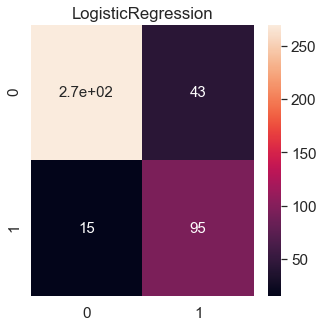

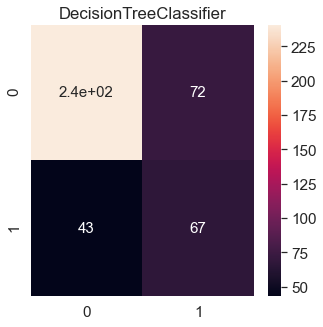

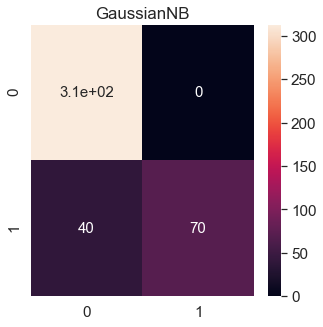

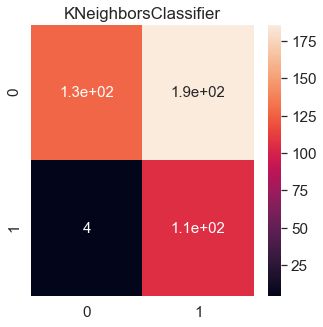

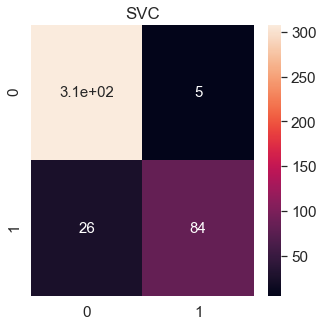

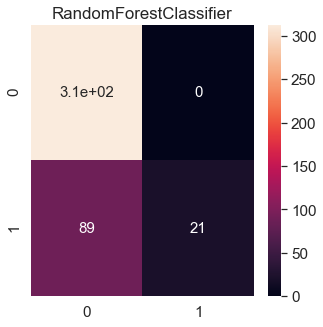

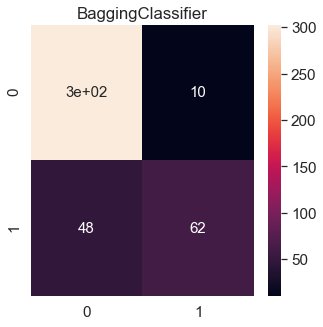

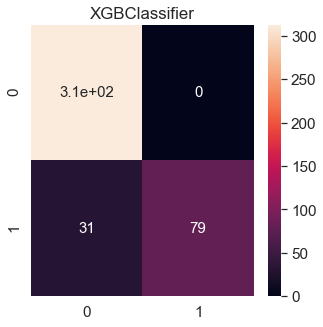

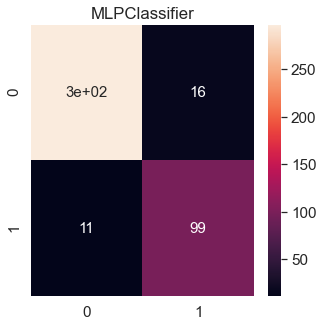

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
# import xgboost as xgb
from xgboost.sklearn import XGBClassifier

lr = LogisticRegression(random_state = 1)        
dt = DecisionTreeClassifier(max_depth= 5, random_state = 1)  
nbcl =  GaussianNB()
knncl =  KNeighborsClassifier()
svcl= SVC(random_state = 1)
rfcl =  RandomForestClassifier(max_depth=5, random_state = 1)
bgcl =  BaggingClassifier(random_state = 1)
nncl = MLPClassifier()
xgb = XGBClassifier(random_state=1,max_depth=5)

X = SMPdf.iloc[:,:-1]
y = SMPdf.iloc[:,-1:]

from sklearn.impute import SimpleImputer
missingvalues = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0) #'median')
missingvalues = missingvalues.fit(X.iloc[:,1:])
X.iloc[:,1:] = missingvalues.transform(X.iloc[:,1:])

# print(X.shape, y.shape)
X = X.iloc[:,1:]
y = y

(X_SMOTE, y_SMOTE) = applySmote(X,y,0.25,0.35,0)
X_SMOTE = X_SMOTE#.iloc[:,1:]#pd.DataFrame()
y_SMOTE = y_SMOTE#pd.DataFrame()
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE,y_SMOTE, test_size = 0.3, stratify = y_SMOTE, random_state = 1)
X_train = X_train#.iloc[:,1:]
y_train = y_train
X_test = X_test#.iloc[:,1:]
y_test = y_test

result = {}   # Create an empty dictionary to later use to store metrics of each of the models

# putting all 5 models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([lr, dt, nbcl, knncl, svcl, rfcl, bgcl, xgb, nncl], 
                        ['Logistic Regression', 
                         'Decision Tree',
                         'Naive Bayes',
                        'KNeighborsClassifier',
                        'SVC',
                        'RandomForestClassifier',
                        'BaggingClassifier',
                        'XGBClassifier',
                        'MLPClassifier'
                        
                        ]):
    result[name] = fit_n_print(model,X_train, X_test,y_train, y_test)  
    # store all the metrics in the result dict, with name as key

In [83]:
list(np.array(list(result.values()))[:,:])

result1 = pd.DataFrame(np.array(list(result.values()))[:,:],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['Train Accuracy', 'Test Accuracy', 'Recall', 'Precision'],
                      index= result.keys())   # use the model names as index
result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1 

Train Accuracy  Test Accuracy    Recall  Precision
Model                                                                     
Logistic Regression           0.990854       0.862884  0.863128   0.817887
Decision Tree                 0.828252       0.728132  0.689529   0.665303
Naive Bayes                   0.961382       0.905437  0.818182   0.943343
KNeighborsClassifier          0.648374       0.550827  0.684694   0.666240
SVC                           0.980691       0.926714  0.873831   0.932988
RandomForestClassifier        0.896341       0.789598  0.595455   0.889303
BaggingClassifier             0.993902       0.862884  0.765844   0.862179
XGBClassifier                 1.000000       0.926714  0.859091   0.954942
MLPClassifier                 1.000000       0.936170  0.924441   0.912578

LogisticRegression  Train Accuracy: 0.980
LogisticRegression  Test Accuracy: 0.915 

              precision    recall  f1-score   support

  class Pass       0.97      0.91      0.94       440
  class Fail       0.78      0.93      0.85       157

    accuracy                           0.91       597
   macro avg       0.88      0.92      0.90       597
weighted avg       0.92      0.91      0.92       597

LogisticRegression 0.9798561151079137 0.914572864321608 0.9195136074116965 0.8790911231457499
DecisionTreeClassifier  Train Accuracy: 0.873
DecisionTreeClassifier  Test Accuracy: 0.849 

              precision    recall  f1-score   support

  class Pass       0.98      0.81      0.89       440
  class Fail       0.65      0.95      0.77       157

    accuracy                           0.85       597
   macro avg       0.81      0.88      0.83       597
weighted avg       0.89      0.85      0.86       597

DecisionTreeClassifier 0.8733812949640288 0.8492462311557789 0.88134047481

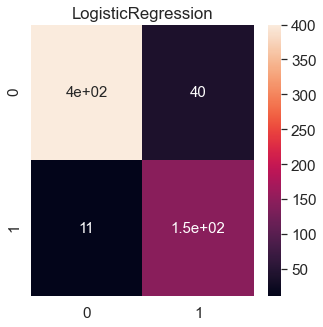

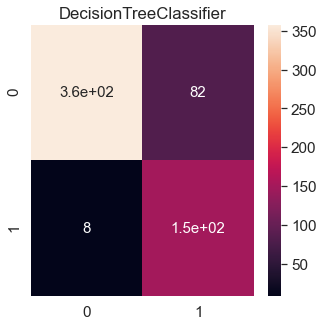

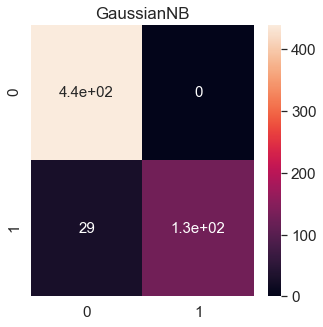

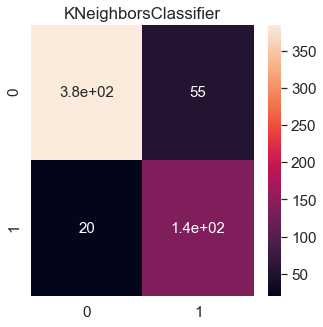

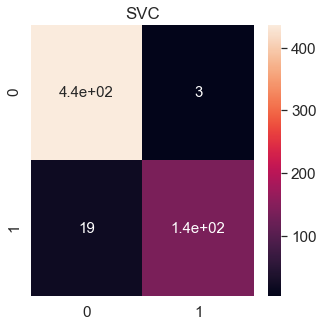

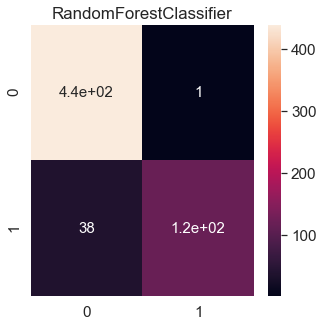

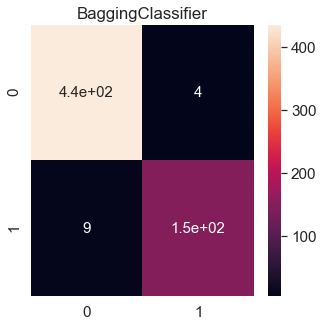

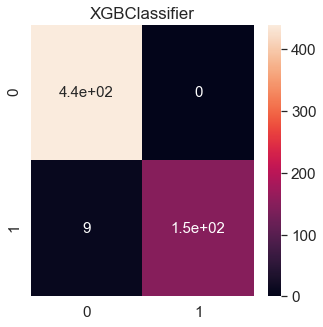

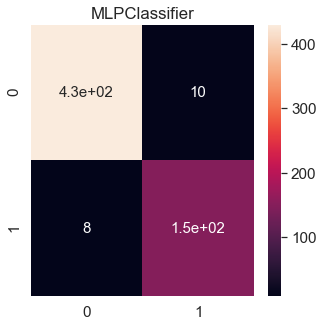

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
# import xgboost as xgb
from xgboost.sklearn import XGBClassifier

lr = LogisticRegression(random_state = 1)        
dt = DecisionTreeClassifier(max_depth= 5, random_state = 1)  
nbcl =  GaussianNB()
knncl =  KNeighborsClassifier()
svcl= SVC(random_state = 1)
rfcl =  RandomForestClassifier(max_depth=5, random_state = 1)
bgcl =  BaggingClassifier(random_state = 1)
nncl = MLPClassifier()
xgb = XGBClassifier(random_state=1,max_depth=5)

X = SMPdf.iloc[:,:-1]
y = SMPdf.iloc[:,-1:]

from sklearn.impute import SimpleImputer
missingvalues = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0) #'median')
missingvalues = missingvalues.fit(X.iloc[:,1:])
X.iloc[:,1:] = missingvalues.transform(X.iloc[:,1:])

(X_p_sample, y_p_sample) = overSampleDF(X,y,0.25,0)
X_p_sample = X_p_sample#.iloc[:,1:]#pd.DataFrame()
y_p_sample = y_p_sample#pd.DataFrame()

X_train, X_test, y_train, y_test = train_test_split(X_p_sample,y_p_sample, test_size = 0.3, stratify = y_p_sample, random_state = 1)
X_train = X_train.iloc[:,1:]
y_train = y_train
X_test = X_test.iloc[:,1:]
y_test = y_test


result = {}   # Create an empty dictionary to later use to store metrics of each of the models

# putting all 5 models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([lr, dt, nbcl, knncl, svcl, rfcl, bgcl, xgb, nncl], 
                        ['Logistic Regression', 
                         'Decision Tree',
                         'Naive Bayes',
                        'KNeighborsClassifier',
                        'SVC',
                        'RandomForestClassifier',
                        'BaggingClassifier',
                        'XGBClassifier',
                        'MLPClassifier'
                        
                        ]):
    result[name] = fit_n_print(model,X_train, X_test,y_train, y_test)  
    # store all the metrics in the result dict, with name as key

In [85]:
list(np.array(list(result.values()))[:,:])

result1 = pd.DataFrame(np.array(list(result.values()))[:,:],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['Train Accuracy', 'Test Accuracy', 'Recall', 'Precision'],
                      index= result.keys())   # use the model names as index
result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1 

Train Accuracy  Test Accuracy    Recall  Precision
Model                                                                     
Logistic Regression           0.979856       0.914573  0.919514   0.879091
Decision Tree                 0.873381       0.849246  0.881340   0.811582
Naive Bayes                   0.971942       0.951424  0.907643   0.969083
KNeighborsClassifier          0.918705       0.874372  0.873806   0.832079
SVC                           0.983453       0.963149  0.936081   0.968528
RandomForestClassifier        0.969065       0.934673  0.877845   0.956001
BaggingClassifier             0.997842       0.978224  0.966792   0.976730
XGBClassifier                 1.000000       0.984925  0.971338   0.989978
MLPClassifier                 1.000000       0.969849  0.963159   0.959421

    Reason for choosing model
    
    As observed in all 3 result table, there are various models to compare. Among them Logistic Regression, SVC seems to have good overall score, here XGB and MLP are having 100% accuracy in train data - which seems like some overfitting on train data has happened but looking at confusion matrix there are very low error on mis-classification. The confusion matrix indicates that we could use MLP as a final algorithm of choice for given data. If we have more number of instances collected then we could try MLP, SVC and XGB and conclude best algorithm. For now based on the recall and precision socere and observing confusion matrix we can choose MLP as choice for building model

###### Select the final best trained model along with your detailed comments for selecting this model

In [87]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = SMPdf.iloc[:,:-1]
y = SMPdf.iloc[:,-1:]

(X_p_sample, y_p_sample) = overSampleDF(X,y,0.25,0)
X_p_sample = X_p_sample#.iloc[:,1:]#pd.DataFrame()
y_p_sample = y_p_sample#pd.DataFrame()

X_train, X_test, y_train, y_test = train_test_split(X_p_sample,y_p_sample, test_size = 0.3, stratify = y_p_sample, random_state = 1)
X_train = X_train.iloc[:,1:]
y_train = y_train
X_tst = X_test.iloc[:,1:]
y_tst = y_test

#svcl= SVC(random_state = 1)#,kernel='linear',C=10
#xgb = XGBClassifier(random_state=1,max_depth=5)
nncl = MLPClassifier()

#for given FuturePredictions dataset all 3 are providing same output

pipe_lr = Pipeline([
                    ('scl', StandardScaler()), 
                    ('pca', PCA(n_components=300,svd_solver="full",random_state=1)), 
                    ('clf', nncl)]) 
pipe_lr.fit(X_train, y_train.values.ravel()) 
import pickle
saved_model = pickle.dumps(pipe_lr)  

######  Pickle the selected model for future use

In [88]:
lr_from_pickle = pickle.loads(saved_model)
FuturePredictionsRaw = pd.read_excel('Future_predictions.xlsx')

In [89]:
FuturePredictions = FuturePredictionsRaw.iloc[:,1:]
from sklearn.impute import SimpleImputer
missingvalues = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0) #'median')
missingvalues = missingvalues.fit(FuturePredictions.iloc[:,1:])
FuturePredictions.iloc[:,1:] = missingvalues.transform(FuturePredictions.iloc[:,1:])

In [90]:
ll = list(SMPdf.iloc[:,1:-1].columns.str.replace(' ', ''))
ll = [int(i) for i in ll]

In [91]:
ll1 = list(FuturePredictions.columns)
# FuturePredictions[ll1]

###### Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results

In [92]:
# pickled model to make predictions
print(lr_from_pickle.predict(FuturePredictions[ll]))

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1. -1. -1. -1.]


In [93]:
pd.DataFrame({'Prediction': lr_from_pickle.predict(FuturePredictions[ll])}).join(FuturePredictions)

Prediction        0        1          2          3       4      5  \
0         -1.0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1         -1.0  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2         -1.0  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3         -1.0  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4         -1.0  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   
5         -1.0  2946.25  2432.84  2233.3667  1326.5200  1.5334  100.0   
6         -1.0  3030.27  2430.12  2230.4222  1463.6606  0.8294  100.0   
7         -1.0  3058.88  2690.15  2248.9000  1004.4692  0.7884  100.0   
8         -1.0  2967.68  2600.47  2248.9000  1004.4692  0.7884  100.0   
9         -1.0  3016.11  2428.37  2248.9000  1004.4692  0.7884  100.0   
10         1.0  2994.05  2548.21  2195.1222  1046.1468  1.3204  100.0   
11         1.0  2928.84  2479.40  2196.2111  1605.7578  0.9959  100.0   
12        -1.0  2920.07  2507.40  2195.1222  1046.1468  1.3204  100.0   
13        -1.0  3051.44  2529.27  2184.4333   877.6266  1.4668  100.0   
14         1.0  2963.97  2629.48  2224.6222   947.7739  1.2924  100.0   
15        -1.0  2988.31  2546.26  2224.6222   947.7739  1.2924  100.0   
16        -1.0  3028.02  2560.87  2270.2556  1258.4558  1.3950  100.0   
17        -1.0  3032.73  2517.79  2270.2556  1258.4558  1.3950  100.0   

           6       7       8  ...     580       581     582     583     584  \
0    97.6133  0.1242  1.5005  ...  0.0000    0.0000  0.5005  0.0118  0.0035   
1   102.3433  0.1247  1.4966  ...  0.0060  208.2045  0.5019  0.0223  0.0055   
2    95.4878  0.1241  1.4436  ...  0.0148   82.8602  0.4958  0.0157  0.0039   
3   104.2367  0.1217  1.4882  ...  0.0044   73.8432  0.4990  0.0103  0.0025   
4   100.3967  0.1235  1.5031  ...  0.0000    0.0000  0.4800  0.4766  0.1045   
5   100.3967  0.1235  1.5287  ...  0.0052   44.0077  0.4949  0.0189  0.0044   
6   102.3433  0.1247  1.5816  ...  0.0000    0.0000  0.5010  0.0143  0.0042   
7   106.2400  0.1185  1.5153  ...  0.0063   95.0310  0.4984  0.0106  0.0034   
8   106.2400  0.1185  1.5358  ...  0.0045  111.6525  0.4993  0.0172  0.0046   
9   106.2400  0.1185  1.5381  ...  0.0073   90.2294  0.4967  0.0152  0.0038   
10  103.3400  0.1223  1.5144  ...  0.0071   57.8122  0.4925  0.0158  0.0041   
11   97.9156  0.1257  1.4690  ...  0.0081   75.5077  0.4987  0.0427  0.0092   
12  103.3400  0.1223  1.5310  ...  0.0034   52.2039  0.4950  0.0153  0.0041   
13  107.8711  0.1240  1.5236  ...  0.0000    0.0000  0.5034  0.0151  0.0038   
14  104.8489  0.1197  1.4474  ...  0.0084  142.9080  0.5077  0.0094  0.0026   
15  104.8489  0.1197  1.5465  ...  0.0045  100.2745  0.5058  0.0078  0.0021   
16  104.8078  0.1207  1.4368  ...  0.0042   82.0989  0.5005  0.0108  0.0034   
17  104.8078  0.1207  1.5537  ...  0.0000    0.0000  0.5015  0.0105  0.0027   

        585     586     587     588       589  
0    2.3630  0.0000  0.0000  0.0000    0.0000  
1    4.4447  0.0096  0.0201  0.0060  208.2045  
2    3.1745  0.0584  0.0484  0.0148   82.8602  
3    2.0544  0.0202  0.0149  0.0044   73.8432  
4   99.3032  0.0202  0.0149  0.0044   73.8432  
5    3.8276  0.0342  0.0151  0.0052   44.0077  
6    2.8515  0.0342  0.0151  0.0052   44.0077  
7    2.1261  0.0204  0.0194  0.0063   95.0310  
8    3.4456  0.0111  0.0124  0.0045  111.6525  
9    3.0687  0.0212  0.0191  0.0073   90.2294  
10   3.2115  0.0355  0.0205  0.0071   57.8122  
11   8.5646  0.0370  0.0279  0.0081   75.5077  
12   3.0926  0.0188  0.0098  0.0034   52.2039  
13   3.0063  0.0188  0.0098  0.0034   52.2039  
14   1.8483  0.0202  0.0289  0.0084  142.9080  
15   1.5352  0.0174  0.0174  0.0045  100.2745  
16   2.1574  0.0184  0.0151  0.0042   82.0989  
17   2.0979  0.0184  0.0151  0.0042   82.0989  

[18 rows x 591 columns]

###### Conclusion and improvisation:
    Write your conclusion on the results

    The result shows good prediction and has correctly predicted pass cases and three fail cases. However there is one wrong prediction observed. The confusion matrix gives us good idea on how classification is done on the train data. And other metrics shows how the performance is on test dataset. 
    We could plan to collect more data and also instruct team on feature importance by which they can spend more time on correct data collection and thus help us improvising the model performance.